In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# 1. Table 1 : Data Cleaning

In [3]:
#Open the excel file Table 1 
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf = pd.read_excel(xls, 'Table 1')
new_header = undf.iloc[13]
undf = undf.iloc[14:]
undf.columns = new_header
undf.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 International migrant stock at mid-year (both sexes)        NaN        NaN  \
14                                               1990         1995       2000   
15                                          152563212    160801752  172703309   
16                                           82378628     92306854  103375363   
17                                           70184584     68494898   69327946   
18                                           11075966     11711703   10077824   

13        NaN          NaN  ...       NaN       NaN          NaN          NaN  \
14       2005       2010.0  ...      2000      2005       2010.0       2015.0   
15  191269100  221714243.0  ...  87884839  97866674  114613714.0  126115435.0   
16  117181109  132560325.0  ...  50536796  57217777   64081077.0   67618619.0   
17   74087991   89153918.0  ...  37348043  40648897   50532637.0   58496816.0   
18    9809634   10018128.0  ...   5361902   5383009    5462714.0    6463217.0   

13 International migrant stock at mid-year (female)       NaN       NaN  \
14                                             1990      1995      2000   
15                                         74815702  79064275  84818470   
16                                         42115231  47214055  52838567   
17                                         32700471  31850220  31979903   
18                                          5236216   5573685   4721920   

13       NaN          NaN          NaN  
14      2005       2010.0       2015.0  
15  93402426  107100529.0  117584801.0  
16  59963332   68479248.0   72863336.0  
17  33439094   38621281.0   44721465.0  
18   4432371    4560536.0    5493028.0  

[5 rows x 23 columns]

In [4]:
#separate the columns into both sexes, male and female part
sub_both = undf.iloc[:,0:11]
sub_male = undf.iloc[:,[0,1,2,3,4,11,12,13,14,15,16]]
sub_female = undf.iloc[:,[0,1,2,3,4,17,18,19,20,21,22]]

# 1.1 Table 1 : Both sexes

In [5]:
#Rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_both.set_axis(cols, axis=1,inplace=True)
sub_both.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)       1990       1995       2000       2005  \
14          NaN             NaN       1990       1995       2000       2005   
15          900             NaN  152563212  160801752  172703309  191269100   
16          901             NaN   82378628   92306854  103375363  117181109   
17          902             NaN   70184584   68494898   69327946   74087991   
18          941             NaN   11075966   11711703   10077824    9809634   

           2010         2015  
14       2010.0       2015.0  
15  221714243.0  243700236.0  
16  132560325.0  140481955.0  
17   89153918.0  103218281.0  
18   10018128.0   11951316.0

In [6]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International_migrant_stock_at_mid-year(both_sexes)"
sub_both = sub_both.iloc[1:]
sub_both = sub_both.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "International_migrant_stock_at_mid-year(both_sexes)")
sub_both.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International_migrant_stock_at_mid-year(both_sexes)  
0                                          152563212   
1                                           82378628   
2                                           70184584   
3                                           11075966   
4                                           59105261

In [7]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "International_migrant_stock_at_mid-year"
Table1_both = sub_both.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "International_migrant_stock_at_mid-year")
Table1_both.head()


Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                 Sex  \
0  International_migrant_stock_at_mid-year(both_s...   
1  International_migrant_stock_at_mid-year(both_s...   
2  International_migrant_stock_at_mid-year(both_s...   
3  International_migrant_stock_at_mid-year(both_s...   
4  International_migrant_stock_at_mid-year(both_s...   

  International_migrant_stock_at_mid-year  
0                               152563212  
1                                82378628  
2                                70184584  
3                                11075966  
4                                59105261

In [8]:
# Styling the variable "Sex"
Table1_both=(Table1_both.replace(to_replace =["International_migrant_stock_at_mid-year(both_sexes)"]
                   ,value =["Both"]))
Table1_both.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Both   
1           901             NaN  1990  Both   
2           902             NaN  1990  Both   
3           941             NaN  1990  Both   
4           934             NaN  1990  Both   

  International_migrant_stock_at_mid-year  
0                               152563212  
1                                82378628  
2                                70184584  
3                                11075966  
4                                59105261

# 1.2 Table 1 : Male Section

In [9]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_male.set_axis(cols, axis=1,inplace=True)
sub_male.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN  77747510  81737477  87884839  97866674   
16          901             NaN  40263397  45092799  50536796  57217777   
17          902             NaN  37484113  36644678  37348043  40648897   
18          941             NaN   5843107   6142712   5361902   5383009   

           2010         2015  
14       2010.0       2015.0  
15  114613714.0  126115435.0  
16   64081077.0   67618619.0  
17   50532637.0   58496816.0  
18    5462714.0    6463217.0

In [10]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International_migrant_stock_at_mid-year(Male)"
sub_male = sub_male.iloc[1:]
id_vars_table1 = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
sub_male = sub_male.melt(id_vars = id_vars_table1
                           ,var_name= "year"
                           ,value_name= "International_migrant_stock_at_mid-year(Male)")
sub_male.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International_migrant_stock_at_mid-year(Male)  
0                                      77747510  
1                                      40263397  
2                                      37484113  
3                                       5843107  
4                                      31641006

# 1.3 Table 1 : Female Section

In [11]:
#Rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_female.set_axis(cols, axis=1,inplace=True)
sub_female.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN  74815702  79064275  84818470  93402426   
16          901             NaN  42115231  47214055  52838567  59963332   
17          902             NaN  32700471  31850220  31979903  33439094   
18          941             NaN   5236216   5573685   4721920   4432371   

           2010         2015  
14       2010.0       2015.0  
15  107100529.0  117584801.0  
16   68479248.0   72863336.0  
17   38621281.0   44721465.0  
18    4560536.0    5493028.0

In [12]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International_migrant_stock_at_mid-year(Female)"
sub_female = sub_female.iloc[1:]
sub_female = sub_female.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "International_migrant_stock_at_mid-year(Female)")
sub_female.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International_migrant_stock_at_mid-year(Female)  
0                                        74815702  
1                                        42115231  
2                                        32700471  
3                                         5236216  
4                                        27464255

# 1.4 Table 1 : Merge male and female into one table 

In [13]:
Table1_sex = sub_male.merge(sub_female, on=['Sort_order','Major area, region, country or area of destination', 'Notes', 'Country_code'
                                   ,'Type_of_data(a)','year',], how="outer" )

                            
                            
                            
Table1_sex.head()



Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International_migrant_stock_at_mid-year(Male)  \
0                                      77747510   
1                                      40263397   
2                                      37484113   
3                                       5843107   
4                                      31641006   

  International_migrant_stock_at_mid-year(Female)  
0                                        74815702  
1                                        42115231  
2                                        32700471  
3                                         5236216  
4                                        27464255

In [14]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "year" and the value name is "International_migrant_stock_at_mid-year"
Table1_sex = Table1_sex.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "International_migrant_stock_at_mid-year")
Table1_sex.head(100)

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   
..        ...                                                ...   ...   
95         96                                        Timor-Leste   NaN   
96         97                                           Viet Nam   NaN   
97         98                                      Southern Asia   NaN   
98         99                                        Afghanistan   NaN   
99        100                                         Bangladesh   NaN   

   Country_code Type_of_data(a)  year  \
0           900             NaN  1990   
1           901             NaN  1990   
2           902             NaN  1990   
3           941             NaN  1990   
4           934             NaN  1990   
..          ...             ...   ...   
95          626               B  1990   
96          704             C R  1990   
97         5501             NaN  1990   
98            4               B  1990   
99           50             B R  1990   

                                              Sex  \
0   International_migrant_stock_at_mid-year(Male)   
1   International_migrant_stock_at_mid-year(Male)   
2   International_migrant_stock_at_mid-year(Male)   
3   International_migrant_stock_at_mid-year(Male)   
4   International_migrant_stock_at_mid-year(Male)   
..                                            ...   
95  International_migrant_stock_at_mid-year(Male)   
96  International_migrant_stock_at_mid-year(Male)   
97  International_migrant_stock_at_mid-year(Male)   
98  International_migrant_stock_at_mid-year(Male)   
99  International_migrant_stock_at_mid-year(Male)   

   International_migrant_stock_at_mid-year  
0                                 77747510  
1                                 40263397  
2                                 37484113  
3                                  5843107  
4                                 31641006  
..                                     ...  
95                                    4450  
96                                   15230  
97                                10601061  
98                                   32558  
99                                  759452  

[100 rows x 8 columns]

In [15]:
# Styling the the name of the variable "Sex"
Table1_sex=(Table1_sex.replace(to_replace =["International_migrant_stock_at_mid-year(Male)","International_migrant_stock_at_mid-year(Female)"]
                   ,value =["Male","Female"])
            )
Table1_sex.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Male   
1           901             NaN  1990  Male   
2           902             NaN  1990  Male   
3           941             NaN  1990  Male   
4           934             NaN  1990  Male   

  International_migrant_stock_at_mid-year  
0                                77747510  
1                                40263397  
2                                37484113  
3                                 5843107  
4                                31641006

# 1.5 Table 1 : Concat Table1_both & Table1_sex

In [16]:
Table1= pd.concat([Table1_both, Table1_sex])
Table1.head(10)

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   
5           6                                 Sub-Saharan Africa   (e)   
6           7                                             Africa   NaN   
7           8                                     Eastern Africa   NaN   
8           9                                            Burundi   NaN   
9          10                                            Comoros   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Both   
1           901             NaN  1990  Both   
2           902             NaN  1990  Both   
3           941             NaN  1990  Both   
4           934             NaN  1990  Both   
5           947             NaN  1990  Both   
6           903             NaN  1990  Both   
7           910             NaN  1990  Both   
8           108             B R  1990  Both   
9           174               B  1990  Both   

  International_migrant_stock_at_mid-year  
0                               152563212  
1                                82378628  
2                                70184584  
3                                11075966  
4                                59105261  
5                                14690319  
6                                15690623  
7                                 5964031  
8                                  333110  
9                                   14079

# 1.6 Table 1 : Separating major area, region, country or area of destination

In [17]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
major_area = ['WORLD', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean','Northern America', 'Oceania']
region = ['Developed regions','Developing regions','Sub-Saharan Africa','Eastern Africa','Middle Africa','Northern Africa',
         'Southern Africa','Western Africa','Central Asia','Eastern Asia','South-Eastern Asia','Western Asia','Eastern Europe',
          'Northern Europe','Southern Europe','Western Europe','Caribbean','Central America','South America',
          'Australia and New Zealand','Melanesia','Micronesia','Polynesia']

In [18]:
Developing_region = undf.iloc[4:6]['Major area, region, country or area of destination'].values
Eastern_Africa = undf.iloc[9:29]['Major area, region, country or area of destination'].values
Middle_Africa = undf.iloc[30:39]['Major area, region, country or area of destination'].values
Northern_Africa = undf.iloc[40:47]['Major area, region, country or area of destination'].values
Southern_Africa = undf.iloc[48:53]['Major area, region, country or area of destination'].values
Western_Africa = undf.iloc[54:71]['Major area, region, country or area of destination'].values
Central_Asia = undf.iloc[73:78]['Major area, region, country or area of destination'].values
Eastern_Asia = undf.iloc[79:86]['Major area, region, country or area of destination'].values
South_Eastern_Asia = undf.iloc[87:98]['Major area, region, country or area of destination'].values
Southern_Asia = undf.iloc[99:108]['Major area, region, country or area of destination'].values
Western_Asia = undf.iloc[109:127]['Major area, region, country or area of destination'].values
Eastern_Europe = undf.iloc[129:139]['Major area, region, country or area of destination'].values
Northern_Europe = undf.iloc[140:153]['Major area, region, country or area of destination'].values
Southern_Europe = undf.iloc[154:170]['Major area, region, country or area of destination'].values
Western_Europe = undf.iloc[171:180]['Major area, region, country or area of destination'].values
Caribbean = undf.iloc[182:208]['Major area, region, country or area of destination'].values
Central_America = undf.iloc[209:217]['Major area, region, country or area of destination'].values
South_America = undf.iloc[218:232]['Major area, region, country or area of destination'].values
Australia_and_NewZealand = undf.iloc[240:242]['Major area, region, country or area of destination'].values
Melanesia = undf.iloc[243:248]['Major area, region, country or area of destination'].values
Micronesia = undf.iloc[249:256]['Major area, region, country or area of destination'].values
Polynesia = undf.iloc[257:266]['Major area, region, country or area of destination'].values
Northern_America = undf.iloc[233:238]['Major area, region, country or area of destination'].values

In [19]:
def get_region(aa):
    if ((aa in major_area) or (aa in region)):
        return aa
    elif (aa in Developing_region):
        return 'Developing region'
    elif (aa in Eastern_Africa):
        return 'Eastern Africa'
    elif (aa in Middle_Africa):
        return 'Middle Africa'
    elif (aa in Northern_Africa):
        return'Northern Africa'
    elif (aa in Southern_Africa):
        return 'Southern Africa'
    elif (aa in Western_Africa):
        return 'Western Africa'
    elif (aa in Central_Asia):
        return 'Central Asia'
    elif (aa in Eastern_Asia):
        return 'Eastern Asia'
    elif (aa in South_Eastern_Asia):
        return 'South Eastern Asia'
    elif (aa in Southern_Asia):
        return 'Southern Asia'
    elif (aa in Western_Asia):
        return 'Western Asia'
    elif (aa in Eastern_Europe):
        return 'Eastern Europe'
    elif (aa in Northern_Europe):
        return 'Northern Europe'
    elif (aa in Southern_Europe):
        return 'Southern Europe'
    elif (aa in Western_Europe):
        return 'Western Europe'
    elif (aa in Caribbean):
        return 'Caribbean'
    elif (aa in Central_America):
        return 'Central America'
    elif (aa in Australia_and_NewZealand):
        return 'Australia and New Zealand'
    elif (aa in South_America):
        return 'South America'
    elif (aa in Melanesia):
        return 'Melanesia'
    elif (aa in Micronesia):
        return 'Micronesia' 
    elif (aa in Polynesia):
        return 'Polynesia' 
    elif (aa in Northern_America):
        return 'Northern America' 



In [20]:
WORLD =['Developed regions','Developing regions','Sub-Saharan Africa']
Africa = ['Eastern Africa','Middle Africa','Northern Africa','Southern Africa','Western Africa']
Asia = ['Central Asia','Eastern Asia','South-Eastern Asia','Southern Asia','Western Asia']
Europe = ['Eastern Europe','Northern Europe','Southern Europe','Western Europe']
Caribbeannn =['Caribbean','Central America','South America']
Oceania =['Australia and New Zealand','Melanesia','Micronesia','Polynesia']

In [21]:
def get_major_area(aa):
    if (aa in major_area):
        return aa
    elif (aa in WORLD):
        return 'WORLD'
    elif (aa in Africa):
        return 'Africa'
    elif (aa in Asia):
        return 'Asia'
    elif (aa in Europe):
        return 'Europe'
    elif (aa in Caribbeannn):
        return 'Latin America and the Caribbean'
    elif (aa in Oceania):
        return 'Oceania'
    elif (aa in Developing_region):
        return 'WORLD'
    elif (aa in Eastern_Africa):
        return 'Africa'
    elif (aa in Middle_Africa):
        return 'Africa'
    elif (aa in Northern_Africa):
        return'Africa'
    elif (aa in Southern_Africa):
        return 'Africa'
    elif (aa in Western_Africa):
        return 'Africa'
    elif (aa in Central_Asia):
        return 'Asia'
    elif (aa in Eastern_Asia):
        return 'Asia'
    elif (aa in South_Eastern_Asia):
        return 'Asia'
    elif (aa in Southern_Asia):
        return 'Asia'
    elif (aa in Western_Asia):
        return 'Asia'
    elif (aa in Eastern_Europe):
        return 'Europe'
    elif (aa in Northern_Europe):
        return 'Europe'
    elif (aa in Southern_Europe):
        return 'Europe'
    elif (aa in Western_Europe):
        return 'Europe'
    elif (aa in Caribbean):
        return 'Latin America and the Caribbean'
    elif (aa in Central_America):
        return 'Latin America and the Caribbean'
    elif (aa in Australia_and_NewZealand):
        return 'Oceania'
    elif (aa in South_America):
        return 'Latin America and the Caribbean'
    elif (aa in Melanesia):
        return 'Oceania'
    elif (aa in Micronesia):
        return 'Oceania' 
    elif (aa in Polynesia):
        return 'Oceania' 
    elif (aa in Northern_America):
        return 'Oceania' 


In [22]:
Table1['region'] = Table1['Major area, region, country or area of destination'].apply(get_region)
Table1['major_area'] = Table1['Major area, region, country or area of destination'].apply(get_major_area)
Table1 = Table1.rename(columns={'Major area, region, country or area of destination': "country"})
Table1 = Table1[['Sort_order','major_area','region','country','Notes','Country_code','Type_of_data(a)','year','Sex','International_migrant_stock_at_mid-year']]
Table1.head()




Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type_of_data(a)  year   Sex International_migrant_stock_at_mid-year  
0             NaN  1990  Both                               152563212  
1             NaN  1990  Both                                82378628  
2             NaN  1990  Both                                70184584  
3             NaN  1990  Both                                11075966  
4             NaN  1990  Both                                59105261

In [23]:
Table1.head(15)

Sort_order major_area              region  \
0            1      WORLD               WORLD   
1            2      WORLD   Developed regions   
2            3      WORLD  Developing regions   
3            4      WORLD   Developing region   
4            5      WORLD   Developing region   
5            6      WORLD  Sub-Saharan Africa   
6            7     Africa              Africa   
7            8     Africa      Eastern Africa   
8            9     Africa      Eastern Africa   
9           10     Africa      Eastern Africa   
10          11     Africa      Eastern Africa   
11          12     Africa      Eastern Africa   
12          13     Africa      Eastern Africa   
13          14     Africa      Eastern Africa   
14          15     Africa      Eastern Africa   

                                              country Notes  Country_code  \
0                                               WORLD   NaN           900   
1                                   Developed regions   (b)           901   
2                                  Developing regions   (c)           902   
3                           Least developed countries   (d)           941   
4   Less developed regions excluding least develop...   NaN           934   
5                                  Sub-Saharan Africa   (e)           947   
6                                              Africa   NaN           903   
7                                      Eastern Africa   NaN           910   
8                                             Burundi   NaN           108   
9                                             Comoros   NaN           174   
10                                           Djibouti   NaN           262   
11                                            Eritrea   NaN           232   
12                                           Ethiopia   NaN           231   
13                                              Kenya   NaN           404   
14                                         Madagascar   NaN           450   

   Type_of_data(a)  year   Sex International_migrant_stock_at_mid-year  
0              NaN  1990  Both                               152563212  
1              NaN  1990  Both                                82378628  
2              NaN  1990  Both                                70184584  
3              NaN  1990  Both                                11075966  
4              NaN  1990  Both                                59105261  
5              NaN  1990  Both                                14690319  
6              NaN  1990  Both                                15690623  
7              NaN  1990  Both                                 5964031  
8              B R  1990  Both                                  333110  
9                B  1990  Both                                   14079  
10             B R  1990  Both                                  122221  
11               I  1990  Both                                   11848  
12             B R  1990  Both                                 1155390  
13             B R  1990  Both                                  297292  
14               C  1990  Both                                   23917

# Table 1 : Move developed, least developed regions and Sub-Saharan Africa to respective columns 

In [24]:
#I found developed, developing regions and Sub-Saharan Africa are considered variables and should not be in columns or rows. 
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table1 = Table1.iloc[6:]
Table1.head()

Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   

   Type_of_data(a)  year   Sex International_migrant_stock_at_mid-year  
6              NaN  1990  Both                                15690623  
7              NaN  1990  Both                                 5964031  
8              B R  1990  Both                                  333110  
9                B  1990  Both                                   14079  
10             B R  1990  Both                                  122221

In [25]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()

Country or area Major area           Region Developed region  \
0     Afghanistan       Asia    Southern Asia               No   
1         Albania     Europe  Southern Europe              Yes   
2         Algeria     Africa  Northern Africa               No   
3  American Samoa    Oceania        Polynesia               No   
4         Andorra     Europe  Southern Europe              Yes   

  Least developed country Sub-Saharan Africa  
0                     Yes                 No  
1                      No                 No  
2                      No                 No  
3                      No                 No  
4                      No                 No

In [26]:
#merge Table1 and ANNEX
Table1 = pd.merge(Table1,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'], how = "left")
Table1.head()


Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex International_migrant_stock_at_mid-year  \
0             NaN  1990  Both                                15690623   
1             NaN  1990  Both                                 5964031   
2             B R  1990  Both                                  333110   
3               B  1990  Both                                   14079   
4             B R  1990  Both                                  122221   

  Country or area Major area          Region Developed region  \
0             NaN        NaN             NaN              NaN   
1             NaN        NaN             NaN              NaN   
2         Burundi     Africa  Eastern Africa               No   
3         Comoros     Africa  Eastern Africa               No   
4        Djibouti     Africa  Eastern Africa               No   

  Least developed country Sub-Saharan Africa  
0                     NaN                NaN  
1                     NaN                NaN  
2                     Yes                Yes  
3                     Yes                Yes  
4                     Yes                Yes

In [27]:
#organize the new Table1 
Table1 = Table1[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code', 'Type_of_data(a)', 'year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'International_migrant_stock_at_mid-year']]
Table1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  
0                NaN                                15690623  
1                NaN                                 5964031  
2                Yes                                  333110  
3                Yes                                   14079  
4                Yes                                  122221

In [28]:
Table1.drop_duplicates

<bound method DataFrame.drop_duplicates of       Sort_order major_area          region                    country Notes  \
0              7     Africa          Africa                     Africa   NaN   
1              8     Africa  Eastern Africa             Eastern Africa   NaN   
2              9     Africa  Eastern Africa                    Burundi   NaN   
3             10     Africa  Eastern Africa                    Comoros   NaN   
4             11     Africa  Eastern Africa                   Djibouti   NaN   
...          ...        ...             ...                        ...   ...   
4759         261    Oceania       Polynesia                      Samoa   NaN   
4760         262    Oceania       Polynesia                    Tokelau   NaN   
4761         263    Oceania       Polynesia                      Tonga   NaN   
4762         264    Oceania       Polynesia                     Tuvalu   NaN   
4763         265    Oceania       Polynesia  Wallis and Futuna Islands   NaN 

# 2. Table 2 : Data Cleaning

In [29]:
#Open the excel file Table 2
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf2 = pd.read_excel(xls, 'Table 2')
new_header = undf2.iloc[13]
undf2 = undf2.iloc[14:]
undf2.columns = new_header
undf2.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Total population of both sexes at mid-year (thousands)  \
14          NaN                                               1990       
15          900                                        5309667.699       
16          901                                        1144463.062       
17          902                                        4165204.637       
18          941                                         510057.629       

13          NaN          NaN          NaN          NaN          NaN  ...  \
14     1995.000     2000.000     2005.000     2010.000     2015.000  ...   
15  5735123.084  6126622.121  6519635.850  6929725.043  7349472.099  ...   
16  1169761.211  1188811.731  1208919.509  1233375.711  1251351.086  ...   
17  4565361.873  4937810.390  5310716.341  5696349.332  6098121.013  ...   
18   585189.354   664386.087   752804.951   847254.847   954157.804  ...   

13          NaN          NaN          NaN          NaN  \
14         2000         2005         2010         2015   
15  3084537.662  3285082.249  3493956.904  3707205.753   
16   578010.218   587962.213   599955.476   609297.148   
17  2506527.444  2697120.036  2894001.428  3097908.605   
18   331482.475   375757.715   422397.532   476031.179   

13 Total female population at mid-year (thousands)          NaN          NaN  \
14                                            1990         1995         2000   
15                                     2639243.998  2848487.191  3042084.459   
16                                      589207.436   601492.755   610801.513   
17                                     2050036.562  2246994.436  2431282.946   
18                                      256015.073   293162.612   332903.612   

13          NaN          NaN          NaN  
14         2005         2010         2015  
15  3234553.601  3435768.139  3642266.346  
16   620957.296   633420.235   642053.938  
17  2613596.305  2802347.904  3000212.408  
18   377047.236   424857.315   478126.625  

[5 rows x 22 columns]

In [30]:
#separate the columns into both sexes, male and female part
sub_both2 = undf2.iloc[:,0:10]
sub_male2 = undf2.iloc[:,[0,1,2,3,10,11,12,13,14,15]]
sub_female2 = undf2.iloc[:,[0,1,2,3,16,17,18,19,20,21]]
sub_both2.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Total population of both sexes at mid-year (thousands)  \
14          NaN                                               1990       
15          900                                        5309667.699       
16          901                                        1144463.062       
17          902                                        4165204.637       
18          941                                         510057.629       

13          NaN          NaN          NaN          NaN          NaN  
14     1995.000     2000.000     2005.000     2010.000     2015.000  
15  5735123.084  6126622.121  6519635.850  6929725.043  7349472.099  
16  1169761.211  1188811.731  1208919.509  1233375.711  1251351.086  
17  4565361.873  4937810.390  5310716.341  5696349.332  6098121.013  
18   585189.354   664386.087   752804.951   847254.847   954157.804

# 2.1 Table 2 : Both sexes

In [31]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','1990','1995','2000','2005','2010','2015']
sub_both2.set_axis(cols, axis=1,inplace=True)
sub_both2.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code         1990         1995         2000         2005  \
14          NaN         1990     1995.000     2000.000     2005.000   
15          900  5309667.699  5735123.084  6126622.121  6519635.850   
16          901  1144463.062  1169761.211  1188811.731  1208919.509   
17          902  4165204.637  4565361.873  4937810.390  5310716.341   
18          941   510057.629   585189.354   664386.087   752804.951   

           2010         2015  
14     2010.000     2015.000  
15  6929725.043  7349472.099  
16  1233375.711  1251351.086  
17  5696349.332  6098121.013  
18   847254.847   954157.804

In [32]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Total_population_of_both_sexes_at_mid-year(thousands)"
sub_both2 = sub_both2.iloc[1:]
id_vars_table2 = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code']
sub_both2 = sub_both2.melt(id_vars = id_vars_table2
                           ,var_name= "year"
                           ,value_name= "Total_population_of_both_sexes_at_mid-year(thousands)")
sub_both2.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year Total_population_of_both_sexes_at_mid-year(thousands)  
0          900  1990                                        5309667.699     
1          901  1990                                        1144463.062     
2          902  1990                                        4165204.637     
3          941  1990                                         510057.629     
4          934  1990                                        3655147.008

In [33]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Total_population_at_mid-year(thousands)"
Table2_both = sub_both2.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Total_population_at_mid-year(thousands)")
Table2_both.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year                                                Sex  \
0          900  1990  Total_population_of_both_sexes_at_mid-year(tho...   
1          901  1990  Total_population_of_both_sexes_at_mid-year(tho...   
2          902  1990  Total_population_of_both_sexes_at_mid-year(tho...   
3          941  1990  Total_population_of_both_sexes_at_mid-year(tho...   
4          934  1990  Total_population_of_both_sexes_at_mid-year(tho...   

  Total_population_at_mid-year(thousands)  
0                             5309667.699  
1                             1144463.062  
2                             4165204.637  
3                              510057.629  
4                             3655147.008

In [34]:
# Styling the variable "Sex"
Table2_both=(Table2_both.replace(to_replace =["Total_population_of_both_sexes_at_mid-year(thousands)"]
                   ,value =["Both"]))
Table2_both.sample(10)

Sort_order Major area, region, country or area of destination Notes  \
1200         141                                            Denmark   NaN   
1439         115                                             Israel   NaN   
118          119                                               Oman   NaN   
1067           8                                     Eastern Africa   NaN   
843           49                                            Lesotho   NaN   
1278         219                   Bolivia (Plurinational State of)   NaN   
1523         199                                         Montserrat   NaN   
695          166                                             Serbia  (18)   
883           89                                          Indonesia   NaN   
1260         201                              Saint Kitts and Nevis   NaN   

      Country_code  year   Sex  Total_population_at_mid-year(thousands)  
1200           208  2010  Both                                 5550.959  
1439           376  2015  Both                                 8064.036  
118            512  1990  Both                                 1812.159  
1067           910  2010  Both                               342742.625  
843            426  2005  Both                                 1925.844  
1278            68  2010  Both                                 9918.245  
1523           500  2015  Both                                    5.125  
695            688  2000  Both                                 9463.306  
883            360  2005  Both                               226254.703  
1260           659  2010  Both                                   52.352

# 2.2 Table 2 : Male Section 

In [35]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','1990','1995','2000','2005','2010','2015']
sub_male2.set_axis(cols, axis=1,inplace=True)
sub_male2.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code         1990         1995         2000         2005  \
14          NaN         1990         1995         2000         2005   
15          900  2670423.701  2886635.893  3084537.662  3285082.249   
16          901   555255.626   568268.456   578010.218   587962.213   
17          902  2115168.075  2318367.437  2506527.444  2697120.036   
18          941   254042.556   292026.742   331482.475   375757.715   

           2010         2015  
14         2010         2015  
15  3493956.904  3707205.753  
16   599955.476   609297.148  
17  2894001.428  3097908.605  
18   422397.532   476031.179

In [36]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Total_male_population_at_mid-year(thousands)"
sub_male2 = sub_male2.iloc[1:]
sub_male2 = sub_male2.melt(id_vars = id_vars_table2
                           ,var_name= "year"
                           ,value_name= "Total_male_population_at_mid-year(thousands)")
sub_male2.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year Total_male_population_at_mid-year(thousands)  
0          900  1990                                  2670423.701  
1          901  1990                                   555255.626  
2          902  1990                                  2115168.075  
3          941  1990                                   254042.556  
4          934  1990                                  1861125.519

# 2.3 Table 2 : Female Section 

In [37]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','1990','1995','2000','2005','2010','2015']
sub_female2.set_axis(cols, axis=1,inplace=True)
sub_female2


Sort_order Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   
..         ...                                                ...   ...   
275        261                                              Samoa   NaN   
276        262                                            Tokelau   NaN   
277        263                                              Tonga   NaN   
278        264                                             Tuvalu   NaN   
279        265                          Wallis and Futuna Islands   NaN   

    Country_code         1990         1995         2000         2005  \
14           NaN         1990         1995         2000         2005   
15           900  2639243.998  2848487.191  3042084.459  3234553.601   
16           901   589207.436   601492.755   610801.513   620957.296   
17           902  2050036.562  2246994.436  2431282.946  2613596.305   
18           941   256015.073   293162.612   332903.612   377047.236   
..           ...          ...          ...          ...          ...   
275          882       77.856        81.67       83.682       86.743   
276          772           ..           ..           ..           ..   
277          776       46.905       47.275        48.11       50.284   
278          798           ..           ..           ..           ..   
279          876           ..           ..           ..           ..   

            2010         2015  
14          2010         2015  
15   3435768.139  3642266.346  
16    633420.235   642053.938  
17   2802347.904  3000212.408  
18    424857.315   478126.625  
..           ...          ...  
275       90.079       93.584  
276           ..           ..  
277       51.892       52.931  
278           ..           ..  
279           ..           ..  

[266 rows x 10 columns]

In [38]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Total_female_population_at_mid-year(thousands)"
sub_female2 = sub_female2.iloc[1:]
sub_female2 = sub_female2.melt(id_vars = id_vars_table2
                           ,var_name= "year"
                           ,value_name= "Total_female_population_at_mid-year(thousands)")
sub_female2.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year Total_female_population_at_mid-year(thousands)  
0          900  1990                                    2639243.998  
1          901  1990                                     589207.436  
2          902  1990                                    2050036.562  
3          941  1990                                     256015.073  
4          934  1990                                    1794021.489

# 2.4 Table 2 : Merge male and female into one table

In [39]:
Table2_sex = pd.merge(sub_male2,sub_female2) 
Table2_sex.head()


Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year Total_male_population_at_mid-year(thousands)  \
0          900  1990                                  2670423.701   
1          901  1990                                   555255.626   
2          902  1990                                  2115168.075   
3          941  1990                                   254042.556   
4          934  1990                                  1861125.519   

  Total_female_population_at_mid-year(thousands)  
0                                    2639243.998  
1                                     589207.436  
2                                    2050036.562  
3                                     256015.073  
4                                    1794021.489

In [40]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Total_population_at_mid-year(thousands)"
Table2_sex = Table2_sex.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Total_population_at_mid-year(thousands)")
Table2_sex.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code  year                                           Sex  \
0          900  1990  Total_male_population_at_mid-year(thousands)   
1          901  1990  Total_male_population_at_mid-year(thousands)   
2          902  1990  Total_male_population_at_mid-year(thousands)   
3          941  1990  Total_male_population_at_mid-year(thousands)   
4          934  1990  Total_male_population_at_mid-year(thousands)   

  Total_population_at_mid-year(thousands)  
0                             2670423.701  
1                              555255.626  
2                             2115168.075  
3                              254042.556  
4                             1861125.519

In [41]:
# Styling the variable "Sex"
Table2_sex=(Table2_sex.replace(to_replace =["Total_male_population_at_mid-year(thousands)","Total_female_population_at_mid-year(thousands)"]
                   ,value =["Male","Female"]))
Table2_sex.head(10)

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   
5           6                                 Sub-Saharan Africa   (e)   
6           7                                             Africa   NaN   
7           8                                     Eastern Africa   NaN   
8           9                                            Burundi   NaN   
9          10                                            Comoros   NaN   

   Country_code  year   Sex Total_population_at_mid-year(thousands)  
0           900  1990  Male                             2670423.701  
1           901  1990  Male                              555255.626  
2           902  1990  Male                             2115168.075  
3           941  1990  Male                              254042.556  
4           934  1990  Male                             1861125.519  
5           947  1990  Male                              244590.537  
6           903  1990  Male                              315071.378  
7           910  1990  Male                               98208.646  
8           108  1990  Male                                2755.028  
9           174  1990  Male                                 208.212

# 2.5 Table 2 : Concat Table1_both & Table1_sex


In [42]:
Table2= pd.concat([Table2_both, Table2_sex])
Table2.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code  year   Sex Total_population_at_mid-year(thousands)  
0           900  1990  Both                             5309667.699  
1           901  1990  Both                             1144463.062  
2           902  1990  Both                             4165204.637  
3           941  1990  Both                              510057.629  
4           934  1990  Both                             3655147.008

# 2.6 Table 2 : Separating major area, region, country or area of destination

In [43]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
Table2['region'] = Table2['Major area, region, country or area of destination'].apply(get_region)
Table2['major_area'] = Table2['Major area, region, country or area of destination'].apply(get_major_area)
Table2 = Table2.rename(columns={'Major area, region, country or area of destination': "country"})
Table2 = Table2[['Sort_order','major_area','region','country','Notes','Country_code','year','Sex','Total_population_at_mid-year(thousands)']]

Table2.head()

Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

   year   Sex Total_population_at_mid-year(thousands)  
0  1990  Both                             5309667.699  
1  1990  Both                             1144463.062  
2  1990  Both                             4165204.637  
3  1990  Both                              510057.629  
4  1990  Both                             3655147.008

In [44]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table2 = Table2.iloc[6:]
Table2.head(20)

Sort_order major_area          region                      country Notes  \
6            7     Africa          Africa                       Africa   NaN   
7            8     Africa  Eastern Africa               Eastern Africa   NaN   
8            9     Africa  Eastern Africa                      Burundi   NaN   
9           10     Africa  Eastern Africa                      Comoros   NaN   
10          11     Africa  Eastern Africa                     Djibouti   NaN   
11          12     Africa  Eastern Africa                      Eritrea   NaN   
12          13     Africa  Eastern Africa                     Ethiopia   NaN   
13          14     Africa  Eastern Africa                        Kenya   NaN   
14          15     Africa  Eastern Africa                   Madagascar   NaN   
15          16     Africa  Eastern Africa                       Malawi   NaN   
16          17     Africa  Eastern Africa                    Mauritius   (1)   
17          18     Africa  Eastern Africa                      Mayotte   NaN   
18          19     Africa  Eastern Africa                   Mozambique   NaN   
19          20     Africa  Eastern Africa                      Réunion   NaN   
20          21     Africa  Eastern Africa                       Rwanda   NaN   
21          22     Africa  Eastern Africa                   Seychelles   NaN   
22          23     Africa  Eastern Africa                      Somalia   NaN   
23          24     Africa  Eastern Africa                  South Sudan   NaN   
24          25     Africa  Eastern Africa                       Uganda   NaN   
25          26     Africa  Eastern Africa  United Republic of Tanzania   (2)   

    Country_code  year   Sex Total_population_at_mid-year(thousands)  
6            903  1990  Both                              631614.304  
7            910  1990  Both                              198231.687  
8            108  1990  Both                                5613.141  
9            174  1990  Both                                 415.144  
10           262  1990  Both                                 588.356  
11           232  1990  Both                                3139.083  
12           231  1990  Both                               48057.094  
13           404  1990  Both                               23446.229  
14           450  1990  Both                               11545.782  
15           454  1990  Both                                9408.998  
16           480  1990  Both                                1055.865  
17           175  1990  Both                                   94.78  
18           508  1990  Both                               13371.971  
19           638  1990  Both                                 610.582  
20           646  1990  Both                                 7259.74  
21           690  1990  Both                                  70.627  
22           706  1990  Both                                6321.615  
23           728  1990  Both                                 5762.19  
24           800  1990  Both                               17384.369  
25           834  1990  Both                               25458.208

In [45]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()
#merge Table1 and ANNEX
Table2 = pd.merge(Table2,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'], how= 'left')
Table2.head()
#organize the new Table1 
Table2 = Table2[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code', 'year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'Total_population_at_mid-year(thousands)']]
Table2.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year   Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Both              NaN                     NaN                NaN   
1  1990  Both              NaN                     NaN                NaN   
2  1990  Both               No                     Yes                Yes   
3  1990  Both               No                     Yes                Yes   
4  1990  Both               No                     Yes                Yes   

  Total_population_at_mid-year(thousands)  
0                              631614.304  
1                              198231.687  
2                                5613.141  
3                                 415.144  
4                                 588.356

# 3. Table 3 : Data Cleaning

In [46]:
#Open the excel file Table 3
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf3 = pd.read_excel(xls, 'Table 3')
new_header = undf3.iloc[13]
undf3 = undf3.iloc[14:]
undf3.columns = new_header
undf3.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 International migrant stock as a percentage of the total population (both sexes)  \
14                                               1990                                 
15                                            2.87331                                 
16                                           7.198015                                 
17                                           1.685021                                 
18                                           2.171513                                 

13       NaN       NaN       NaN          NaN  ...       NaN       NaN  \
14      1995      2000      2005  2010.000000  ...      2000      2005   
15  2.803806  2.818899  2.933739     3.199467  ...  2.849206  2.979124   
16  7.891085  8.695688  9.693045    10.747765  ...  8.743236   9.73154   
17  1.500317  1.404022  1.395066     1.565106  ...  1.490031  1.507122   
18  2.001353  1.516863  1.303078     1.182422  ...  1.617552  1.432574   

13        NaN        NaN  \
14       2010       2015   
15   3.280341     3.4019   
16  10.680972  11.097807   
17   1.746117   1.888268   
18   1.293264    1.35773   

13 International migrant stock as a percentage of the total population (female)  \
14                                               1990                             
15                                            2.83474                             
16                                           7.147777                             
17                                           1.595116                             
18                                           2.045276                             

13       NaN       NaN       NaN        NaN        NaN  
14      1995      2000      2005       2010       2015  
15  2.775658  2.788169  2.887645   3.117222   3.228342  
16   7.84948  8.650694  9.656595  10.811029  11.348476  
17  1.417459  1.315351  1.279428   1.378176    1.49061  
18  1.901226  1.418405  1.175548   1.073428   1.148865  

[5 rows x 23 columns]

In [47]:
#separate the columns into both sexes, male and female parts
sub_both3 = undf3.iloc[:,0:11]
sub_male3 = undf3.iloc[:,[0,1,2,3,4,11,12,13,14,15,16]]
sub_female3 = undf3.iloc[:,[0,1,2,3,4,17,18,19,20,21,22]]

# 3.1 Table 3 : Both Sexes

In [48]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_both3.set_axis(cols, axis=1,inplace=True)
sub_both3.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN   2.87331  2.803806  2.818899  2.933739   
16          901             NaN  7.198015  7.891085  8.695688  9.693045   
17          902             NaN  1.685021  1.500317  1.404022  1.395066   
18          941             NaN  2.171513  2.001353  1.516863  1.303078   

           2010         2015  
14  2010.000000  2015.000000  
15     3.199467     3.315888  
16    10.747765    11.226422  
17     1.565106     1.692624  
18     1.182422     1.252551

In [49]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International migrant stock as a percentage of the total population (both sexes)"
sub_both3 = sub_both3.iloc[1:]
sub_both3 = sub_both3.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "International migrant stock as a percentage of the total population (both sexes)")
sub_both3.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International migrant stock as a percentage of the total population (both sexes)  
0                                            2.87331                                
1                                           7.198015                                
2                                           1.685021                                
3                                           2.171513                                
4                                           1.617042

In [50]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "International migrant stock as a percentage of the total population(thousands)"
Table3_both = sub_both3.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "International migrant stock as a percentage of the total population(thousands)")
Table3_both.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                 Sex  \
0  International migrant stock as a percentage of...   
1  International migrant stock as a percentage of...   
2  International migrant stock as a percentage of...   
3  International migrant stock as a percentage of...   
4  International migrant stock as a percentage of...   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.87331                              
1                                           7.198015                              
2                                           1.685021                              
3                                           2.171513                              
4                                           1.617042

In [51]:
# Styling the variable "Sex"
Table3_both=(Table3_both.replace(to_replace =["International migrant stock as a percentage of the total population (both sexes)"]
                   ,value =["Both"]))
Table3_both.sample(10)

Sort_order Major area, region, country or area of destination Notes  \
580           51                                       South Africa   NaN   
1397          73                                         Kazakhstan   NaN   
1264         205                                Trinidad and Tobago   NaN   
1153          94                                          Singapore   NaN   
88            89                                          Indonesia   NaN   
1468         144                                            Finland  (15)   
1262         203                   Saint Vincent and the Grenadines   NaN   
557           28                                           Zimbabwe   NaN   
796            2                                  Developed regions   (b)   
1420          96                                        Timor-Leste   NaN   

      Country_code Type_of_data(a)  year   Sex  \
580            710             B R  2000  Both   
1397           398               B  2015  Both   
1264           780               B  2010  Both   
1153           702               B  2010  Both   
88             360             B R  1990  Both   
1468           246               B  2015  Both   
1262           670               B  2010  Both   
557            716             B R  2000  Both   
796            901             NaN  2005  Both   
1420           626               B  2015  Both   

     International migrant stock as a percentage of the total population(thousands)  
580                                            2.231392                              
1397                                          20.123305                              
1264                                           3.631216                              
1153                                          42.622773                              
88                                             0.256625                              
1468                                           5.739683                              
1262                                           4.102785                              
557                                            3.280333                              
796                                            9.693045                              
1420                                           0.914443

# 3.2 Table 3 : Male Section 

In [52]:
#rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_male3.set_axis(cols, axis=1,inplace=True)
sub_male3.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN   2.91143  2.831583  2.849206  2.979124   
16          901             NaN  7.251326  7.935123  8.743236   9.73154   
17          902             NaN  1.772158  1.580624  1.490031  1.507122   
18          941             NaN   2.30005  2.103476  1.617552  1.432574   

         2010       2015  
14       2010       2015  
15   3.280341     3.4019  
16  10.680972  11.097807  
17   1.746117   1.888268  
18   1.293264    1.35773

In [53]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International migrant stock as a percentage of the total population(Male)"
sub_male3 = sub_male3.iloc[1:]
id_vars_table3 = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
sub_male3 = sub_male3.melt(id_vars = id_vars_table3
                           ,var_name= "year"
                           ,value_name= "International migrant stock as a percentage of the total population(Male)")
sub_male3.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International migrant stock as a percentage of the total population(Male)  
0                                            2.91143                         
1                                           7.251326                         
2                                           1.772158                         
3                                            2.30005                         
4                                           1.700101

# 3.3 Table 3 : Female Section 

In [54]:
#Table 3 Female Section
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_female3.set_axis(cols, axis=1,inplace=True)
sub_female3.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN   2.83474  2.775658  2.788169  2.887645   
16          901             NaN  7.147777   7.84948  8.650694  9.656595   
17          902             NaN  1.595116  1.417459  1.315351  1.279428   
18          941             NaN  2.045276  1.901226  1.418405  1.175548   

         2010       2015  
14       2010       2015  
15   3.117222   3.228342  
16  10.811029  11.348476  
17   1.378176    1.49061  
18   1.073428   1.148865

In [55]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "International migrant stock as a percentage of the total population(Female)"
sub_female3 = sub_female3.iloc[1:]
id_vars_table3 = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
sub_female3 = sub_female3.melt(id_vars = id_vars_table3
                           ,var_name= "year"
                           ,value_name= "International migrant stock as a percentage of the total population(Female)")
sub_female3.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International migrant stock as a percentage of the total population(Female)  
0                                            2.83474                           
1                                           7.147777                           
2                                           1.595116                           
3                                           2.045276                           
4                                           1.530877

# 3.4 Table 3 : Merge male and female table into one table

In [56]:
Table3_sex = pd.merge(sub_male3,sub_female3) 
Table3_sex.head()


Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  International migrant stock as a percentage of the total population(Male)  \
0                                            2.91143                          
1                                           7.251326                          
2                                           1.772158                          
3                                            2.30005                          
4                                           1.700101                          

  International migrant stock as a percentage of the total population(Female)  
0                                            2.83474                           
1                                           7.147777                           
2                                           1.595116                           
3                                           2.045276                           
4                                           1.530877

In [57]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "International migrant stock as a percentage of the total population(thousands)"
Table3_sex = Table3_sex.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)', 'year']
                           ,var_name= ["Sex"]
                           ,value_name= "International migrant stock as a percentage of the total population(thousands)")
Table3_sex.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                 Sex  \
0  International migrant stock as a percentage of...   
1  International migrant stock as a percentage of...   
2  International migrant stock as a percentage of...   
3  International migrant stock as a percentage of...   
4  International migrant stock as a percentage of...   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.91143                              
1                                           7.251326                              
2                                           1.772158                              
3                                            2.30005                              
4                                           1.700101

In [58]:
# Styling the variable "Sex"
Table3_sex=(Table3_sex.replace(to_replace =["International migrant stock as a percentage of the total population(Male)","International migrant stock as a percentage of the total population(Female)"]
                   ,value =["Male","Female"]))
Table3_sex.head(10)

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   
5           6                                 Sub-Saharan Africa   (e)   
6           7                                             Africa   NaN   
7           8                                     Eastern Africa   NaN   
8           9                                            Burundi   NaN   
9          10                                            Comoros   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Male   
1           901             NaN  1990  Male   
2           902             NaN  1990  Male   
3           941             NaN  1990  Male   
4           934             NaN  1990  Male   
5           947             NaN  1990  Male   
6           903             NaN  1990  Male   
7           910             NaN  1990  Male   
8           108             B R  1990  Male   
9           174               B  1990  Male   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.91143                              
1                                           7.251326                              
2                                           1.772158                              
3                                            2.30005                              
4                                           1.700101                              
5                                           3.166642                              
6                                           2.627838                              
7                                           3.127208                              
8                                           5.926147                              
9                                           3.226039

# 3.5 Table 3 : Concat Table3_both and Table3_sex 

In [59]:
Table3= pd.concat([Table3_both, Table3_sex])
Table3.sample()

Sort_order Major area, region, country or area of destination Notes  \
2053         199                                         Montserrat   NaN   

      Country_code Type_of_data(a)  year     Sex  \
2053           500               B  1995  Female   

     International migrant stock as a percentage of the total population(thousands)  
2053                                                 ..

# 3.6 Table 3 : Seperating major area, region, country or area of destination

In [60]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
Table3['region'] = Table3['Major area, region, country or area of destination'].apply(get_region)
Table3['major_area'] = Table3['Major area, region, country or area of destination'].apply(get_major_area)
Table3 = Table3.rename(columns={'Major area, region, country or area of destination': "country"})
Table3 = Table3[['Sort_order','major_area','region','country','Notes','Country_code','year','Sex','International migrant stock as a percentage of the total population(thousands)']]

Table3.head()

Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

   year   Sex  \
0  1990  Both   
1  1990  Both   
2  1990  Both   
3  1990  Both   
4  1990  Both   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.87331                              
1                                           7.198015                              
2                                           1.685021                              
3                                           2.171513                              
4                                           1.617042

In [61]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table3 = Table3.iloc[6:]
Table3.head(10)

Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   
11          12     Africa  Eastern Africa         Eritrea   NaN           232   
12          13     Africa  Eastern Africa        Ethiopia   NaN           231   
13          14     Africa  Eastern Africa           Kenya   NaN           404   
14          15     Africa  Eastern Africa      Madagascar   NaN           450   
15          16     Africa  Eastern Africa          Malawi   NaN           454   

    year   Sex  \
6   1990  Both   
7   1990  Both   
8   1990  Both   
9   1990  Both   
10  1990  Both   
11  1990  Both   
12  1990  Both   
13  1990  Both   
14  1990  Both   
15  1990  Both   

   International migrant stock as a percentage of the total population(thousands)  
6                                             2.48421                              
7                                            3.008616                              
8                                            5.934467                              
9                                            3.391353                              
10                                          20.773307                              
11                                           0.377435                              
12                                           2.404203                              
13                                           1.267974                              
14                                           0.207149                              
15                                          11.985591

In [62]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()
#merge Table1 and ANNEX
Table3 = pd.merge(Table3,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'],how = 'left')
Table3.head()
#organize the new Table1 
Table3 = Table3[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code', 'year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'International migrant stock as a percentage of the total population(thousands)']]
Table3.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year   Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Both              NaN                     NaN                NaN   
1  1990  Both              NaN                     NaN                NaN   
2  1990  Both               No                     Yes                Yes   
3  1990  Both               No                     Yes                Yes   
4  1990  Both               No                     Yes                Yes   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.48421                              
1                                           3.008616                              
2                                           5.934467                              
3                                           3.391353                              
4                                          20.773307

# 4. Table 4 : Data Cleaning 

In [63]:
#Open the excel file Table 4
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf4 = pd.read_excel(xls, 'Table 4')
new_header = undf4.iloc[13]
undf4 = undf4.iloc[14:]
undf4.columns = new_header
undf4.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 Female migrants as a percentage of the international migrant stock  \
14                                               1990                   
15                                           49.03915                   
16                                          51.123977                   
17                                          46.592099                   
18                                          47.261155                   

13        NaN        NaN        NaN          NaN          NaN  
14       1995       2000       2005  2010.000000  2015.000000  
15   49.16879  49.112244  48.832993    48.305660    48.249769  
16  51.149024  51.113307  51.171501    51.658932    51.866687  
17  46.500135  46.128444  45.134297    43.319780    43.327078  
18  47.571664  46.826689  45.157406    45.499573    45.942752

In [64]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
undf4.set_axis(cols, axis=1,inplace=True)
undf4.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)       1990       1995       2000       2005  \
14          NaN             NaN       1990       1995       2000       2005   
15          900             NaN   49.03915   49.16879  49.112244  48.832993   
16          901             NaN  51.123977  51.149024  51.113307  51.171501   
17          902             NaN  46.592099  46.500135  46.128444  45.134297   
18          941             NaN  47.261155  47.571664  46.826689  45.157406   

           2010         2015  
14  2010.000000  2015.000000  
15    48.305660    48.249769  
16    51.658932    51.866687  
17    43.319780    43.327078  
18    45.499573    45.942752

In [65]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Female migrants as a percentage of the international migrant stock" 
Table4 = undf4.iloc[1:]
Table4 = Table4.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Female migrants as a percentage of the international migrant stock")
Table4.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  Female migrants as a percentage of the international migrant stock  
0                                           49.03915                  
1                                          51.123977                  
2                                          46.592099                  
3                                          47.261155                  
4                                          46.466684

In [66]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Percentage of the international migrant stock"
Table4 = Table4.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)', 'year']
                           ,var_name= ["Sex"]
                           ,value_name= "Percentage of the international migrant stock")
Table4.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                 Sex  \
0  Female migrants as a percentage of the interna...   
1  Female migrants as a percentage of the interna...   
2  Female migrants as a percentage of the interna...   
3  Female migrants as a percentage of the interna...   
4  Female migrants as a percentage of the interna...   

  Percentage of the international migrant stock  
0                                      49.03915  
1                                     51.123977  
2                                     46.592099  
3                                     47.261155  
4                                     46.466684

In [67]:
# Styling the variable "Sex"
Table4=(Table4.replace(to_replace =["Female migrants as a percentage of the international migrant stock"]
                   ,value =["Female"]))
Table4.sample(10)

Sort_order Major area, region, country or area of destination Notes  \
333           69                                       Sierra Leone   NaN   
717          188                             British Virgin Islands   NaN   
975          181                                          Caribbean   NaN   
718          189                                     Cayman Islands   NaN   
670          141                                            Denmark   NaN   
1210         151                                             Sweden   NaN   
443          179                                        Switzerland   NaN   
1395          71                                               Asia   NaN   
672          143                                     Faeroe Islands   NaN   
1310         251                                   Marshall Islands   NaN   

      Country_code Type_of_data(a)  year     Sex  \
333            694             B R  1995  Female   
717             92               B  2000  Female   
975            915             NaN  2005  Female   
718            136               C  2000  Female   
670            208               B  2000  Female   
1210           752               B  2010  Female   
443            756               B  1995  Female   
1395           935             NaN  2015  Female   
672            234               B  2000  Female   
1310           584               B  2010  Female   

     Percentage of the international migrant stock  
333                                      43.360791  
717                                      50.721513  
975                                      48.769963  
718                                      49.571495  
670                                      51.492079  
1210                                     51.399458  
443                                      47.996489  
1395                                      41.99552  
672                                      46.534929  
1310                                     38.653286

# 4.1 Table 4 : Seperating Major area, region, country or area of destination


In [68]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
Table4['region'] = Table4['Major area, region, country or area of destination'].apply(get_region)
Table4['major_area'] = Table4['Major area, region, country or area of destination'].apply(get_major_area)
Table4 = Table4.rename(columns={'Major area, region, country or area of destination': "country"})
Table4 = Table4[['Sort_order','major_area','region','country','Notes','Country_code','year','Sex','Percentage of the international migrant stock']]

Table4.head()

Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

   year     Sex Percentage of the international migrant stock  
0  1990  Female                                      49.03915  
1  1990  Female                                     51.123977  
2  1990  Female                                     46.592099  
3  1990  Female                                     47.261155  
4  1990  Female                                     46.466684

In [69]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table4 = Table4.iloc[6:]
Table4.head(10)

Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   
11          12     Africa  Eastern Africa         Eritrea   NaN           232   
12          13     Africa  Eastern Africa        Ethiopia   NaN           231   
13          14     Africa  Eastern Africa           Kenya   NaN           404   
14          15     Africa  Eastern Africa      Madagascar   NaN           450   
15          16     Africa  Eastern Africa          Malawi   NaN           454   

    year     Sex Percentage of the international migrant stock  
6   1990  Female                                     47.232408  
7   1990  Female                                     48.504812  
8   1990  Female                                     50.987061  
9   1990  Female                                     52.290646  
10  1990  Female                                     47.437838  
11  1990  Female                                     47.434166  
12  1990  Female                                     47.439047  
13  1990  Female                                     45.894272  
14  1990  Female                                     44.190325  
15  1990  Female                                     51.537788

In [70]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()
#merge Table4 and ANNEX
Table4 = pd.merge(Table4,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'],how = 'left')
Table4.head()
#organize the new Table4 
Table4 = Table4[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code','year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'Percentage of the international migrant stock']]
Table4.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year     Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Female              NaN                     NaN                NaN   
1  1990  Female              NaN                     NaN                NaN   
2  1990  Female               No                     Yes                Yes   
3  1990  Female               No                     Yes                Yes   
4  1990  Female               No                     Yes                Yes   

  Percentage of the international migrant stock  
0                                     47.232408  
1                                     48.504812  
2                                     50.987061  
3                                     52.290646  
4                                     47.437838

# 5. Table 5 : Data Cleaning

In [71]:
#open the excel file Table 5
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf5 = pd.read_excel(xls, 'Table 5')
new_header = undf5.iloc[13]
undf5 = undf5.iloc[14:]
undf5.columns = new_header
undf5.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 Annual rate of change of the migrant stock (both sexes)        NaN  \
14                                          1990-1995       1995-2000   
15                                           1.051865        1.428058   
16                                           2.275847        2.264965   
17                                          -0.487389        0.241777   
18                                           1.118175       -3.001139   

13        NaN        NaN        NaN  \
14  2000-2005  2005-2010  2010-2015   
15   2.042124    2.95416   1.890991   
16    2.50708   2.466343   1.160824   
17   1.328107   3.702217   2.929634   
18  -0.539636   0.419137   3.526927   

13 Annual rate of change of the migrant stock (male)        NaN        NaN  \
14                                         1990-1995  1995-2000  2000-2005   
15                                          1.000922   1.450294   2.151575   
16                                          2.265595   2.279583   2.483259   
17                                          -0.45298   0.380246   1.693824   
18                                          1.000073  -2.718952   0.078575   

13        NaN        NaN Annual rate of change of the migrant stock (female)  \
14  2005-2010  2010-2015                                          1990-1995    
15   3.159228   1.912603                                           1.104667    
16   2.265689   1.074685                                           2.285643    
17   4.352954   2.927058                                          -0.526904    
18   0.293964   3.363629                                           1.249146    

13        NaN        NaN        NaN        NaN  
14  1995-2000  2000-2005  2005-2010  2010-2015  
15   1.405044    1.92808   2.737012   1.867837  
16   2.250995   2.529838    2.65595   1.241097  
17   0.081268    0.89236   2.881555   2.933003  
18  -3.316818  -1.265617    0.57011    3.72079

In [72]:
#separate the columns into both sexes, male and female parts
sub_both5 = undf5.iloc[:,0:10]
sub_male5 = undf5.iloc[:,[0,1,2,3,4,10,11,12,13,14]]
sub_female5 = undf5.iloc[:,[0,1,2,3,4,15,16,17,18,19]]
sub_both5.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 Annual rate of change of the migrant stock (both sexes)        NaN  \
14                                          1990-1995       1995-2000   
15                                           1.051865        1.428058   
16                                           2.275847        2.264965   
17                                          -0.487389        0.241777   
18                                           1.118175       -3.001139   

13        NaN        NaN        NaN  
14  2000-2005  2005-2010  2010-2015  
15   2.042124    2.95416   1.890991  
16    2.50708   2.466343   1.160824  
17   1.328107   3.702217   2.929634  
18  -0.539636   0.419137   3.526927

# 5.1 Table 5 : Both sexes

In [73]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
sub_both5.set_axis(cols, axis=1,inplace=True)
sub_both5.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)  1990-1995  1995-2000  2000-2005  2005-2010  \
14          NaN             NaN  1990-1995  1995-2000  2000-2005  2005-2010   
15          900             NaN   1.051865   1.428058   2.042124    2.95416   
16          901             NaN   2.275847   2.264965    2.50708   2.466343   
17          902             NaN  -0.487389   0.241777   1.328107   3.702217   
18          941             NaN   1.118175  -3.001139  -0.539636   0.419137   

    2010-2015  
14  2010-2015  
15   1.890991  
16   1.160824  
17   2.929634  
18   3.526927

In [74]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Annual rate of change of the migrant stock (both sexes)"
sub_both5 = sub_both5.iloc[1:]
sub_both5 = sub_both5.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Annual rate of change of the migrant stock (both sexes)")
sub_both5.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
0                                           1.051865       
1                                           2.275847       
2                                          -0.487389       
3                                           1.118175       
4                                          -0.803244

In [75]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Annual rate of change of the migrant stock"
Table5_both = sub_both5.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Annual rate of change of the migrant stock")
Table5_both.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

                                                 Sex  \
0  Annual rate of change of the migrant stock (bo...   
1  Annual rate of change of the migrant stock (bo...   
2  Annual rate of change of the migrant stock (bo...   
3  Annual rate of change of the migrant stock (bo...   
4  Annual rate of change of the migrant stock (bo...   

  Annual rate of change of the migrant stock  
0                                   1.051865  
1                                   2.275847  
2                                  -0.487389  
3                                   1.118175  
4                                  -0.803244

In [76]:
# Styling the variable "Sex"
Table5_both=(Table5_both.replace(to_replace =["Annual rate of change of the migrant stock (both sexes)"]
                   ,value =["Both"]))
Table5_both.sample(10)

Sort_order Major area, region, country or area of destination Notes  \
911          117                                             Kuwait   NaN   
1013         219                   Bolivia (Plurinational State of)   NaN   
210          211                                        El Salvador   NaN   
388          124                                             Turkey   NaN   
217          218                                          Argentina   NaN   
886           92                                            Myanmar   NaN   
108          109                                            Armenia   NaN   
1213         154                                            Albania   NaN   
224          225                                      French Guiana   NaN   
641          112                                             Cyprus  (10)   

      Country_code Type_of_data(a)       year   Sex  \
911            414             C R  2005-2010  Both   
1013            68               B  2005-2010  Both   
210            222             B R  1990-1995  Both   
388            792             B R  1995-2000  Both   
217             32               B  1990-1995  Both   
886            104               C  2005-2010  Both   
108             51             B R  1990-1995  Both   
1213             8               B  2010-2015  Both   
224            254               B  1990-1995  Both   
641            196               B  2000-2005  Both   

     Annual rate of change of the migrant stock  
911                                    6.781654  
1013                                   2.623284  
210                                   -3.610821  
388                                    1.038062  
217                                   -0.676184  
886                                   -1.659517  
108                                    1.041344  
1213                                   1.751844  
224                                    1.951256  
641                                     7.61214

# 5.2 Table 5 : Male Section

In [77]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
sub_male5.set_axis(cols, axis=1,inplace=True)
sub_male5.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)  1990-1995  1995-2000  2000-2005  2005-2010  \
14          NaN             NaN  1990-1995  1995-2000  2000-2005  2005-2010   
15          900             NaN   1.000922   1.450294   2.151575   3.159228   
16          901             NaN   2.265595   2.279583   2.483259   2.265689   
17          902             NaN   -0.45298   0.380246   1.693824   4.352954   
18          941             NaN   1.000073  -2.718952   0.078575   0.293964   

    2010-2015  
14  2010-2015  
15   1.912603  
16   1.074685  
17   2.927058  
18   3.363629

In [78]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Annual rate of change of the migrant stock (Male)"
sub_male5 = sub_male5.iloc[1:]
sub_male5 = sub_male5.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Annual rate of change of the migrant stock (Male)")
sub_male5.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

  Annual rate of change of the migrant stock (Male)  
0                                          1.000922  
1                                          2.265595  
2                                          -0.45298  
3                                          1.000073  
4                                         -0.733256

# 5.3 Table 5 : Female Section 

In [79]:
#Rename columns
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
sub_female5.set_axis(cols, axis=1,inplace=True)
sub_female5.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)  1990-1995  1995-2000  2000-2005  2005-2010  \
14          NaN             NaN  1990-1995  1995-2000  2000-2005  2005-2010   
15          900             NaN   1.104667   1.405044    1.92808   2.737012   
16          901             NaN   2.285643   2.250995   2.529838    2.65595   
17          902             NaN  -0.526904   0.081268    0.89236   2.881555   
18          941             NaN   1.249146  -3.316818  -1.265617    0.57011   

    2010-2015  
14  2010-2015  
15   1.867837  
16   1.241097  
17   2.933003  
18    3.72079

In [80]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Annual rate of change of the migrant stock (Female)"
sub_female5 = sub_female5.iloc[1:]
sub_female5 = sub_female5.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Annual rate of change of the migrant stock (Female)")
sub_female5.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

  Annual rate of change of the migrant stock (Female)  
0                                           1.104667   
1                                           2.285643   
2                                          -0.526904   
3                                           1.249146   
4                                           -0.88418

# 5.4 Table 5 : Merge male and female 

In [81]:
Table5_sex = pd.merge(sub_male5,sub_female5) 
Table5_sex.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

  Annual rate of change of the migrant stock (Male)  \
0                                          1.000922   
1                                          2.265595   
2                                          -0.45298   
3                                          1.000073   
4                                         -0.733256   

  Annual rate of change of the migrant stock (Female)  
0                                           1.104667   
1                                           2.285643   
2                                          -0.526904   
3                                           1.249146   
4                                           -0.88418

In [82]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Annual rate of change of the migrant stock"
Table5_sex = Table5_sex.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)', 'year']
                           ,var_name= ["Sex"]
                           ,value_name= "Annual rate of change of the migrant stock")
Table5_sex.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

                                                 Sex  \
0  Annual rate of change of the migrant stock (Male)   
1  Annual rate of change of the migrant stock (Male)   
2  Annual rate of change of the migrant stock (Male)   
3  Annual rate of change of the migrant stock (Male)   
4  Annual rate of change of the migrant stock (Male)   

  Annual rate of change of the migrant stock  
0                                   1.000922  
1                                   2.265595  
2                                   -0.45298  
3                                   1.000073  
4                                  -0.733256

In [83]:
# Styling the variable "Sex"
Table5_sex=(Table5_sex.replace(to_replace =["Annual rate of change of the migrant stock (Male)","Annual rate of change of the migrant stock (Female)"]
                   ,value =["Male","Female"]))
Table5_sex.head(10)

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   
5           6                                 Sub-Saharan Africa   (e)   
6           7                                             Africa   NaN   
7           8                                     Eastern Africa   NaN   
8           9                                            Burundi   NaN   
9          10                                            Comoros   NaN   

   Country_code Type_of_data(a)       year   Sex  \
0           900             NaN  1990-1995  Male   
1           901             NaN  1990-1995  Male   
2           902             NaN  1990-1995  Male   
3           941             NaN  1990-1995  Male   
4           934             NaN  1990-1995  Male   
5           947             NaN  1990-1995  Male   
6           903             NaN  1990-1995  Male   
7           910             NaN  1990-1995  Male   
8           108             B R  1990-1995  Male   
9           174               B  1990-1995  Male   

  Annual rate of change of the migrant stock  
0                                   1.000922  
1                                   2.265595  
2                                   -0.45298  
3                                   1.000073  
4                                  -0.733256  
5                                    0.73894  
6                                   0.798774  
7                                  -3.446375  
8                                  -5.475511  
9                                   -0.30906

# 5.5 Table 5 : Concat both sexes and sex

In [84]:
Table5= pd.concat([Table5_both, Table5_sex])
Table5.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)       year   Sex  \
0           900             NaN  1990-1995  Both   
1           901             NaN  1990-1995  Both   
2           902             NaN  1990-1995  Both   
3           941             NaN  1990-1995  Both   
4           934             NaN  1990-1995  Both   

  Annual rate of change of the migrant stock  
0                                   1.051865  
1                                   2.275847  
2                                  -0.487389  
3                                   1.118175  
4                                  -0.803244

# 5.6 Table 5 : Seperating major area, region, country or area of destination

In [85]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
Table5['region'] = Table5['Major area, region, country or area of destination'].apply(get_region)
Table5['major_area'] = Table5['Major area, region, country or area of destination'].apply(get_major_area)
Table5 = Table5.rename(columns={'Major area, region, country or area of destination': "country"})
Table5 = Table5[['Sort_order','major_area','region','country','Notes','Country_code','Type_of_data(a)','year','Sex','Annual rate of change of the migrant stock']]

Table5.head()

Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type_of_data(a)       year   Sex Annual rate of change of the migrant stock  
0             NaN  1990-1995  Both                                   1.051865  
1             NaN  1990-1995  Both                                   2.275847  
2             NaN  1990-1995  Both                                  -0.487389  
3             NaN  1990-1995  Both                                   1.118175  
4             NaN  1990-1995  Both                                  -0.803244

In [86]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table5 = Table5.iloc[6:]
Table5.head(10)

Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   
11          12     Africa  Eastern Africa         Eritrea   NaN           232   
12          13     Africa  Eastern Africa        Ethiopia   NaN           231   
13          14     Africa  Eastern Africa           Kenya   NaN           404   
14          15     Africa  Eastern Africa      Madagascar   NaN           450   
15          16     Africa  Eastern Africa          Malawi   NaN           454   

   Type_of_data(a)       year   Sex Annual rate of change of the migrant stock  
6              NaN  1990-1995  Both                                   0.826734  
7              NaN  1990-1995  Both                                  -3.435412  
8              B R  1990-1995  Both                                  -5.355717  
9                B  1990-1995  Both                                  -0.199873  
10             B R  1990-1995  Both                                  -4.058465  
11               I  1990-1995  Both                                   0.910748  
12             B R  1990-1995  Both                                  -7.179771  
13             B R  1990-1995  Both                                  14.659568  
14               C  1990-1995  Both                                  -2.433476  
15             B R  1990-1995  Both                                 -30.811478

In [87]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()
#merge Table4 and ANNEX
Table5 = pd.merge(Table5,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'],how = 'left')
Table5.head()
#organize the new Table4 
Table5 = Table5[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code','Type_of_data(a)','year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'Annual rate of change of the migrant stock']]
Table5.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)       year   Sex Developed region Least developed country  \
0             NaN  1990-1995  Both              NaN                     NaN   
1             NaN  1990-1995  Both              NaN                     NaN   
2             B R  1990-1995  Both               No                     Yes   
3               B  1990-1995  Both               No                     Yes   
4             B R  1990-1995  Both               No                     Yes   

  Sub-Saharan Africa Annual rate of change of the migrant stock  
0                NaN                                   0.826734  
1                NaN                                  -3.435412  
2                Yes                                  -5.355717  
3                Yes                                  -0.199873  
4                Yes                                  -4.058465

# 6. Table 6 : Data Cleaning

In [88]:
#Open the excel file Table 6
xls = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
undf6 = pd.read_excel(xls, 'Table 6')
new_header = undf6.iloc[13]
undf6 = undf6.iloc[14:]
undf6.columns = new_header
undf6.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 Estimated refugee stock at mid-year (both sexes)       NaN       NaN  \
14                                             1990      1995      2000   
15                                         18836571  17853840  15827803   
16                                          2014564   3609670   2997256   
17                                         16822007  14244170  12830547   
18                                          5048391   5160131   3047488   

13       NaN         NaN  ...        NaN        NaN        NaN          NaN  \
14      2005      2010.0  ...       1995       2000       2005  2010.000000   
15  13276733  15370755.0  ...  11.103013   9.164736   6.941389     6.932687   
16   2361229   2046917.0  ...   3.910511   2.899391   2.015025     1.544140   
17  10915504  13323838.0  ...  20.795958  18.507035  14.733162    14.944759   
18   2363782   1957884.0  ...  44.041961  30.221557   24.08243    19.533425   

13          NaN  Annual rate of change of the refugee stock        NaN  \
14  2015.000000                                   1990-1995  1995-2000   
15     8.033424                                   -2.123497  -3.837069   
16     1.391085                                    9.388424  -5.983348   
17    17.073768                                   -2.839417  -2.332154   
18    28.801534                                   -0.680327  -7.531747   

13        NaN        NaN        NaN  
14  2000-2005  2005-2010  2010-2015  
15  -5.557223  -0.025089   2.947267  
16  -7.277379  -5.323293  -2.087656  
17     -4.561   0.285195   2.663652  
18  -4.541459  -4.187109   7.766031  

[5 rows x 22 columns]

In [89]:
#separate the columns into both sexes, male and female parts
sub_refugestock = undf6.iloc[:,0:11]
sub_refugeepercentage = undf6.iloc[:,[0,1,2,3,4,11,12,13,14,15,16]]
sub_annualchange = undf6.iloc[:,[0,1,2,3,4,17,18,19,20,21]]
sub_refugestock.head()

13 Sort\norder Major area, region, country or area of destination Notes  \
14         NaN                                                NaN   NaN   
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   

13 Country code Type of data (a)  \
14          NaN              NaN   
15          900              NaN   
16          901              NaN   
17          902              NaN   
18          941              NaN   

13 Estimated refugee stock at mid-year (both sexes)       NaN       NaN  \
14                                             1990      1995      2000   
15                                         18836571  17853840  15827803   
16                                          2014564   3609670   2997256   
17                                         16822007  14244170  12830547   
18                                          5048391   5160131   3047488   

13       NaN         NaN         NaN  
14      2005      2010.0      2015.0  
15  13276733  15370755.0  19577474.0  
16   2361229   2046917.0   1954224.0  
17  10915504  13323838.0  17623250.0  
18   2363782   1957884.0   3443582.0

# 6.1 Table 6.1 : Refugee stock at mid-year

In [90]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_refugestock.set_axis(cols, axis=1,inplace=True)
sub_refugestock.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)      1990      1995      2000      2005  \
14          NaN             NaN      1990      1995      2000      2005   
15          900             NaN  18836571  17853840  15827803  13276733   
16          901             NaN   2014564   3609670   2997256   2361229   
17          902             NaN  16822007  14244170  12830547  10915504   
18          941             NaN   5048391   5160131   3047488   2363782   

          2010        2015  
14      2010.0      2015.0  
15  15370755.0  19577474.0  
16   2046917.0   1954224.0  
17  13323838.0  17623250.0  
18   1957884.0   3443582.0

In [91]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Estimated refugee stock at mid-year (both sexes)"
sub_refugestock = sub_refugestock.iloc[1:]
sub_refugestock = sub_refugestock.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Estimated refugee stock at mid-year (both sexes)")
sub_refugestock.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  Estimated refugee stock at mid-year (both sexes)  
0                                         18836571  
1                                          2014564  
2                                         16822007  
3                                          5048391  
4                                         11773616

In [92]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Annual rate of change of the migrant stock"
sub_refugestock = sub_refugestock.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Estimated refugee stock at mid-year")
sub_refugestock.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                Sex  \
0  Estimated refugee stock at mid-year (both sexes)   
1  Estimated refugee stock at mid-year (both sexes)   
2  Estimated refugee stock at mid-year (both sexes)   
3  Estimated refugee stock at mid-year (both sexes)   
4  Estimated refugee stock at mid-year (both sexes)   

  Estimated refugee stock at mid-year  
0                            18836571  
1                             2014564  
2                            16822007  
3                             5048391  
4                            11773616

In [93]:
# Styling the variable "Sex"
sub_refugestock=(sub_refugestock.replace(to_replace =["Estimated refugee stock at mid-year (both sexes)"]
                   ,value =["Both"]))
sub_refugestock.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Both   
1           901             NaN  1990  Both   
2           902             NaN  1990  Both   
3           941             NaN  1990  Both   
4           934             NaN  1990  Both   

  Estimated refugee stock at mid-year  
0                            18836571  
1                             2014564  
2                            16822007  
3                             5048391  
4                            11773616

# 6.2 Table 6.2 : Refugees percentage 

In [94]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990','1995','2000','2005','2010','2015']
sub_refugeepercentage.set_axis(cols, axis=1,inplace=True)
sub_refugeepercentage.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)       1990       1995       2000       2005  \
14          NaN             NaN       1990       1995       2000       2005   
15          900             NaN  12.346732  11.103013   9.164736   6.941389   
16          901             NaN   2.445494   3.910511   2.899391   2.015025   
17          902             NaN  23.968236  20.795958  18.507035  14.733162   
18          941             NaN   45.56588  44.041961  30.221557   24.08243   

           2010         2015  
14  2010.000000  2015.000000  
15     6.932687     8.033424  
16     1.544140     1.391085  
17    14.944759    17.073768  
18    19.533425    28.801534

In [95]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Refugees as a percentage of the international migrant stock"
sub_refugeepercentage = sub_refugeepercentage.iloc[1:]
sub_refugeepercentage = sub_refugeepercentage.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Refugees as a percentage of the international migrant stock")
sub_refugeepercentage.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

  Refugees as a percentage of the international migrant stock  
0                                          12.346732           
1                                           2.445494           
2                                          23.968236           
3                                           45.56588           
4                                          19.919743

In [96]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Annual rate of change of the migrant stock"
sub_refugeepercentage = sub_refugeepercentage.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Refugees as a percentage of the international migrant stock_")
sub_refugeepercentage.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)  year  \
0          900             NaN  1990   
1          901             NaN  1990   
2          902             NaN  1990   
3          941             NaN  1990   
4          934             NaN  1990   

                                                 Sex  \
0  Refugees as a percentage of the international ...   
1  Refugees as a percentage of the international ...   
2  Refugees as a percentage of the international ...   
3  Refugees as a percentage of the international ...   
4  Refugees as a percentage of the international ...   

  Refugees as a percentage of the international migrant stock_  
0                                          12.346732            
1                                           2.445494            
2                                          23.968236            
3                                           45.56588            
4                                          19.919743

In [97]:
# Styling the variable "Sex"
sub_refugeepercentage=(sub_refugeepercentage.replace(to_replace =["Refugees as a percentage of the international migrant stock"]
                   ,value =["Both"]))
sub_refugeepercentage.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Both   
1           901             NaN  1990  Both   
2           902             NaN  1990  Both   
3           941             NaN  1990  Both   
4           934             NaN  1990  Both   

  Refugees as a percentage of the international migrant stock_  
0                                          12.346732            
1                                           2.445494            
2                                          23.968236            
3                                           45.56588            
4                                          19.919743

# 6.3 Table 6 : Merge refugee stock & percentage

In [98]:
Table6_refugee1 = pd.merge(sub_refugestock,sub_refugeepercentage) 
Table6_refugee1.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)  year   Sex  \
0           900             NaN  1990  Both   
1           901             NaN  1990  Both   
2           902             NaN  1990  Both   
3           941             NaN  1990  Both   
4           934             NaN  1990  Both   

  Estimated refugee stock at mid-year  \
0                            18836571   
1                             2014564   
2                            16822007   
3                             5048391   
4                            11773616   

  Refugees as a percentage of the international migrant stock_  
0                                          12.346732            
1                                           2.445494            
2                                          23.968236            
3                                           45.56588            
4                                          19.919743

In [99]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table6_refugee1 = Table6_refugee1.iloc[6:]
Table6_refugee1.head(10)

Sort_order Major area, region, country or area of destination Notes  \
6            7                                             Africa   NaN   
7            8                                     Eastern Africa   NaN   
8            9                                            Burundi   NaN   
9           10                                            Comoros   NaN   
10          11                                           Djibouti   NaN   
11          12                                            Eritrea   NaN   
12          13                                           Ethiopia   NaN   
13          14                                              Kenya   NaN   
14          15                                         Madagascar   NaN   
15          16                                             Malawi   NaN   

    Country_code Type_of_data(a)  year   Sex  \
6            903             NaN  1990  Both   
7            910             NaN  1990  Both   
8            108             B R  1990  Both   
9            174               B  1990  Both   
10           262             B R  1990  Both   
11           232               I  1990  Both   
12           231             B R  1990  Both   
13           404             B R  1990  Both   
14           450               C  1990  Both   
15           454             B R  1990  Both   

   Estimated refugee stock at mid-year  \
6                              5687352   
7                              3168001   
8                               267929   
9                                    0   
10                               54508   
11                                   0   
12                              741965   
13                               13452   
14                                   0   
15                              874614   

   Refugees as a percentage of the international migrant stock_  
6                                           36.246821            
7                                           53.118453            
8                                            80.43259            
9                                                   0            
10                                          44.597901            
11                                                  0            
12                                           64.21771            
13                                           4.524844            
14                                                  0            
15                                          77.555679

In [100]:
#Principle 3: variables need to be in cells, not rows and columns
#separating major area, Region and countries
Table6_refugee1['region'] = Table6_refugee1['Major area, region, country or area of destination'].apply(get_region)
Table6_refugee1['major_area'] = Table6_refugee1['Major area, region, country or area of destination'].apply(get_major_area)
Table6_refugee1 = Table6_refugee1.rename(columns={'Major area, region, country or area of destination': "country"})
Table6_refugee1 = Table6_refugee1[['Sort_order','major_area','region','country','Notes','Country_code','year','Sex','Estimated refugee stock at mid-year','Refugees as a percentage of the international migrant stock_']]

Table6_refugee1.head()


Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   

    year   Sex Estimated refugee stock at mid-year  \
6   1990  Both                             5687352   
7   1990  Both                             3168001   
8   1990  Both                              267929   
9   1990  Both                                   0   
10  1990  Both                               54508   

   Refugees as a percentage of the international migrant stock_  
6                                           36.246821            
7                                           53.118453            
8                                            80.43259            
9                                                   0            
10                                          44.597901

In [101]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()


Country or area Major area           Region Developed region  \
0     Afghanistan       Asia    Southern Asia               No   
1         Albania     Europe  Southern Europe              Yes   
2         Algeria     Africa  Northern Africa               No   
3  American Samoa    Oceania        Polynesia               No   
4         Andorra     Europe  Southern Europe              Yes   

  Least developed country Sub-Saharan Africa  
0                     Yes                 No  
1                      No                 No  
2                      No                 No  
3                      No                 No  
4                      No                 No

In [102]:
#merge Table6_refugee1 and ANNEX
Table6_refugee1 = pd.merge(Table6_refugee1,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'],how = 'left')
Table6_refugee1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year   Sex Estimated refugee stock at mid-year  \
0  1990  Both                             5687352   
1  1990  Both                             3168001   
2  1990  Both                              267929   
3  1990  Both                                   0   
4  1990  Both                               54508   

  Refugees as a percentage of the international migrant stock_  \
0                                          36.246821             
1                                          53.118453             
2                                           80.43259             
3                                                  0             
4                                          44.597901             

  Country or area Major area          Region Developed region  \
0             NaN        NaN             NaN              NaN   
1             NaN        NaN             NaN              NaN   
2         Burundi     Africa  Eastern Africa               No   
3         Comoros     Africa  Eastern Africa               No   
4        Djibouti     Africa  Eastern Africa               No   

  Least developed country Sub-Saharan Africa  
0                     NaN                NaN  
1                     NaN                NaN  
2                     Yes                Yes  
3                     Yes                Yes  
4                     Yes                Yes

In [103]:
#organize the new Table6_refugee1
Table6_refugee1 = Table6_refugee1[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code','year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'Estimated refugee stock at mid-year',"Refugees as a percentage of the international migrant stock_"]]
Table6_refugee1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year   Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Both              NaN                     NaN                NaN   
1  1990  Both              NaN                     NaN                NaN   
2  1990  Both               No                     Yes                Yes   
3  1990  Both               No                     Yes                Yes   
4  1990  Both               No                     Yes                Yes   

  Estimated refugee stock at mid-year  \
0                             5687352   
1                             3168001   
2                              267929   
3                                   0   
4                               54508   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

# 6.4 Table 6.3 : Annual rate of change 

In [104]:
#rename columns 
cols = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
sub_annualchange.set_axis(cols, axis=1,inplace=True)
sub_annualchange.head()

Sort_order Major area, region, country or area of destination Notes  \
14        NaN                                                NaN   NaN   
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   

   Country_code Type_of_data(a)  1990-1995  1995-2000  2000-2005  2005-2010  \
14          NaN             NaN  1990-1995  1995-2000  2000-2005  2005-2010   
15          900             NaN  -2.123497  -3.837069  -5.557223  -0.025089   
16          901             NaN   9.388424  -5.983348  -7.277379  -5.323293   
17          902             NaN  -2.839417  -2.332154     -4.561   0.285195   
18          941             NaN  -0.680327  -7.531747  -4.541459  -4.187109   

    2010-2015  
14  2010-2015  
15   2.947267  
16  -2.087656  
17   2.663652  
18   7.766031

In [105]:
#Problem: Column names are values not variable names
#Principle 1: Column names need to be informative, variable names and not values
#melt with a new column called "year" and the value name is "Annual rate of change of the refugee stock"
sub_annualchange = sub_annualchange.iloc[1:]
sub_annualchange = sub_annualchange.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)']
                           ,var_name= "year"
                           ,value_name= "Annual rate of change of the refugee stock")
Table6_refugee2 = sub_annualchange
Table6_refugee2.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

  Annual rate of change of the refugee stock  
0                                  -2.123497  
1                                   9.388424  
2                                  -2.839417  
3                                  -0.680327  
4                                    -4.3836

In [106]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#melt with a new column called "Sex" and the value name is "Annual rate of change of the migrant stock"
Table6_refugee2 = Table6_refugee2.melt(id_vars = ['Sort_order','Major area, region, country or area of destination','Notes','Country_code','Type_of_data(a)','year']
                           ,var_name= ["Sex"]
                           ,value_name= "Annual rate of change of the refugee stock_")
Table6_refugee2.head()

Sort_order Major area, region, country or area of destination Notes  \
0          1                                              WORLD   NaN   
1          2                                  Developed regions   (b)   
2          3                                 Developing regions   (c)   
3          4                          Least developed countries   (d)   
4          5  Less developed regions excluding least develop...   NaN   

  Country_code Type_of_data(a)       year  \
0          900             NaN  1990-1995   
1          901             NaN  1990-1995   
2          902             NaN  1990-1995   
3          941             NaN  1990-1995   
4          934             NaN  1990-1995   

                                          Sex  \
0  Annual rate of change of the refugee stock   
1  Annual rate of change of the refugee stock   
2  Annual rate of change of the refugee stock   
3  Annual rate of change of the refugee stock   
4  Annual rate of change of the refugee stock   

  Annual rate of change of the refugee stock_  
0                                   -2.123497  
1                                    9.388424  
2                                   -2.839417  
3                                   -0.680327  
4                                     -4.3836

In [107]:
# Styling the variable "Sex"
Table6_refugee2=(Table6_refugee2.replace(to_replace =["Annual rate of change of the refugee stock"]
                   ,value =["Both"]))
Table6_refugee2.head()

Sort_order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country_code Type_of_data(a)       year   Sex  \
0           900             NaN  1990-1995  Both   
1           901             NaN  1990-1995  Both   
2           902             NaN  1990-1995  Both   
3           941             NaN  1990-1995  Both   
4           934             NaN  1990-1995  Both   

  Annual rate of change of the refugee stock_  
0                                   -2.123497  
1                                    9.388424  
2                                   -2.839417  
3                                   -0.680327  
4                                     -4.3836

# 6.5 Table 6 : Separating major area, region, country or area of destination

In [108]:
#Problem: there are more than 1 variables in one column 
#Principle 2: each column needs to consist of one and only one variable
#separating major area, Region and countries
Table6_refugee2['region'] = Table6_refugee2['Major area, region, country or area of destination'].apply(get_region)
Table6_refugee2['major_area'] = Table6_refugee2['Major area, region, country or area of destination'].apply(get_major_area)
Table6_refugee2 = Table6_refugee2.rename(columns={'Major area, region, country or area of destination': "country"})
Table6_refugee2 = Table6_refugee2[['Sort_order','major_area','region','country','Notes','Country_code', 'Type_of_data(a)','year', 'Sex','Annual rate of change of the refugee stock_']]


Table6_refugee2.head()

Sort_order major_area              region  \
0           1      WORLD               WORLD   
1           2      WORLD   Developed regions   
2           3      WORLD  Developing regions   
3           4      WORLD   Developing region   
4           5      WORLD   Developing region   

                                             country Notes  Country_code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type_of_data(a)       year   Sex Annual rate of change of the refugee stock_  
0             NaN  1990-1995  Both                                   -2.123497  
1             NaN  1990-1995  Both                                    9.388424  
2             NaN  1990-1995  Both                                   -2.839417  
3             NaN  1990-1995  Both                                   -0.680327  
4             NaN  1990-1995  Both                                     -4.3836

In [109]:
#Principle 3: variables need to be in cells, not rows and columns
#select the rows that do not contain the mentioned rows 
Table6_refugee2 = Table6_refugee2.iloc[6:]
Table6_refugee2.head(10)

Sort_order major_area          region         country Notes  Country_code  \
6            7     Africa          Africa          Africa   NaN           903   
7            8     Africa  Eastern Africa  Eastern Africa   NaN           910   
8            9     Africa  Eastern Africa         Burundi   NaN           108   
9           10     Africa  Eastern Africa         Comoros   NaN           174   
10          11     Africa  Eastern Africa        Djibouti   NaN           262   
11          12     Africa  Eastern Africa         Eritrea   NaN           232   
12          13     Africa  Eastern Africa        Ethiopia   NaN           231   
13          14     Africa  Eastern Africa           Kenya   NaN           404   
14          15     Africa  Eastern Africa      Madagascar   NaN           450   
15          16     Africa  Eastern Africa          Malawi   NaN           454   

   Type_of_data(a)       year   Sex  \
6              NaN  1990-1995  Both   
7              NaN  1990-1995  Both   
8              B R  1990-1995  Both   
9                B  1990-1995  Both   
10             B R  1990-1995  Both   
11               I  1990-1995  Both   
12             B R  1990-1995  Both   
13             B R  1990-1995  Both   
14               C  1990-1995  Both   
15             B R  1990-1995  Both   

   Annual rate of change of the refugee stock_  
6                                     0.076037  
7                                     -5.30801  
8                                    -3.390926  
9                                           ..  
10                                   -9.763426  
11                                          ..  
12                                   -5.505717  
13                                   42.521055  
14                                          ..  
15                                 -104.307376

In [110]:
#open excel file ANNEX
undf_annex=pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX', skiprows=14)
undf_annex = undf_annex[['Country or area','Major area','Region','Developed region','Least developed country','Sub-Saharan Africa']]
undf_annex.head()
#merge Table6_refugee2 and ANNEX
Table6_refugee2 = pd.merge(Table6_refugee2,undf_annex,left_on=['major_area','region','country'],right_on=['Major area','Region','Country or area'],how = 'left')
Table6_refugee2.head()
#organize the new Table6_refugee2 
Table6_refugee2 = Table6_refugee2[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code','year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'Annual rate of change of the refugee stock_']]
Table6_refugee2.head(10)

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   
5          12     Africa  Eastern Africa         Eritrea   NaN           232   
6          13     Africa  Eastern Africa        Ethiopia   NaN           231   
7          14     Africa  Eastern Africa           Kenya   NaN           404   
8          15     Africa  Eastern Africa      Madagascar   NaN           450   
9          16     Africa  Eastern Africa          Malawi   NaN           454   

        year   Sex Developed region Least developed country  \
0  1990-1995  Both              NaN                     NaN   
1  1990-1995  Both              NaN                     NaN   
2  1990-1995  Both               No                     Yes   
3  1990-1995  Both               No                     Yes   
4  1990-1995  Both               No                     Yes   
5  1990-1995  Both               No                     Yes   
6  1990-1995  Both               No                     Yes   
7  1990-1995  Both               No                      No   
8  1990-1995  Both               No                     Yes   
9  1990-1995  Both               No                     Yes   

  Sub-Saharan Africa Annual rate of change of the refugee stock_  
0                NaN                                    0.076037  
1                NaN                                    -5.30801  
2                Yes                                   -3.390926  
3                Yes                                          ..  
4                Yes                                   -9.763426  
5                Yes                                          ..  
6                Yes                                   -5.505717  
7                Yes                                   42.521055  
8                Yes                                          ..  
9                Yes                                 -104.307376

In [111]:
Table6_refugee2.shape

(1319, 12)

In [112]:
Table6_refugee2.drop_duplicates

<bound method DataFrame.drop_duplicates of       Sort_order major_area          region                    country Notes  \
0              7     Africa          Africa                     Africa   NaN   
1              8     Africa  Eastern Africa             Eastern Africa   NaN   
2              9     Africa  Eastern Africa                    Burundi   NaN   
3             10     Africa  Eastern Africa                    Comoros   NaN   
4             11     Africa  Eastern Africa                   Djibouti   NaN   
...          ...        ...             ...                        ...   ...   
1314         261    Oceania       Polynesia                      Samoa   NaN   
1315         262    Oceania       Polynesia                    Tokelau   NaN   
1316         263    Oceania       Polynesia                      Tonga   NaN   
1317         264    Oceania       Polynesia                     Tuvalu   NaN   
1318         265    Oceania       Polynesia  Wallis and Futuna Islands   NaN 

# 7. Principle 5 

Principle 5 states that a single type of obvservation unit should be in the same table. After cleaning 6 tables in the previous steps, we can now now merge different tables with the same observational unit. My decision is to have two tables at the end. The first table is to merge Table 1, 2, 3, 4, 6.1, 6.2. The second table is to merge Table 5 and 6.3. Although they are the same obersevational unit, I split them into two tables becasue the variable of "year" is different.The first one is timeframe and the second is duration. 

# 7.1 Merge1

In [113]:
#merge table 1 and table 2 
merge1 = Table1.merge(Table2,on=['Sort_order','major_area','region','country', 'Notes', 'Country_code'
                                   ,'year', "Sex", 'Developed region','Least developed country','Sub-Saharan Africa'], how="left" )

merge1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  \
0                NaN                                15690623   
1                NaN                                 5964031   
2                Yes                                  333110   
3                Yes                                   14079   
4                Yes                                  122221   

  Total_population_at_mid-year(thousands)  
0                              631614.304  
1                              198231.687  
2                                5613.141  
3                                 415.144  
4                                 588.356

In [114]:
#rearrange columns 
merge1 = merge1[['Sort_order', 'major_area', 'region', 'country', 'Notes', 'Country_code', 'Type_of_data(a)', 'year',
       'Sex', 'Developed region','Least developed country', 'Sub-Saharan Africa', 'International_migrant_stock_at_mid-year','Total_population_at_mid-year(thousands)']]
merge1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  \
0                NaN                                15690623   
1                NaN                                 5964031   
2                Yes                                  333110   
3                Yes                                   14079   
4                Yes                                  122221   

  Total_population_at_mid-year(thousands)  
0                              631614.304  
1                              198231.687  
2                                5613.141  
3                                 415.144  
4                                 588.356

In [115]:
#merge with Table 3
merge1 = merge1.merge(Table3,on=['Sort_order','major_area','region','country', 'Notes', 'Country_code'
                                   ,'year', "Sex", 'Developed region','Least developed country','Sub-Saharan Africa'], how="left" )

merge1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  \
0                NaN                                15690623   
1                NaN                                 5964031   
2                Yes                                  333110   
3                Yes                                   14079   
4                Yes                                  122221   

  Total_population_at_mid-year(thousands)  \
0                              631614.304   
1                              198231.687   
2                                5613.141   
3                                 415.144   
4                                 588.356   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.48421                              
1                                           3.008616                              
2                                           5.934467                              
3                                           3.391353                              
4                                          20.773307

In [116]:
#merge with Table 4
merge1 = merge1.merge(Table4,on=['Sort_order','major_area','region','country', 'Notes', 'Country_code'
                                   ,'year', "Sex", 'Developed region','Least developed country','Sub-Saharan Africa'], how="left" )

merge1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  \
0                NaN                                15690623   
1                NaN                                 5964031   
2                Yes                                  333110   
3                Yes                                   14079   
4                Yes                                  122221   

  Total_population_at_mid-year(thousands)  \
0                              631614.304   
1                              198231.687   
2                                5613.141   
3                                 415.144   
4                                 588.356   

  International migrant stock as a percentage of the total population(thousands)  \
0                                            2.48421                               
1                                           3.008616                               
2                                           5.934467                               
3                                           3.391353                               
4                                          20.773307                               

  Percentage of the international migrant stock  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN

In [117]:
#merge with Table6_refugee1
merge1 = merge1.merge(Table6_refugee1,on=['Sort_order','major_area','region','country', 'Notes', 'Country_code'
                                   ,'year', "Sex", 'Developed region','Least developed country','Sub-Saharan Africa'], how="left" )

merge1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)  year   Sex Developed region Least developed country  \
0             NaN  1990  Both              NaN                     NaN   
1             NaN  1990  Both              NaN                     NaN   
2             B R  1990  Both               No                     Yes   
3               B  1990  Both               No                     Yes   
4             B R  1990  Both               No                     Yes   

  Sub-Saharan Africa International_migrant_stock_at_mid-year  \
0                NaN                                15690623   
1                NaN                                 5964031   
2                Yes                                  333110   
3                Yes                                   14079   
4                Yes                                  122221   

  Total_population_at_mid-year(thousands)  \
0                              631614.304   
1                              198231.687   
2                                5613.141   
3                                 415.144   
4                                 588.356   

  International migrant stock as a percentage of the total population(thousands)  \
0                                            2.48421                               
1                                           3.008616                               
2                                           5.934467                               
3                                           3.391353                               
4                                          20.773307                               

  Percentage of the international migrant stock  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Estimated refugee stock at mid-year  \
0                             5687352   
1                             3168001   
2                              267929   
3                                   0   
4                               54508   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

# 7.2 Merge 2 

In [118]:
#merge Table 2 with Table 6 refugee stock 
merge2 = Table5.merge(Table6_refugee2,on=['Sort_order','major_area','region','country', 'Notes', 'Country_code'
                                   ,'year', "Sex", 'Developed region','Least developed country','Sub-Saharan Africa'], how="left" )

merge2.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)       year   Sex Developed region Least developed country  \
0             NaN  1990-1995  Both              NaN                     NaN   
1             NaN  1990-1995  Both              NaN                     NaN   
2             B R  1990-1995  Both               No                     Yes   
3               B  1990-1995  Both               No                     Yes   
4             B R  1990-1995  Both               No                     Yes   

  Sub-Saharan Africa Annual rate of change of the migrant stock  \
0                NaN                                   0.826734   
1                NaN                                  -3.435412   
2                Yes                                  -5.355717   
3                Yes                                  -0.199873   
4                Yes                                  -4.058465   

  Annual rate of change of the refugee stock_  
0                                    0.076037  
1                                    -5.30801  
2                                   -3.390926  
3                                          ..  
4                                   -9.763426

# 7. Principle 4 

Princple 4 states one table should have contain one type of obsvervational units. Here, similar to the billboard example, we have two observational units, which is country and the migrant/refugee statistics. We will break the tables into two sections: one contains country and the other migrant/refugee statistics and its related 

In [119]:
merge1 = merge1.set_index(["Sort_order","major_area","region",'country','Notes','Country_code', 'Type_of_data(a)','Developed region','Least developed country', 'Sub-Saharan Africa'])
merge1.head()

year  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa         
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                 1990   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                 1990   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                 1990   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                 1990   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                 1990   

                                                                                                                                                     Sex  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa         
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                 Both   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                 Both   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                 Both   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                 Both   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                 Both   

                                                                                                                                                   International_migrant_stock_at_mid-year  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa                                           
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                                               15690623   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                                                5964031   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                                                 333110   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                                                  14079   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                                                 122221   

                                                                                                                                                   Total_population_at_mid-year(thousands)  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa                                           
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                                             631614.304   
8          Africa     Eastern Africa Eastern Africa NaN   910

In [120]:
#setting up countries 
country1 = pd.DataFrame.from_records(
    columns=["id","Sort_order","major_area","region",'country','Notes','Country_code', 'Type_of_data(a)','Developed region','Least developed country', 'Sub-Saharan Africa'],
    data =[
        (a + 1, b, c, d,e,f,g,h,i,j,k)
        for (a , (b, c, d,e,f,g,h,i,j,k)) in enumerate(merge1.index.unique())
    ],
)
country1.head()

id  Sort_order major_area          region         country Notes  \
0   1           7     Africa          Africa          Africa   NaN   
1   2           8     Africa  Eastern Africa  Eastern Africa   NaN   
2   3           9     Africa  Eastern Africa         Burundi   NaN   
3   4          10     Africa  Eastern Africa         Comoros   NaN   
4   5          11     Africa  Eastern Africa        Djibouti   NaN   

   Country_code Type_of_data(a) Developed region Least developed country  \
0           903             NaN              NaN                     NaN   
1           910             NaN              NaN                     NaN   
2           108             B R               No                     Yes   
3           174               B               No                     Yes   
4           262             B R               No                     Yes   

  Sub-Saharan Africa  
0                NaN  
1                NaN  
2                Yes  
3                Yes  
4                Yes

In [121]:
finalresult1 = merge1[['year','Sex','International_migrant_stock_at_mid-year','Total_population_at_mid-year(thousands)','International migrant stock as a percentage of the total population(thousands)','Percentage of the international migrant stock','Estimated refugee stock at mid-year','Refugees as a percentage of the international migrant stock_']].copy()
finalresult1["id"] = country1.set_index(["Sort_order","major_area","region",'country','Notes','Country_code', 'Type_of_data(a)','Developed region','Least developed country', 'Sub-Saharan Africa'])

In [122]:
finalresult1 = finalresult1.reset_index(drop=True).set_index("id")
country1 = country1.set_index("id")

In [123]:
country1.reset_index(inplace = True)

In [124]:
country1.head(20)

id  Sort_order major_area          region                      country  \
0    1           7     Africa          Africa                       Africa   
1    2           8     Africa  Eastern Africa               Eastern Africa   
2    3           9     Africa  Eastern Africa                      Burundi   
3    4          10     Africa  Eastern Africa                      Comoros   
4    5          11     Africa  Eastern Africa                     Djibouti   
5    6          12     Africa  Eastern Africa                      Eritrea   
6    7          13     Africa  Eastern Africa                     Ethiopia   
7    8          14     Africa  Eastern Africa                        Kenya   
8    9          15     Africa  Eastern Africa                   Madagascar   
9   10          16     Africa  Eastern Africa                       Malawi   
10  11          17     Africa  Eastern Africa                    Mauritius   
11  12          18     Africa  Eastern Africa                      Mayotte   
12  13          19     Africa  Eastern Africa                   Mozambique   
13  14          20     Africa  Eastern Africa                      Réunion   
14  15          21     Africa  Eastern Africa                       Rwanda   
15  16          22     Africa  Eastern Africa                   Seychelles   
16  17          23     Africa  Eastern Africa                      Somalia   
17  18          24     Africa  Eastern Africa                  South Sudan   
18  19          25     Africa  Eastern Africa                       Uganda   
19  20          26     Africa  Eastern Africa  United Republic of Tanzania   

   Notes  Country_code Type_of_data(a) Developed region  \
0    NaN           903             NaN              NaN   
1    NaN           910             NaN              NaN   
2    NaN           108             B R               No   
3    NaN           174               B               No   
4    NaN           262             B R               No   
5    NaN           232               I               No   
6    NaN           231             B R               No   
7    NaN           404             B R               No   
8    NaN           450               C               No   
9    NaN           454             B R               No   
10   (1)           480               C               No   
11   NaN           175               B               No   
12   NaN           508             B R               No   
13   NaN           638               B               No   
14   NaN           646             B R               No   
15   NaN           690               B               No   
16   NaN           706             I R               No   
17   NaN           728             B R               No   
18   NaN           800             B R               No   
19   (2)           834             B R               No   

   Least developed country Sub-Saharan Africa  
0                      NaN                NaN  
1                      NaN                NaN  
2                      Yes                Yes  
3                      Yes                Yes  
4                      Yes                Yes  
5                      Yes                Yes  
6                      Yes                Yes  
7                       No                Yes  
8                      Yes                Yes  
9                      Yes                Yes  
10                      No                Yes  
11                      No                Yes  
12                     Yes                Yes  
13                      No                Yes  
14                     Yes                Yes  
15                      No                Yes  
16                     Yes                Yes  
17                     Yes                Yes  
18                     Yes                Yes  
19                     Yes                Yes

In [125]:
finalresult1.reset_index(inplace = True)

In [126]:
finalresult1.head()

id  year   Sex International_migrant_stock_at_mid-year  \
0   1  1990  Both                                15690623   
1   2  1990  Both                                 5964031   
2   3  1990  Both                                  333110   
3   4  1990  Both                                   14079   
4   5  1990  Both                                  122221   

  Total_population_at_mid-year(thousands)  \
0                              631614.304   
1                              198231.687   
2                                5613.141   
3                                 415.144   
4                                 588.356   

  International migrant stock as a percentage of the total population(thousands)  \
0                                            2.48421                               
1                                           3.008616                               
2                                           5.934467                               
3                                           3.391353                               
4                                          20.773307                               

  Percentage of the international migrant stock  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Estimated refugee stock at mid-year  \
0                             5687352   
1                             3168001   
2                              267929   
3                                   0   
4                               54508   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

In [127]:
merge2 = merge2.set_index(['Sort_order','major_area','region','country', 'Notes', 'Country_code','Type_of_data(a)','Developed region','Least developed country','Sub-Saharan Africa'])
merge2.head()

year  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa              
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                 1990-1995   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                 1990-1995   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                 1990-1995   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                 1990-1995   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                 1990-1995   

                                                                                                                                                     Sex  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa         
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                 Both   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                 Both   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                 Both   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                 Both   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                 Both   

                                                                                                                                                   Annual rate of change of the migrant stock  \
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa                                              
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                                                  0.826734   
8          Africa     Eastern Africa Eastern Africa NaN   910          NaN             NaN              NaN                     NaN                                                 -3.435412   
9          Africa     Eastern Africa Burundi        NaN   108          B R             No               Yes                     Yes                                                 -5.355717   
10         Africa     Eastern Africa Comoros        NaN   174          B               No               Yes                     Yes                                                 -0.199873   
11         Africa     Eastern Africa Djibouti       NaN   262          B R             No               Yes                     Yes                                                 -4.058465   

                                                                                                                                                   Annual rate of change of the refugee stock_  
Sort_order major_area region         country        Notes Country_code Type_of_data(a) Developed region Least developed country Sub-Saharan Africa                                              
7          Africa     Africa         Africa         NaN   903          NaN             NaN              NaN                     NaN                                                   0.076037  
8

In [128]:
#setting up countries for part 2  
country2 = pd.DataFrame.from_records(
    columns=["id","Sort_order","major_area","region",'country','Notes','Country_code','Type_of_data(a)','Developed region','Least developed country', 'Sub-Saharan Africa'],
    data =[
        (a + 1, b, c, d,e,f,g,h,i,j,k)
        for (a , (b, c, d,e,f,g,h,i,j,k)) in enumerate(merge2.index.unique())
    ],
)
country2.head()

id  Sort_order major_area          region         country Notes  \
0   1           7     Africa          Africa          Africa   NaN   
1   2           8     Africa  Eastern Africa  Eastern Africa   NaN   
2   3           9     Africa  Eastern Africa         Burundi   NaN   
3   4          10     Africa  Eastern Africa         Comoros   NaN   
4   5          11     Africa  Eastern Africa        Djibouti   NaN   

   Country_code Type_of_data(a) Developed region Least developed country  \
0           903             NaN              NaN                     NaN   
1           910             NaN              NaN                     NaN   
2           108             B R               No                     Yes   
3           174               B               No                     Yes   
4           262             B R               No                     Yes   

  Sub-Saharan Africa  
0                NaN  
1                NaN  
2                Yes  
3                Yes  
4                Yes

In [129]:
finalresult2 = merge2[['year','Sex','Annual rate of change of the migrant stock','Annual rate of change of the refugee stock_']].copy()
finalresult2["id"] = country2.set_index(["Sort_order","major_area","region",'country','Notes','Type_of_data(a)','Country_code','Developed region','Least developed country', 'Sub-Saharan Africa'])

In [130]:
finalresult2 = finalresult2.reset_index(drop=True).set_index("id")
country2 = country2.set_index("id")

In [131]:
finalresult2.reset_index(inplace = True)

In [132]:
finalresult2.head()

id       year   Sex Annual rate of change of the migrant stock  \
0 NaN  1990-1995  Both                                   0.826734   
1 NaN  1990-1995  Both                                  -3.435412   
2 NaN  1990-1995  Both                                  -5.355717   
3 NaN  1990-1995  Both                                  -0.199873   
4 NaN  1990-1995  Both                                  -4.058465   

  Annual rate of change of the refugee stock_  
0                                    0.076037  
1                                    -5.30801  
2                                   -3.390926  
3                                          ..  
4                                   -9.763426

In [133]:
country2.reset_index(inplace = True)

In [134]:
country2.head()

id  Sort_order major_area          region         country Notes  \
0   1           7     Africa          Africa          Africa   NaN   
1   2           8     Africa  Eastern Africa  Eastern Africa   NaN   
2   3           9     Africa  Eastern Africa         Burundi   NaN   
3   4          10     Africa  Eastern Africa         Comoros   NaN   
4   5          11     Africa  Eastern Africa        Djibouti   NaN   

   Country_code Type_of_data(a) Developed region Least developed country  \
0           903             NaN              NaN                     NaN   
1           910             NaN              NaN                     NaN   
2           108             B R               No                     Yes   
3           174               B               No                     Yes   
4           262             B R               No                     Yes   

  Sub-Saharan Africa  
0                NaN  
1                NaN  
2                Yes  
3                Yes  
4                Yes

In [135]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4764 entries, (7, 'Africa', 'Africa', 'Africa', nan, 903, nan, nan, nan, nan) to (265, 'Oceania', 'Polynesia', 'Wallis and Futuna Islands', nan, 876, 'B', 'No', 'No', 'No')
Data columns (total 8 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   year                                                                            4764 non-null   object
 1   Sex                                                                             4764 non-null   object
 2   International_migrant_stock_at_mid-year                                         4764 non-null   object
 3   Total_population_at_mid-year(thousands)                                         4764 non-null   object
 4   International migrant stock as a percentage of the total population(thousands)  4764 non-nul

In [136]:
country1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       265 non-null    int64 
 1   Sort_order               265 non-null    int64 
 2   major_area               265 non-null    object
 3   region                   264 non-null    object
 4   country                  265 non-null    object
 5   Notes                    26 non-null     object
 6   Country_code             265 non-null    int64 
 7   Type_of_data(a)          232 non-null    object
 8   Developed region         216 non-null    object
 9   Least developed country  216 non-null    object
 10  Sub-Saharan Africa       216 non-null    object
dtypes: int64(3), object(8)
memory usage: 22.9+ KB


In [137]:
finalresult1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 9 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   id                                                                              4764 non-null   int64 
 1   year                                                                            4764 non-null   object
 2   Sex                                                                             4764 non-null   object
 3   International_migrant_stock_at_mid-year                                         4764 non-null   object
 4   Total_population_at_mid-year(thousands)                                         4764 non-null   object
 5   International migrant stock as a percentage of the total population(thousands)  4764 non-null   object
 6   Percentage of the interna

In [138]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3969 entries, (7, 'Africa', 'Africa', 'Africa', nan, 903, nan, nan, nan, nan) to (265, 'Oceania', 'Polynesia', 'Wallis and Futuna Islands', nan, 876, 'B', 'No', 'No', 'No')
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   year                                         3969 non-null   object
 1   Sex                                          3969 non-null   object
 2   Annual rate of change of the migrant stock   3969 non-null   object
 3   Annual rate of change of the refugee stock_  1319 non-null   object
dtypes: object(4)
memory usage: 338.2+ KB


In [139]:
country2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       265 non-null    int64 
 1   Sort_order               265 non-null    int64 
 2   major_area               265 non-null    object
 3   region                   264 non-null    object
 4   country                  265 non-null    object
 5   Notes                    26 non-null     object
 6   Country_code             265 non-null    int64 
 7   Type_of_data(a)          232 non-null    object
 8   Developed region         216 non-null    object
 9   Least developed country  216 non-null    object
 10  Sub-Saharan Africa       216 non-null    object
dtypes: int64(3), object(8)
memory usage: 22.9+ KB


In [140]:
finalresult2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           0 non-null      float64
 1   year                                         3969 non-null   object 
 2   Sex                                          3969 non-null   object 
 3   Annual rate of change of the migrant stock   3969 non-null   object 
 4   Annual rate of change of the refugee stock_  1319 non-null   object 
dtypes: float64(1), object(4)
memory usage: 155.2+ KB


# 9. Final Results

In [141]:
country1.head()

id  Sort_order major_area          region         country Notes  \
0   1           7     Africa          Africa          Africa   NaN   
1   2           8     Africa  Eastern Africa  Eastern Africa   NaN   
2   3           9     Africa  Eastern Africa         Burundi   NaN   
3   4          10     Africa  Eastern Africa         Comoros   NaN   
4   5          11     Africa  Eastern Africa        Djibouti   NaN   

   Country_code Type_of_data(a) Developed region Least developed country  \
0           903             NaN              NaN                     NaN   
1           910             NaN              NaN                     NaN   
2           108             B R               No                     Yes   
3           174               B               No                     Yes   
4           262             B R               No                     Yes   

  Sub-Saharan Africa  
0                NaN  
1                NaN  
2                Yes  
3                Yes  
4                Yes

In [142]:
finalresult1.head()

id  year   Sex International_migrant_stock_at_mid-year  \
0   1  1990  Both                                15690623   
1   2  1990  Both                                 5964031   
2   3  1990  Both                                  333110   
3   4  1990  Both                                   14079   
4   5  1990  Both                                  122221   

  Total_population_at_mid-year(thousands)  \
0                              631614.304   
1                              198231.687   
2                                5613.141   
3                                 415.144   
4                                 588.356   

  International migrant stock as a percentage of the total population(thousands)  \
0                                            2.48421                               
1                                           3.008616                               
2                                           5.934467                               
3                                           3.391353                               
4                                          20.773307                               

  Percentage of the international migrant stock  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  Estimated refugee stock at mid-year  \
0                             5687352   
1                             3168001   
2                              267929   
3                                   0   
4                               54508   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

In [143]:
country2.head()

id  Sort_order major_area          region         country Notes  \
0   1           7     Africa          Africa          Africa   NaN   
1   2           8     Africa  Eastern Africa  Eastern Africa   NaN   
2   3           9     Africa  Eastern Africa         Burundi   NaN   
3   4          10     Africa  Eastern Africa         Comoros   NaN   
4   5          11     Africa  Eastern Africa        Djibouti   NaN   

   Country_code Type_of_data(a) Developed region Least developed country  \
0           903             NaN              NaN                     NaN   
1           910             NaN              NaN                     NaN   
2           108             B R               No                     Yes   
3           174               B               No                     Yes   
4           262             B R               No                     Yes   

  Sub-Saharan Africa  
0                NaN  
1                NaN  
2                Yes  
3                Yes  
4                Yes

In [144]:
finalresult2.head()

id       year   Sex Annual rate of change of the migrant stock  \
0 NaN  1990-1995  Both                                   0.826734   
1 NaN  1990-1995  Both                                  -3.435412   
2 NaN  1990-1995  Both                                  -5.355717   
3 NaN  1990-1995  Both                                  -0.199873   
4 NaN  1990-1995  Both                                  -4.058465   

  Annual rate of change of the refugee stock_  
0                                    0.076037  
1                                    -5.30801  
2                                   -3.390926  
3                                          ..  
4                                   -9.763426

# Final Exam Project

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline 
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go


In [146]:
Table1.tail()

Sort_order major_area     region                    country Notes  \
4759         261    Oceania  Polynesia                      Samoa   NaN   
4760         262    Oceania  Polynesia                    Tokelau   NaN   
4761         263    Oceania  Polynesia                      Tonga   NaN   
4762         264    Oceania  Polynesia                     Tuvalu   NaN   
4763         265    Oceania  Polynesia  Wallis and Futuna Islands   NaN   

      Country_code Type_of_data(a)  year     Sex Developed region  \
4759           882               B  2015  Female               No   
4760           772               B  2015  Female               No   
4761           776               B  2015  Female               No   
4762           798               C  2015  Female               No   
4763           876               B  2015  Female               No   

     Least developed country Sub-Saharan Africa  \
4759                      No                 No   
4760                      No                 No   
4761                      No                 No   
4762                     Yes                 No   
4763                      No                 No   

     International_migrant_stock_at_mid-year  
4759                                  2460.0  
4760                                   254.0  
4761                                  2604.0  
4762                                    63.0  
4763                                  1411.0

# 1.1 International Migration Stock (Both Sexes by Major Area)

In [147]:
migrant = Table1[['major_area','country', "year", 'Sex', 'International_migrant_stock_at_mid-year' ]]
migrant.tail()

major_area                    country  year     Sex  \
4759    Oceania                      Samoa  2015  Female   
4760    Oceania                    Tokelau  2015  Female   
4761    Oceania                      Tonga  2015  Female   
4762    Oceania                     Tuvalu  2015  Female   
4763    Oceania  Wallis and Futuna Islands  2015  Female   

     International_migrant_stock_at_mid-year  
4759                                  2460.0  
4760                                   254.0  
4761                                  2604.0  
4762                                    63.0  
4763                                  1411.0

In [148]:
migrant_continent = migrant.loc [(migrant["country"] == "Africa") | (migrant["country"] == "Europe") | (migrant["country"] == "Asia")|
             (migrant["country"] == "Latin America and the Caribbean") |(migrant["country"] == "Northern America") | 
             (migrant["country"] == "Oceania") ]
migrant_continent2015 = migrant_continent.loc [migrant["year"] == "2015"]
migrant_continent2015.tail()

major_area                          country  year  \
4569                             Asia                             Asia  2015   
4625                           Europe                           Europe  2015   
4678  Latin America and the Caribbean  Latin America and the Caribbean  2015   
4730                 Northern America                 Northern America  2015   
4736                          Oceania                          Oceania  2015   

         Sex International_migrant_stock_at_mid-year  
4569  Female                              31530709.0  
4625  Female                              39873338.0  
4678  Female                               4650938.0  
4730  Female                              27902348.0  
4736  Female                               4101334.0

In [149]:
migrant_continent2015both = migrant_continent2015.loc [migrant["Sex"] == "Both"]
migrant_continent2015both = migrant_continent2015both.sort_values(by = "International_migrant_stock_at_mid-year", ascending = False)
migrant_country = migrant_continent2015both["country"]
migrant_stock = migrant_continent2015both["International_migrant_stock_at_mid-year"]

In [150]:


migrant_majorArea_bar = px.bar(data_frame = migrant_continent2015both
                           ,x = "major_area", y = 'International_migrant_stock_at_mid-year',
                           labels={
                           "major_area": "Major Area",
                           'International_migrant_stock_at_mid-year': "International Migrant Stock",
                             }
                          , text_auto='.4s'
                          , title= "2015 International Migrant Stock (Both Sexes)"
                               ,height=600, width= 1200
                      
                      )

migrant_majorArea_bar.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False )

migrant_majorArea_bar.show()

In [151]:
migrant_continent_gender = migrant_continent.loc[migrant_continent["Sex"] != "Both"]
migrant_continent_gender2015 = migrant_continent_gender.loc[migrant_continent["year"] == "2015"]
migrant_continent_gender2015 = migrant_continent_gender2015.sort_values(by = "International_migrant_stock_at_mid-year", ascending = False)

migrant_continent_gender2015.head()

major_area           country  year     Sex  \
2979              Asia              Asia  2015    Male   
4625            Europe            Europe  2015  Female   
3035            Europe            Europe  2015    Male   
4569              Asia              Asia  2015  Female   
4730  Northern America  Northern America  2015  Female   

     International_migrant_stock_at_mid-year  
2979                              43550416.0  
4625                              39873338.0  
3035                              36272616.0  
4569                              31530709.0  
4730                              27902348.0

In [152]:
migrant_continent2015both.head()
migrant_majorArea = migrant_continent2015both[['major_area', 'International_migrant_stock_at_mid-year' ]]
migrant_continent_both = migrant_continent.loc[migrant_continent["Sex"] == "Both"]
migrant_continent_both = migrant_continent_both.sort_values(by = "International_migrant_stock_at_mid-year", ascending = True)
migrant_continent_both.head()

major_area                          country  year  \
231                           Oceania                          Oceania  1990   
496                           Oceania                          Oceania  1995   
761                           Oceania                          Oceania  2000   
1026                          Oceania                          Oceania  2005   
703   Latin America and the Caribbean  Latin America and the Caribbean  2000   

       Sex International_migrant_stock_at_mid-year  
231   Both                                 4730858  
496   Both                                 5022263  
761   Both                                 5360027  
1026  Both                                 6023421  
703   Both                                 6578428

In [153]:
migrant_continent_gender_bar = px.bar(migrant_continent_gender2015, x="major_area", color="Sex",
             y='International_migrant_stock_at_mid-year',
             labels={
                    "major_area": "Major Area",
                    'International_migrant_stock_at_mid-year': "Migrant Stock",
                             },
             title="2015 International Migrant Stock by Sex",
             barmode='group',
             height=600, width= 1200
                                      , text_auto='.4s'

            )



migrant_continent_gender_bar.update_traces(textfont_size=24, textangle=0, textposition="inside", cliponaxis=False, marker_line_width=0)
migrant_continent_gender_bar.show()

# small multiples - 1990 -2015 migration change over time 

In [154]:
migrant_majorArea_Both_barS = px.bar(data_frame = migrant_continent_both
                           ,x = "major_area", y = 'International_migrant_stock_at_mid-year',
                           labels={
                           "major_area": "Major Area",
                           'International_migrant_stock_at_mid-year': "Migrant Stock",
                             }

                      , facet_col = "year"
                      , text_auto='.4s'
                      , title= "1990 -2015 International Migrant Stock by Major Area (Both Sexes)"
                      , facet_col_wrap = 3
                       ,height=600, width=1000
                                     
                      )

migrant_majorArea_Both_barS.update_traces(textfont_size=24, textangle=0, textposition="inside", cliponaxis=False)

In [155]:
migrant_continent_male= migrant_continent_gender.loc[migrant_continent_gender["Sex"] == "Male"]
migrant_continent_male.tail()

major_area                          country  year  \
2979                             Asia                             Asia  2015   
3035                           Europe                           Europe  2015   
3088  Latin America and the Caribbean  Latin America and the Caribbean  2015   
3140                 Northern America                 Northern America  2015   
3146                          Oceania                          Oceania  2015   

       Sex International_migrant_stock_at_mid-year  
2979  Male                              43550416.0  
3035  Male                              36272616.0  
3088  Male                               4583051.0  
3140  Male                              26586377.0  
3146  Male                               3999552.0

In [156]:
migrant_continent_female= migrant_continent_gender.loc[migrant_continent_gender["Sex"] == "Female"]
migrant_continent_female.tail()

major_area                          country  year  \
4569                             Asia                             Asia  2015   
4625                           Europe                           Europe  2015   
4678  Latin America and the Caribbean  Latin America and the Caribbean  2015   
4730                 Northern America                 Northern America  2015   
4736                          Oceania                          Oceania  2015   

         Sex International_migrant_stock_at_mid-year  
4569  Female                              31530709.0  
4625  Female                              39873338.0  
4678  Female                               4650938.0  
4730  Female                              27902348.0  
4736  Female                               4101334.0

In [157]:
migrant_continent_gender = migrant_continent.loc[migrant_continent["Sex"] != "Both"]
migrant_continent_gender_sort = migrant_continent_gender.sort_values(by = "International_migrant_stock_at_mid-year", ascending = True)

In [158]:
migrant_majorArea_barS = px.bar(data_frame = migrant_continent_gender_sort
                           ,x = "major_area", y = 'International_migrant_stock_at_mid-year',
                           labels={
                           "major_area": "Major Area",
                           'International_migrant_stock_at_mid-year': "Migrant Stock",
                             }

                      , facet_col = "year"
                      , facet_row = "Sex"
                                
                        
                      , text_auto='.2s'
                                  ,height=1200, width=1500
                      , title= "1990 -2015 International Migrant Stock by Major Area and Sex"
                      )

migrant_majorArea_barS.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)


# 1.2 International Migrant Stock (Both Sexes by Country)

In [159]:
migrant_country = migrant.loc [(migrant["major_area"] == "Europe")]
migrant_country2015 = migrant_country.loc [migrant["year"] == "2015"]
migrant_country2015both_ = migrant_country2015.loc [migrant["Sex"] == "Both"]
migrant_country2015both = migrant_country2015both_[~migrant_country2015both_["country"].isin
                                                   (["Europe","Eastern Europe","Northern Europe", "Southern Europe","Western Europe"])]
migrant_country2015bothAes = migrant_country2015both.sort_values(by = "International_migrant_stock_at_mid-year", ascending = True)
migrant_country2015bothAes.tail()

major_area                                            country  year  \
1486     Europe                                              Spain  2015   
1491     Europe                                             France  2015   
1470     Europe  United Kingdom of Great Britain and Northern I...  2015   
1454     Europe                                 Russian Federation  2015   
1492     Europe                                            Germany  2015   

       Sex International_migrant_stock_at_mid-year  
1486  Both                               5852953.0  
1491  Both                               7784418.0  
1470  Both                               8543120.0  
1454  Both                              11643276.0  
1492  Both                              12005690.0

In [160]:
migrant_country2 = migrant_country2015bothAes["country"]
migrant_stock2 = migrant_country2015bothAes["International_migrant_stock_at_mid-year"]

In [161]:
migrant_europe_2015bar = px.bar(data_frame = migrant_country2015bothAes
                           ,x = 'International_migrant_stock_at_mid-year', y = 'country',
                           labels={
                           "country": "Country",
                           'International_migrant_stock_at_mid-year': "International Migrant Stock",
                             }
                          , text_auto='.4s'
                          , title= "2015 Europe Migrant Stock (Both Sexes)"
                                ,height=1600, width= 1500
                               ,orientation='h'
                      
                      )

migrant_europe_2015bar.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False )

migrant_europe_2015bar.show()

In [162]:

europe_migrant_2105boxplot = px.box(migrant_country2015bothAes, x="major_area", y="International_migrant_stock_at_mid-year"
            
            ,labels={
                    "major_area": "Major Area",
                    'International_migrant_stock_at_mid-year': "Migrant Stock",
                             }         
            , height = 1200, width = 1400
             , title= "2015 Europe Migrant Stock Box Plot (Both Sexes)"
            )

europe_migrant_2105boxplot.add_annotation(x=0.1, y=12080000, #Max
            text="Germany(12,005,690)",
            font=dict(size=16),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.133, y=11650000, #Max
            text="Russian Federation(11,643,276)",
            font=dict(size=16),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.13, y=8500000, #Max
            text="UK & Northern Ireland(8,543,120)",
            font=dict(size=16),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.08, y=7800000, #Max
            text="France(7,784,418)",
            font=dict(size=16),
            showarrow=False,
            )

europe_migrant_2105boxplot.add_annotation(x=0.08, y=6000000, #Max
            text="Spain(5,852,953)",
            font=dict(size=16),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.077, y=5700000, #Max
            text="Italy(5,788,875)",
            font=dict(size=16),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.087, y=4840000, #Max
            text="Ukraine(4,834,898)",
            font=dict(size=16),
            showarrow=False,
            )

#Boxplot denoation 

europe_migrant_2105boxplot.add_annotation(x=0.17, y=2500000, #Max
            text="Max(2,438,702)",
            font=dict(size=12),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.29, y=1300000, #Max
            text="Q3(1,315,227)",
            font=dict(size=12),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.3, y=350000, #Max
            text="Median(289,503.5)",
            font=dict(size=12),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.289, y=100000, #Max
            text="Q1(69,961.5)",
            font=dict(size=12),
            showarrow=False,
            )
europe_migrant_2105boxplot.add_annotation(x=0.16, y=0, #Max
            text="Min(800)",
            font=dict(size=12),
            showarrow=False,
            )


europe_migrant_2105boxplot.show()

# 1.3 International Migrant Stock (German Gender)

In [163]:
migrant_Germany2015 = migrant_country2015[migrant_country2015["country"] == "Germany"]
migrant_Germany2015gender = migrant_Germany2015.iloc[1:,:]
migrant_Germany2015gender.head()

major_area  country  year     Sex International_migrant_stock_at_mid-year
3082     Europe  Germany  2015    Male                               5709939.0
4672     Europe  Germany  2015  Female                               6295751.0

In [164]:
#creating list
migrant_GermanyGender = migrant_Germany2015gender["Sex"]
migrant_GermanyStock = migrant_Germany2015gender["International_migrant_stock_at_mid-year"]

In [165]:
migrant_majorArea_bar = px.bar(data_frame = migrant_Germany2015gender
                           ,x = "Sex", y = 'International_migrant_stock_at_mid-year',
                           labels={
                           "Sex": "",
                           'International_migrant_stock_at_mid-year': "Germany Migrant Stock",
                             }
                          , text_auto='.4s'
                           , color="Sex"
                           , width = 500   
                          , title= "2015 Germany Migrant Stock by Sex"
                      
                      )

migrant_majorArea_bar.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False, width= 0.3 )

migrant_majorArea_bar.show()

# 2.1 European Total Population

In [166]:
totalppl = Table2[['major_area','country', "year", 'Sex', 'Total_population_at_mid-year(thousands)' ]]
totalppl.head()

major_area         country  year   Sex  \
0     Africa          Africa  1990  Both   
1     Africa  Eastern Africa  1990  Both   
2     Africa         Burundi  1990  Both   
3     Africa         Comoros  1990  Both   
4     Africa        Djibouti  1990  Both   

  Total_population_at_mid-year(thousands)  
0                              631614.304  
1                              198231.687  
2                                5613.141  
3                                 415.144  
4                                 588.356

In [167]:
europeppl = totalppl.loc [(totalppl["major_area"] == "Europe")]
europeppl2015 = europeppl.loc [migrant["year"] == "2015"]
europeppl2015both_ = europeppl2015.loc [migrant["Sex"] == "Both"]
europeppl2015both = europeppl2015both_[~europeppl2015both_["country"].isin
                                                   (["Europe","Eastern Europe","Northern Europe", "Southern Europe","Western Europe"])]
europeppl2015bothAes = europeppl2015both.sort_values(by = "Total_population_at_mid-year(thousands)", ascending = True)
europeppl2015bothAes.tail(10)

major_area                                            country  year  \
1496     Europe                                        Netherlands  2015   
1453     Europe                                            Romania  2015   
1451     Europe                                             Poland  2015   
1456     Europe                                            Ukraine  2015   
1486     Europe                                              Spain  2015   
1479     Europe                                              Italy  2015   
1491     Europe                                             France  2015   
1470     Europe  United Kingdom of Great Britain and Northern I...  2015   
1492     Europe                                            Germany  2015   
1454     Europe                                 Russian Federation  2015   

       Sex Total_population_at_mid-year(thousands)  
1496  Both                               16924.929  
1453  Both                               19511.324  
1451  Both                               38611.794  
1456  Both                               44823.765  
1486  Both                               46121.699  
1479  Both                               59797.685  
1491  Both                               64395.345  
1470  Both                                64715.81  
1492  Both                               80688.545  
1454  Both                              143456.918

In [168]:
europe_popu2015bar = px.bar(data_frame = europeppl2015bothAes
                           ,x = 'Total_population_at_mid-year(thousands)', y = 'country',
                           labels={
                           "country": "Country",
                           'Total_population_at_mid-year(thousands)': "European Population(thousands)",
                             }
                          , text_auto='.4s'
                          , title= "2015 Europe Population (Both Sexes)"
                                ,height=1600, width= 1500
                               ,orientation='h'
                      
                      )

europe_popu2015bar.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False )

europe_popu2015bar.show()

# 3.1 2015 International Migrant Stock Percentage (Both Sexes)

In [169]:
migrant_per = Table3[['major_area','country', "year", 'Sex', 'International migrant stock as a percentage of the total population(thousands)' ]]
migrant_per.head()

major_area         country  year   Sex  \
0     Africa          Africa  1990  Both   
1     Africa  Eastern Africa  1990  Both   
2     Africa         Burundi  1990  Both   
3     Africa         Comoros  1990  Both   
4     Africa        Djibouti  1990  Both   

  International migrant stock as a percentage of the total population(thousands)  
0                                            2.48421                              
1                                           3.008616                              
2                                           5.934467                              
3                                           3.391353                              
4                                          20.773307

In [170]:
migrant_per_eur = migrant_per.loc [(totalppl["major_area"] == "Europe")]
migrant_per_eur2015 = migrant_per_eur.loc [migrant["year"] == "2015"]
migrant_per_eur2015both_ = migrant_per_eur2015.loc [migrant["Sex"] == "Both"]
migrant_per_eur2015both = migrant_per_eur2015both_[~migrant_per_eur2015both_["country"].isin
                                                   (["Europe","Eastern Europe","Northern Europe", "Southern Europe","Western Europe"])]
migrant_per_eur2015bothAes = migrant_per_eur2015both.sort_values(by = "International migrant stock as a percentage of the total population(thousands)", ascending = True)
migrant_per_eur2015bothAes.head()

major_area                 country  year   Sex  \
1474     Europe  Bosnia and Herzegovina  2015  Both   
1453     Europe                 Romania  2015  Both   
1448     Europe                Bulgaria  2015  Both   
1451     Europe                  Poland  2015  Both   
1472     Europe                 Albania  2015  Both   

     International migrant stock as a percentage of the total population(thousands)  
1474                                           0.913365                              
1453                                           1.163135                              
1448                                           1.428196                              
1451                                           1.604181                              
1472                                           1.989036

<BarContainer object of 48 artists>

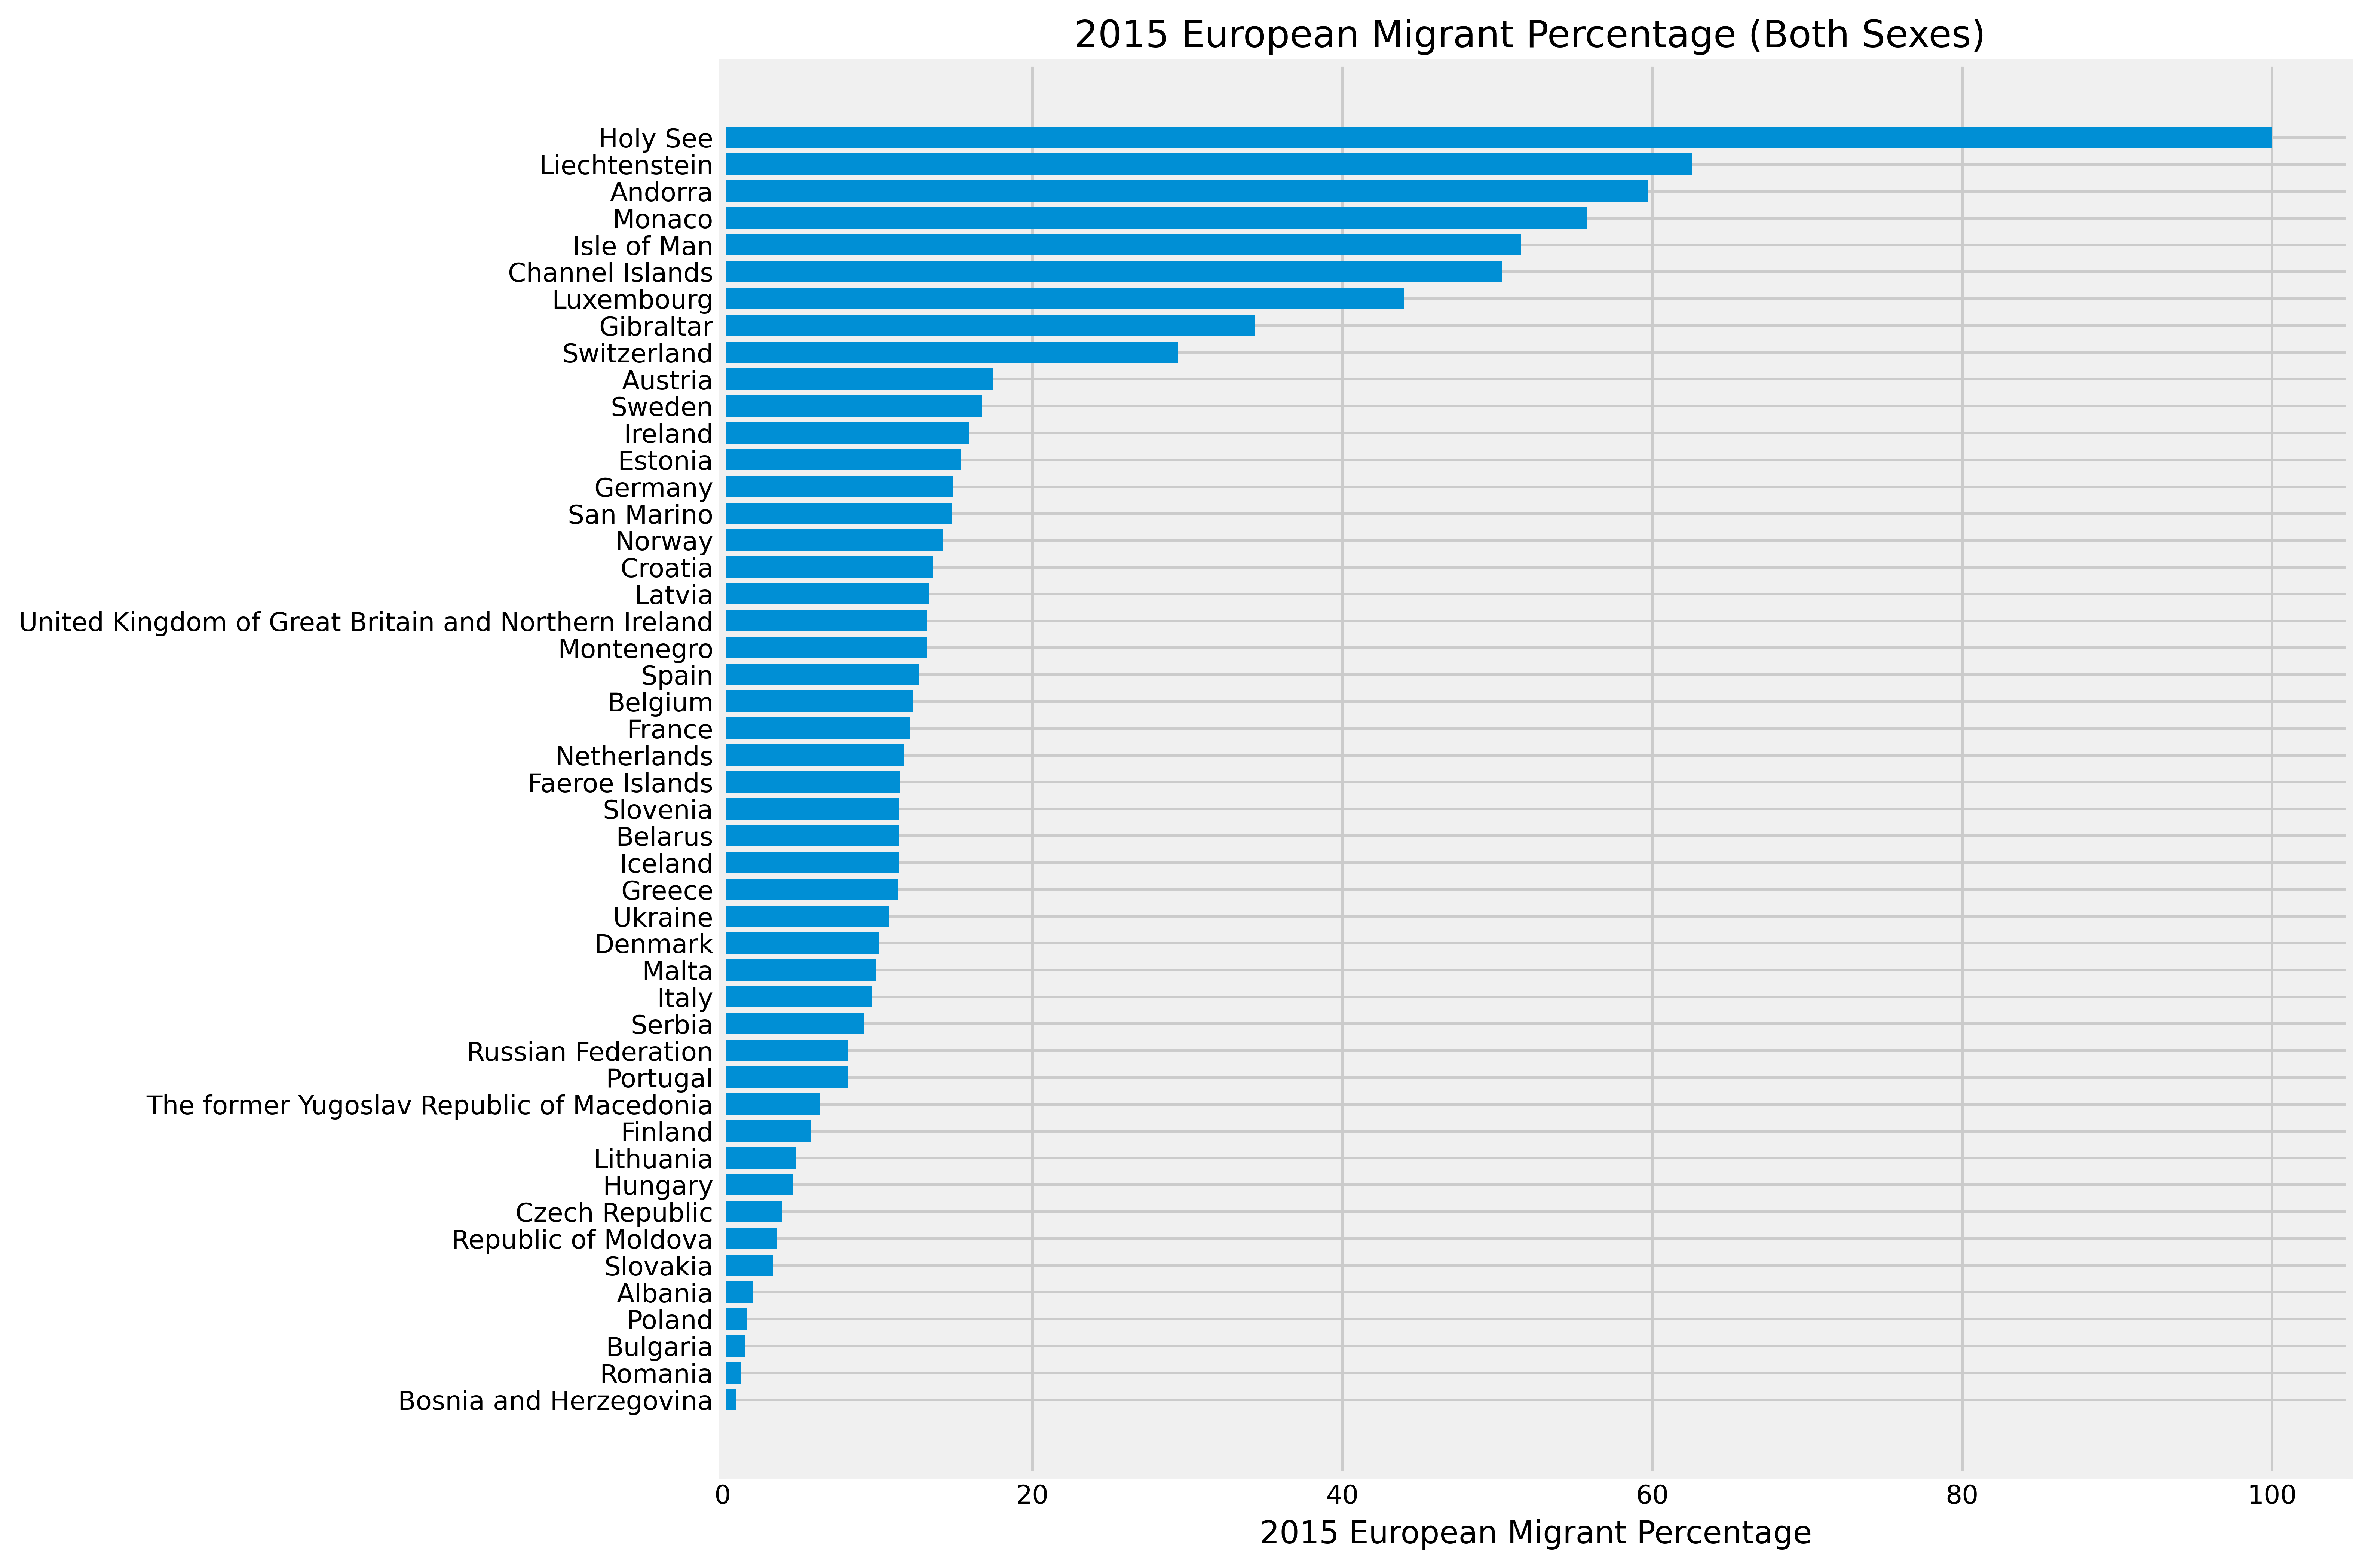

In [171]:
europe_per_country = migrant_per_eur2015bothAes["country"]
europe_per_stock = migrant_per_eur2015bothAes["International migrant stock as a percentage of the total population(thousands)"]
plt.figure(figsize= (10,10), dpi=500)
ax = plt.axes()

plt.xlabel("2015 European Migrant Percentage")
plt.title("2015 European Migrant Percentage (Both Sexes) ")
plt.barh(europe_per_country,europe_per_stock )

# 3.2 German Migrant Stock Percentage over the years (Both Sexes)

In [172]:
migrant_per_eur.head()

major_area         country  year   Sex  \
120     Europe          Europe  1990  Both   
121     Europe  Eastern Europe  1990  Both   
122     Europe         Belarus  1990  Both   
123     Europe        Bulgaria  1990  Both   
124     Europe  Czech Republic  1990  Both   

    International migrant stock as a percentage of the total population(thousands)  
120                                           6.825702                              
121                                           7.094647                              
122                                          12.206598                              
123                                           0.243847                              
124                                           1.069326

In [173]:
migrant_per_Ger = migrant_per_eur[migrant_per_eur["country"] == "Germany"]
migrant_per_Ger_both = migrant_per_Ger.loc [migrant_per_Ger["Sex"] == "Both"]

migrant_per_Ger_both.head(10)

major_area  country  year   Sex  \
167      Europe  Germany  1990  Both   
432      Europe  Germany  1995  Both   
697      Europe  Germany  2000  Both   
962      Europe  Germany  2005  Both   
1227     Europe  Germany  2010  Both   
1492     Europe  Germany  2015  Both   

     International migrant stock as a percentage of the total population(thousands)  
167                                            7.518128                              
432                                             9.14611                              
697                                            10.98056                              
962                                           12.676388                              
1227                                          14.428602                              
1492                                          14.879051

<BarContainer object of 6 artists>

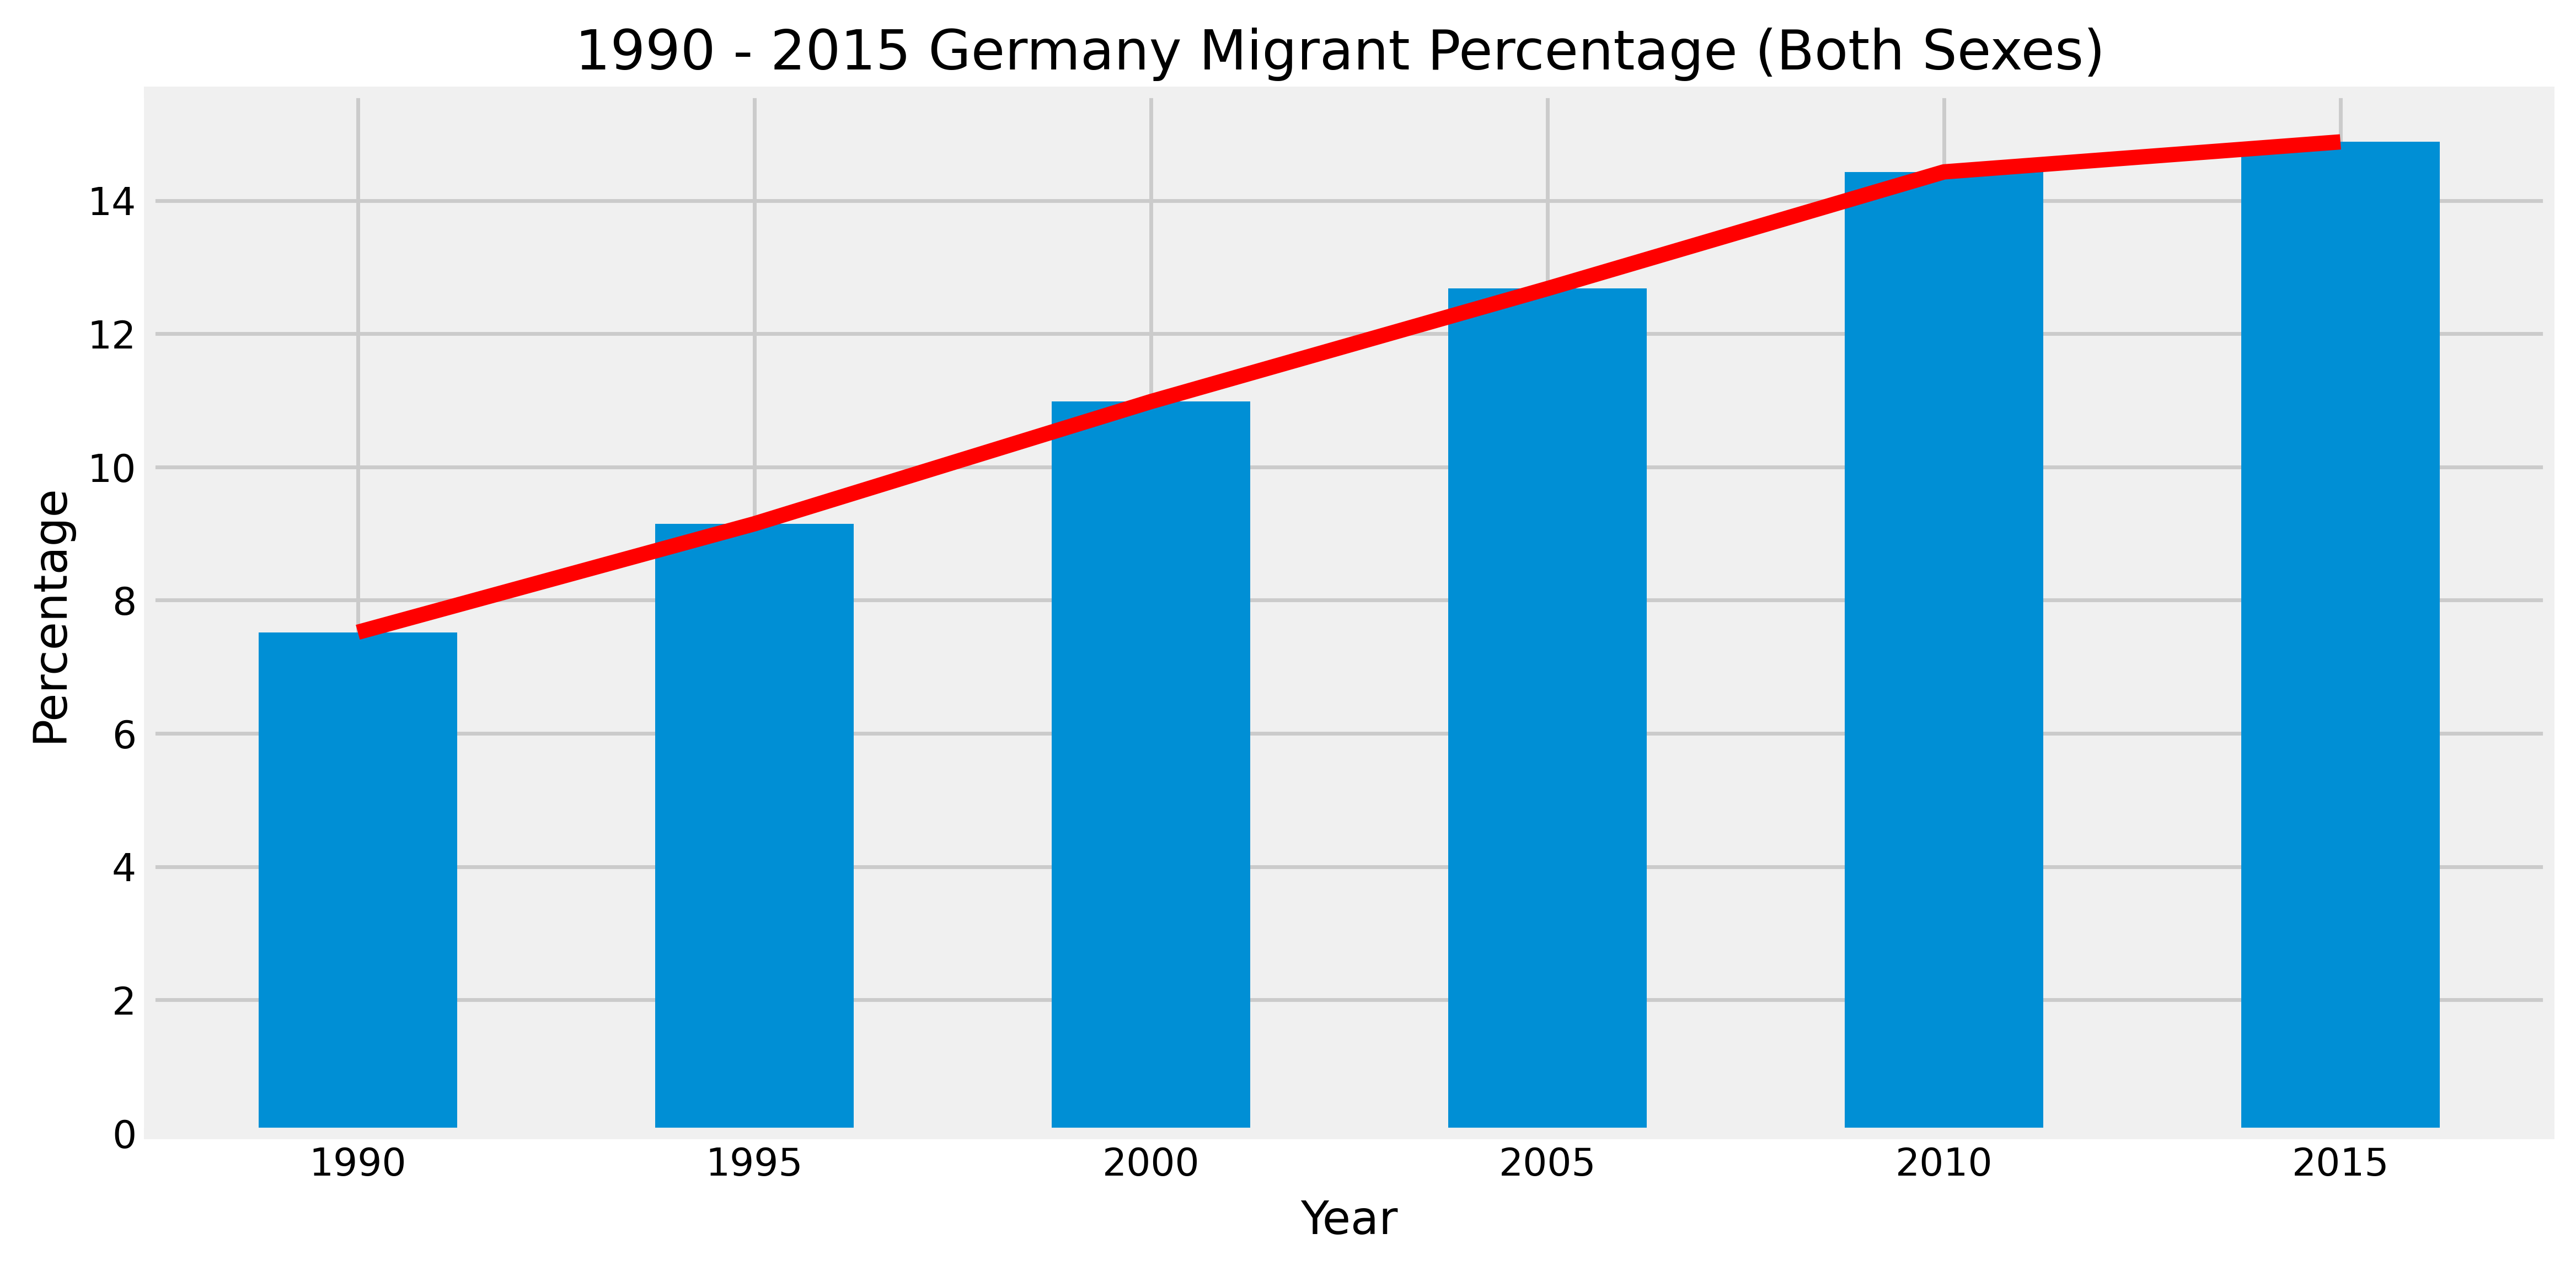

In [174]:
ger_per_year= migrant_per_Ger_both["year"]
ger_per_stock = migrant_per_Ger_both["International migrant stock as a percentage of the total population(thousands)"]


plt.figure(figsize= (10,5), dpi=500)
ax = plt.axes()

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("1990 - 2015 Germany Migrant Percentage (Both Sexes) ")



plt.plot(ger_per_year,ger_per_stock, color = 'red' )


plt.bar(ger_per_year,ger_per_stock, width = 0.5)

# 4.1 2015 Total Female Migrant Percentage 

In [175]:
Table4.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year     Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Female              NaN                     NaN                NaN   
1  1990  Female              NaN                     NaN                NaN   
2  1990  Female               No                     Yes                Yes   
3  1990  Female               No                     Yes                Yes   
4  1990  Female               No                     Yes                Yes   

  Percentage of the international migrant stock  
0                                     47.232408  
1                                     48.504812  
2                                     50.987061  
3                                     52.290646  
4                                     47.437838

In [176]:
total_female_migrant = Table4[['major_area','country', "year", 'Sex', 'Percentage of the international migrant stock' ]]
total_female_migrant.head()

major_area         country  year     Sex  \
0     Africa          Africa  1990  Female   
1     Africa  Eastern Africa  1990  Female   
2     Africa         Burundi  1990  Female   
3     Africa         Comoros  1990  Female   
4     Africa        Djibouti  1990  Female   

  Percentage of the international migrant stock  
0                                     47.232408  
1                                     48.504812  
2                                     50.987061  
3                                     52.290646  
4                                     47.437838

In [177]:
total_female_migrant_eur = total_female_migrant.loc [(total_female_migrant["major_area"] == "Europe")]
total_female_migrant_eur2015 = total_female_migrant_eur.loc [migrant["year"] == "2015"]
total_female_migrant_eur2015_ = total_female_migrant_eur2015[~migrant_per_eur2015both_["country"].isin
                                                   (["Europe","Eastern Europe","Northern Europe", "Southern Europe","Western Europe"])]
total_female_migrant_eur2015_Aes = total_female_migrant_eur2015_.sort_values(by = "Percentage of the international migrant stock", ascending = True)
total_female_migrant_eur2015_Aes.head()

major_area         country  year     Sex  \
1449     Europe  Czech Republic  2015  Female   
1485     Europe        Slovenia  2015  Female   
1483     Europe      San Marino  2015  Female   
1480     Europe           Malta  2015  Female   
1473     Europe         Andorra  2015  Female   

     Percentage of the international migrant stock  
1449                                     42.754627  
1485                                     43.004077  
1483                                     45.367819  
1480                                     46.988562  
1473                                     47.195951

<BarContainer object of 48 artists>

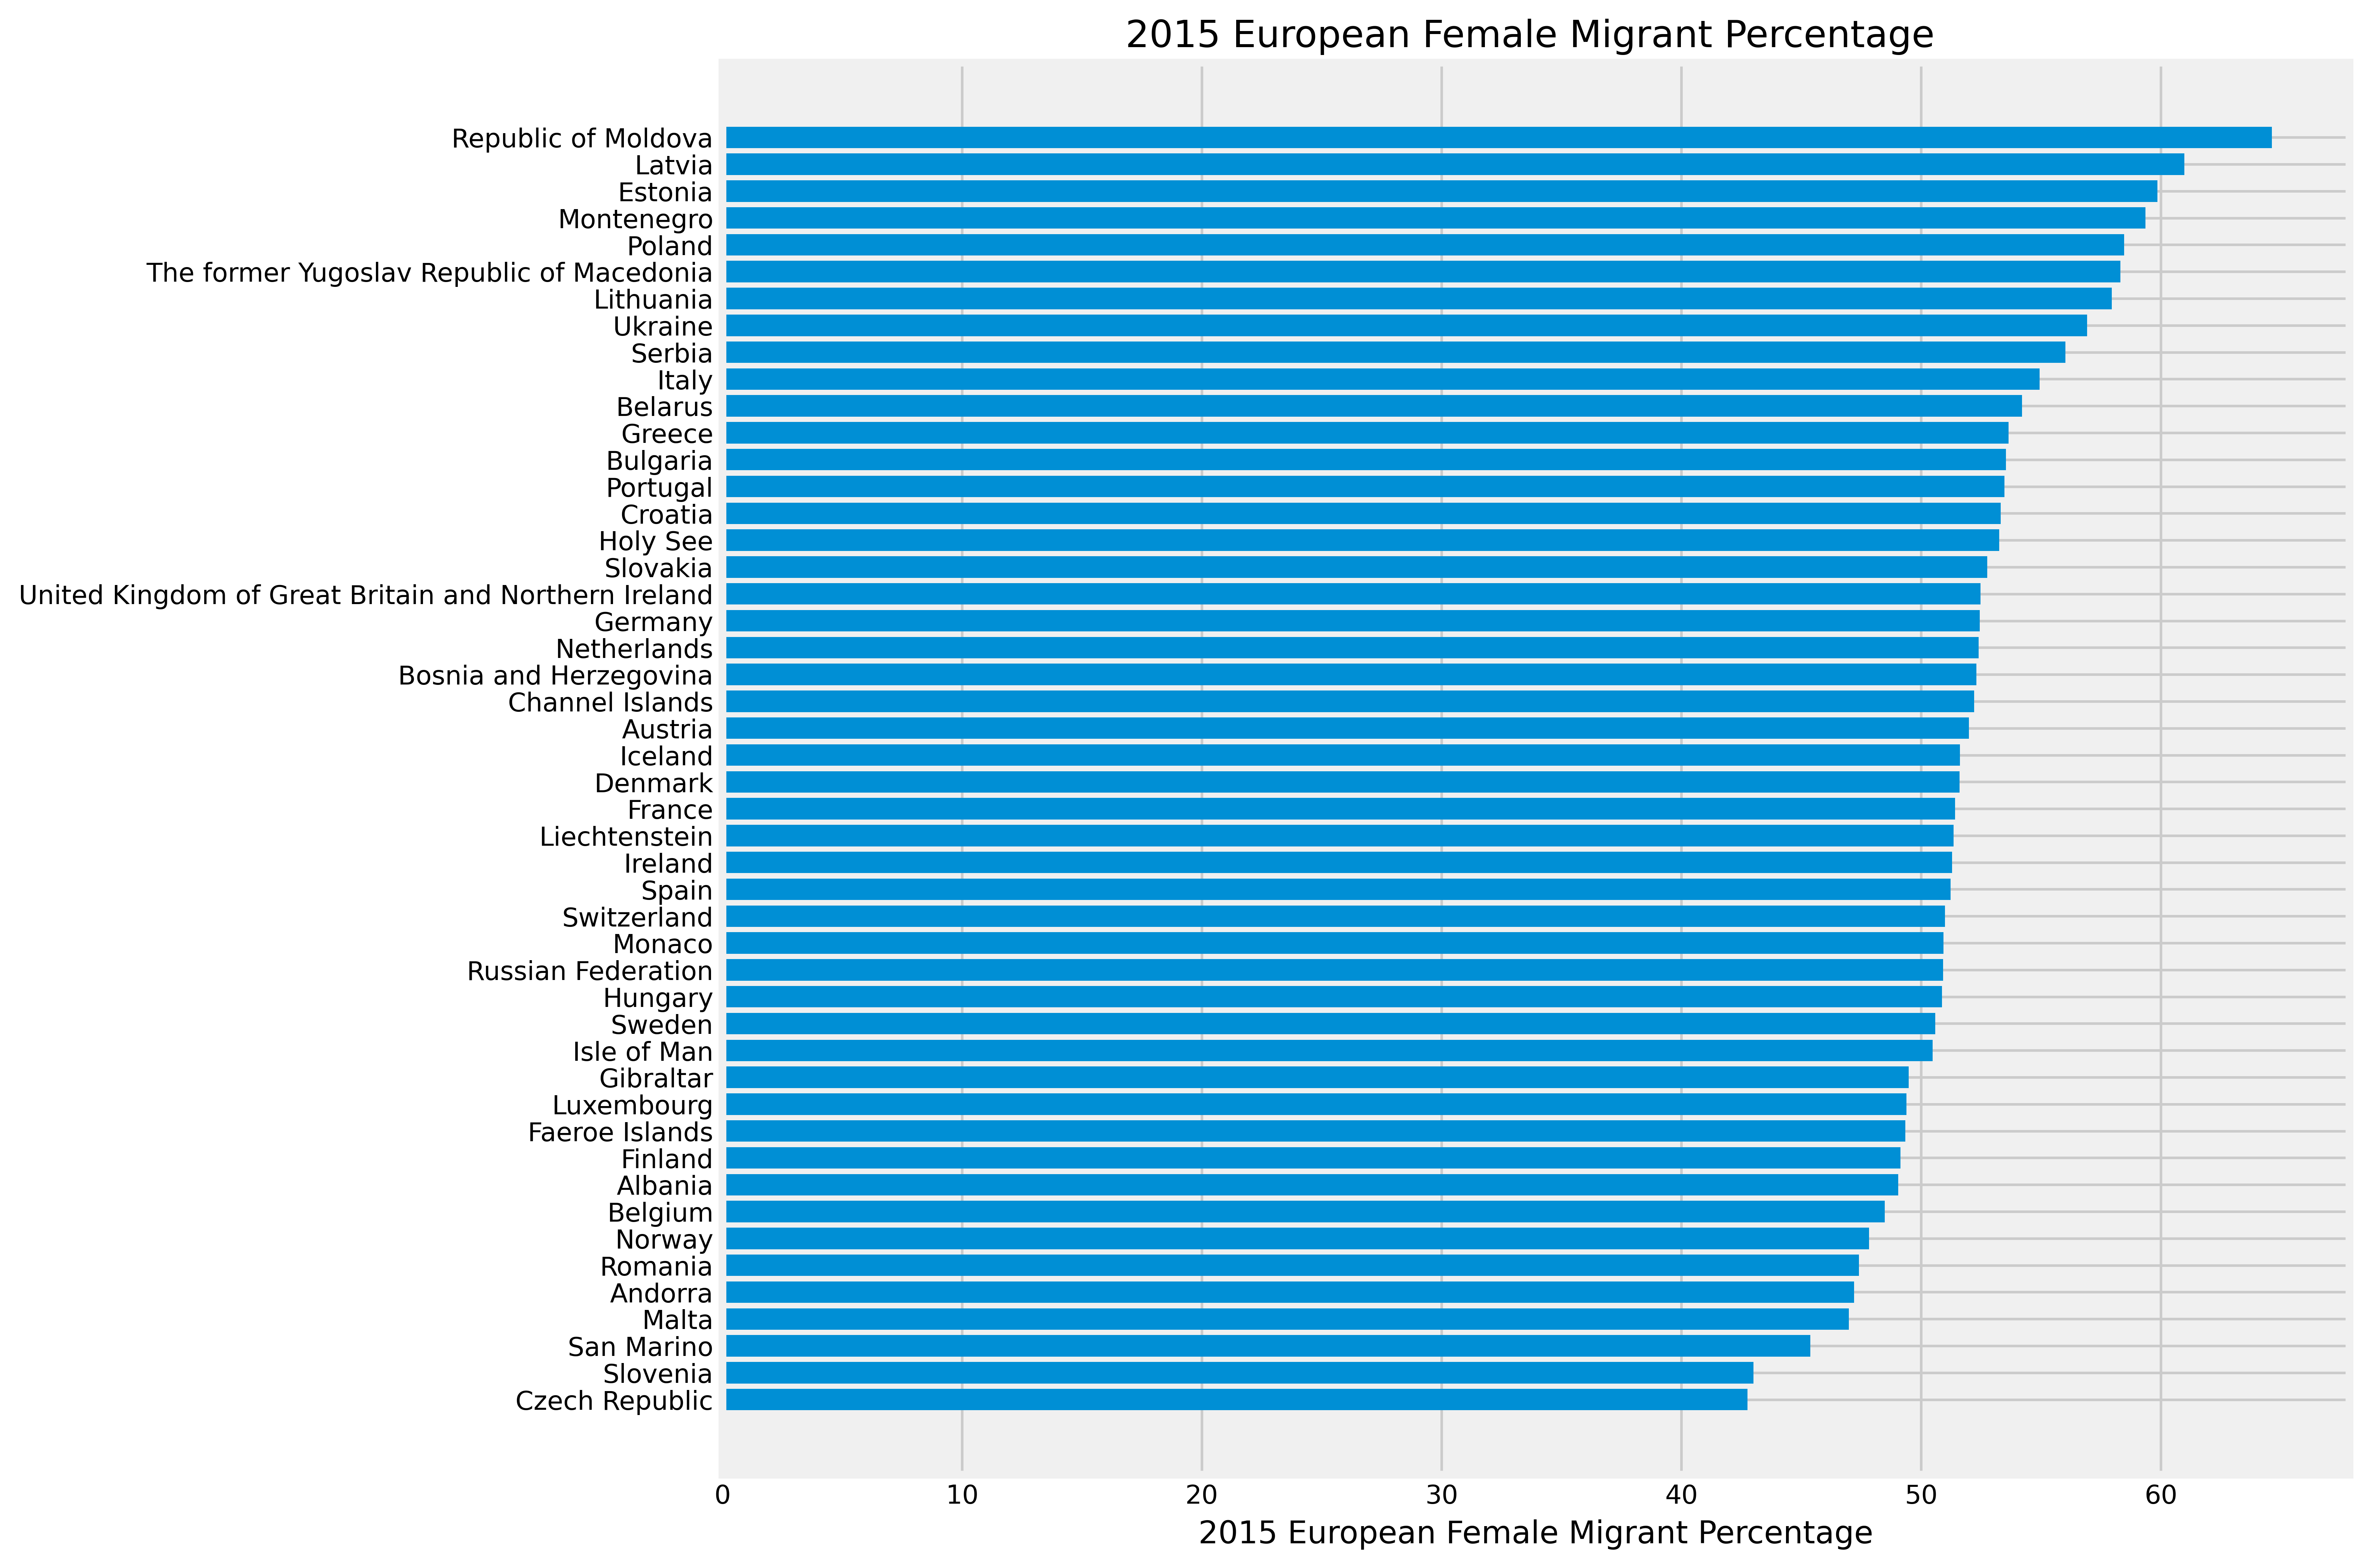

In [178]:
europe_female_country = total_female_migrant_eur2015_Aes["country"]
europe_female_stock = total_female_migrant_eur2015_Aes["Percentage of the international migrant stock"]
plt.figure(figsize= (10,10), dpi=500)
ax = plt.axes()

plt.xlabel("2015 European Female Migrant Percentage")
plt.title("2015 European Female Migrant Percentage ")
plt.barh(europe_female_country,europe_female_stock)

# 4.2 German Female Migrant Percentage over the years

In [179]:
female_migrant_ger = total_female_migrant.loc[total_female_migrant["country"] == "Germany"]
female_migrant_ger.head()

major_area  country  year     Sex  \
167      Europe  Germany  1990  Female   
432      Europe  Germany  1995  Female   
697      Europe  Germany  2000  Female   
962      Europe  Germany  2005  Female   
1227     Europe  Germany  2010  Female   

     Percentage of the international migrant stock  
167                                      44.524468  
432                                      47.773513  
697                                      49.918261  
962                                      51.338925  
1227                                     52.439726

<BarContainer object of 6 artists>

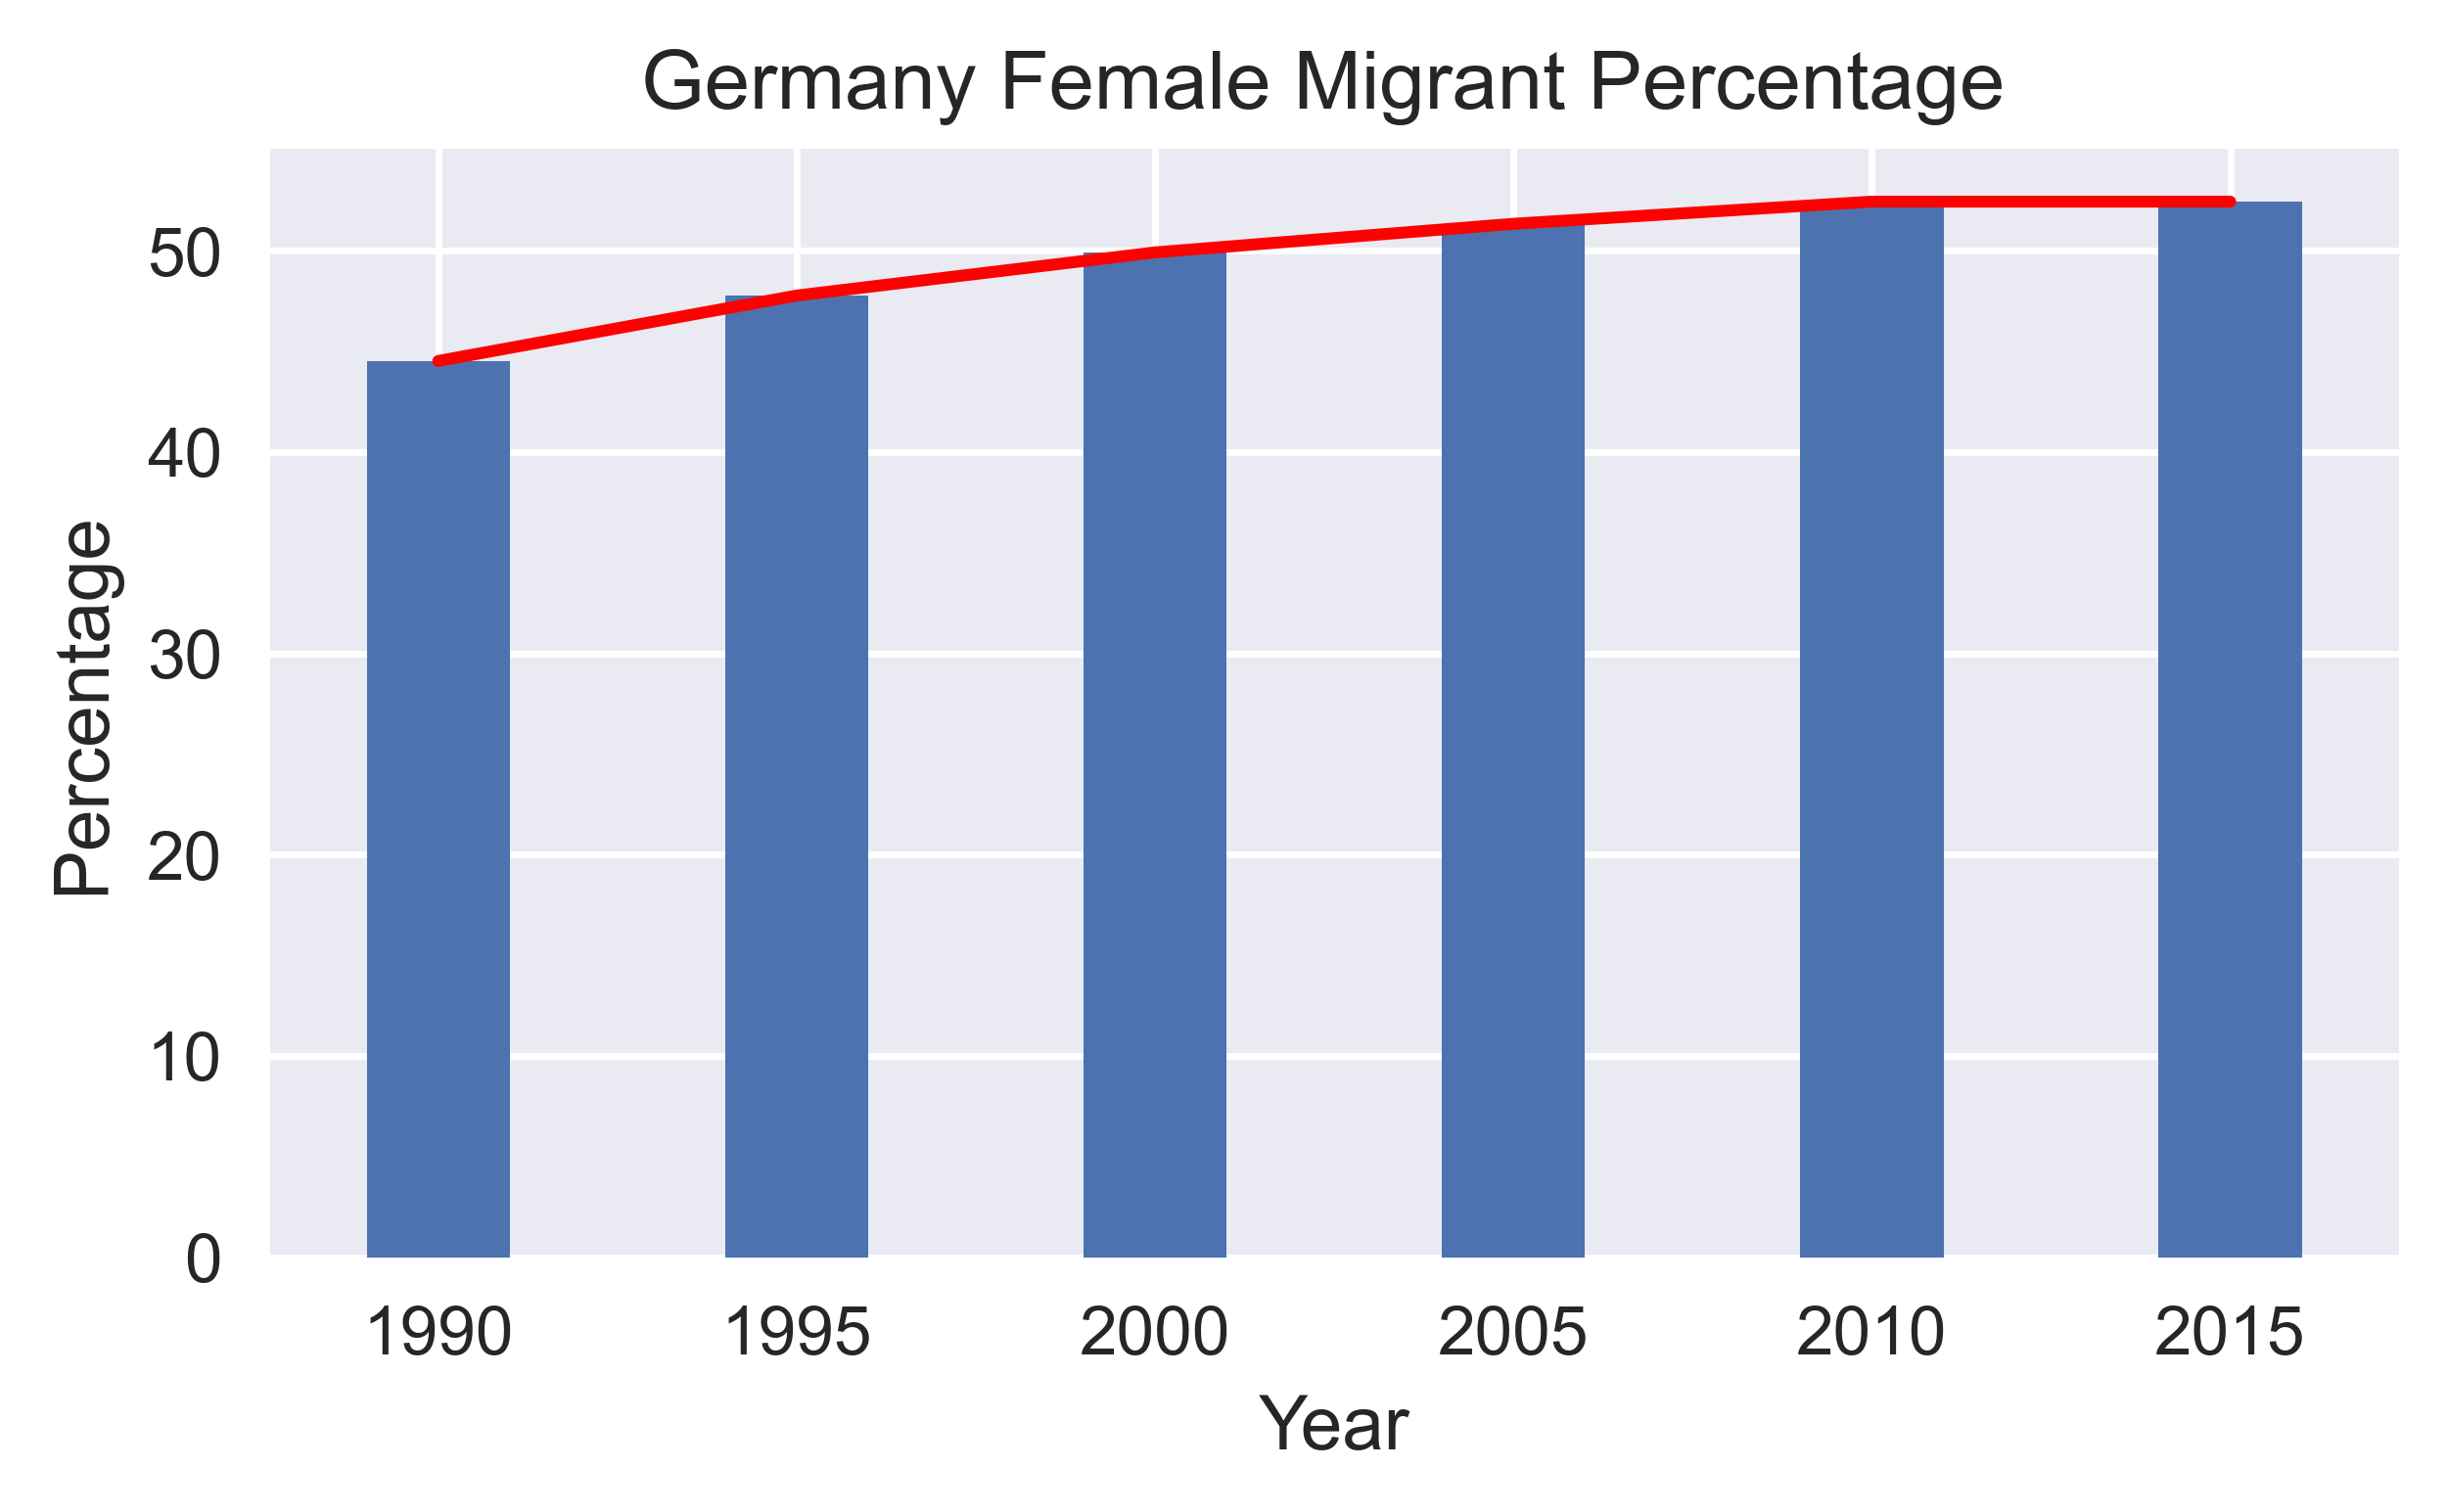

In [180]:
female_migrant_ger_year= female_migrant_ger["year"]
female_migrant_ger_per = female_migrant_ger["Percentage of the international migrant stock"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Germany Female Migrant Percentage ")

plt.plot(female_migrant_ger_year,female_migrant_ger_per, color = 'red' )


plt.bar(female_migrant_ger_year,female_migrant_ger_per, width = 0.4)

# 5.1 Annual Rate of Change Migrant Stock (Germany/Both Sexes)

In [181]:
Table5.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

  Type_of_data(a)       year   Sex Developed region Least developed country  \
0             NaN  1990-1995  Both              NaN                     NaN   
1             NaN  1990-1995  Both              NaN                     NaN   
2             B R  1990-1995  Both               No                     Yes   
3               B  1990-1995  Both               No                     Yes   
4             B R  1990-1995  Both               No                     Yes   

  Sub-Saharan Africa Annual rate of change of the migrant stock  
0                NaN                                   0.826734  
1                NaN                                  -3.435412  
2                Yes                                  -5.355717  
3                Yes                                  -0.199873  
4                Yes                                  -4.058465

In [182]:
aro_migrant = Table5[['major_area','country', "year", 'Sex', 'Annual rate of change of the migrant stock' ]]
aro_migrant_ger = aro_migrant.loc[aro_migrant["country"] == "Germany"]
aro_migrant_ger_both = aro_migrant_ger.loc [aro_migrant_ger["Sex"] == "Both"]
aro_migrant_ger_both.head(10)

major_area  country       year   Sex  \
167      Europe  Germany  1990-1995  Both   
432      Europe  Germany  1995-2000  Both   
697      Europe  Germany  2000-2005  Both   
962      Europe  Germany  2005-2010  Both   
1227     Europe  Germany  2010-2015  Both   

     Annual rate of change of the migrant stock  
167                                    4.581597  
432                                    3.725192  
697                                    2.713137  
962                                    2.388663  
1227                                   0.677704

Text(0.5, 1.0, 'Germany Annual Rate of Change of The Migrant Stock (Both Sexes)')

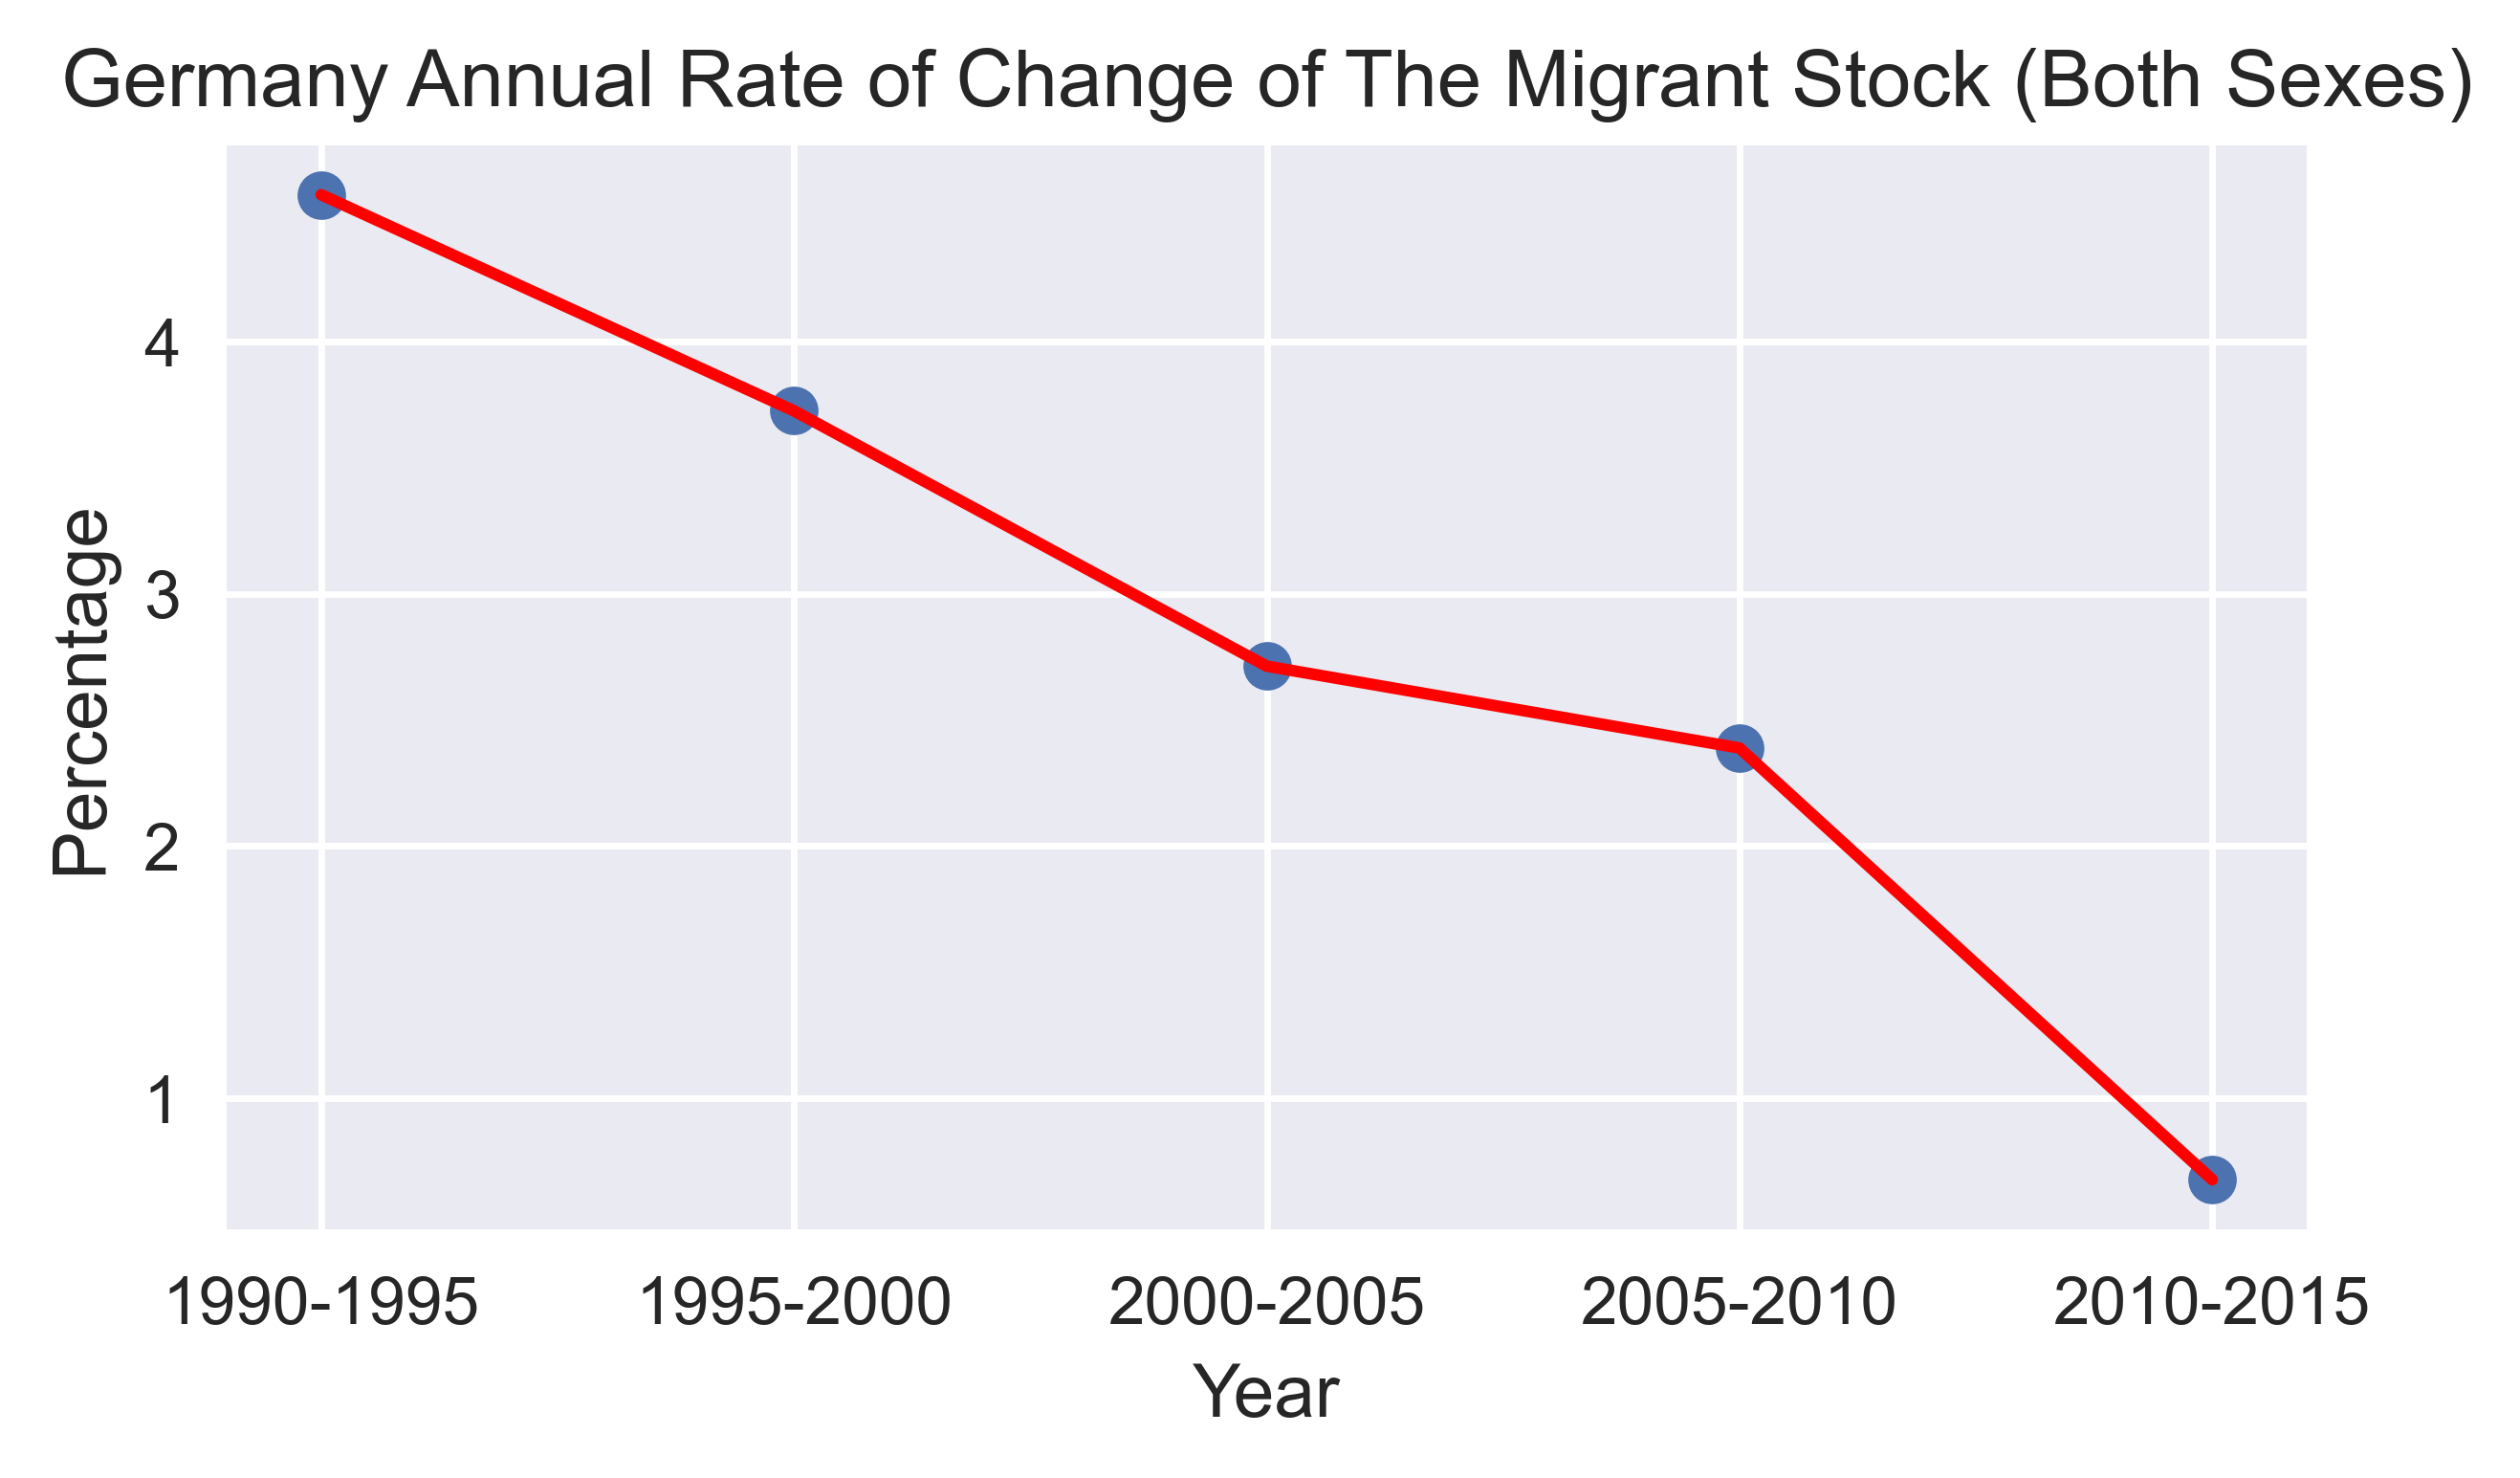

In [183]:
aro_migrant_ger_both_year= aro_migrant_ger_both["year"]
aro_migrant_ger_both_per = aro_migrant_ger_both["Annual rate of change of the migrant stock"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)

plt.xlabel("Year")
plt.ylabel("Percentage")


plt.plot(aro_migrant_ger_both_year,aro_migrant_ger_both_per, color = 'red' )
plt.scatter(aro_migrant_ger_both_year, aro_migrant_ger_both_per)
plt.title("Germany Annual Rate of Change of The Migrant Stock (Both Sexes)")


# plt.bar(female_migrant_ger_year,female_migrant_ger_per, width = 0.4)

# 5.2 Annual Rate of Change Migrant Stock (Germany/Male)

In [184]:
aro_migrant_ger_male = aro_migrant_ger.loc [aro_migrant_ger["Sex"] == "Male"]
aro_migrant_ger_male.head(8)

major_area  country       year   Sex  \
1492     Europe  Germany  1990-1995  Male   
1757     Europe  Germany  1995-2000  Male   
2022     Europe  Germany  2000-2005  Male   
2287     Europe  Germany  2005-2010  Male   
2552     Europe  Germany  2010-2015  Male   

     Annual rate of change of the migrant stock  
1492                                   3.374551  
1757                                   2.886526  
2022                                   2.137597  
2287                                   1.931031  
2552                                   0.677704

Text(0.5, 1.0, 'Germany Annual Rate of Change of The Migrant Stock (Male)')

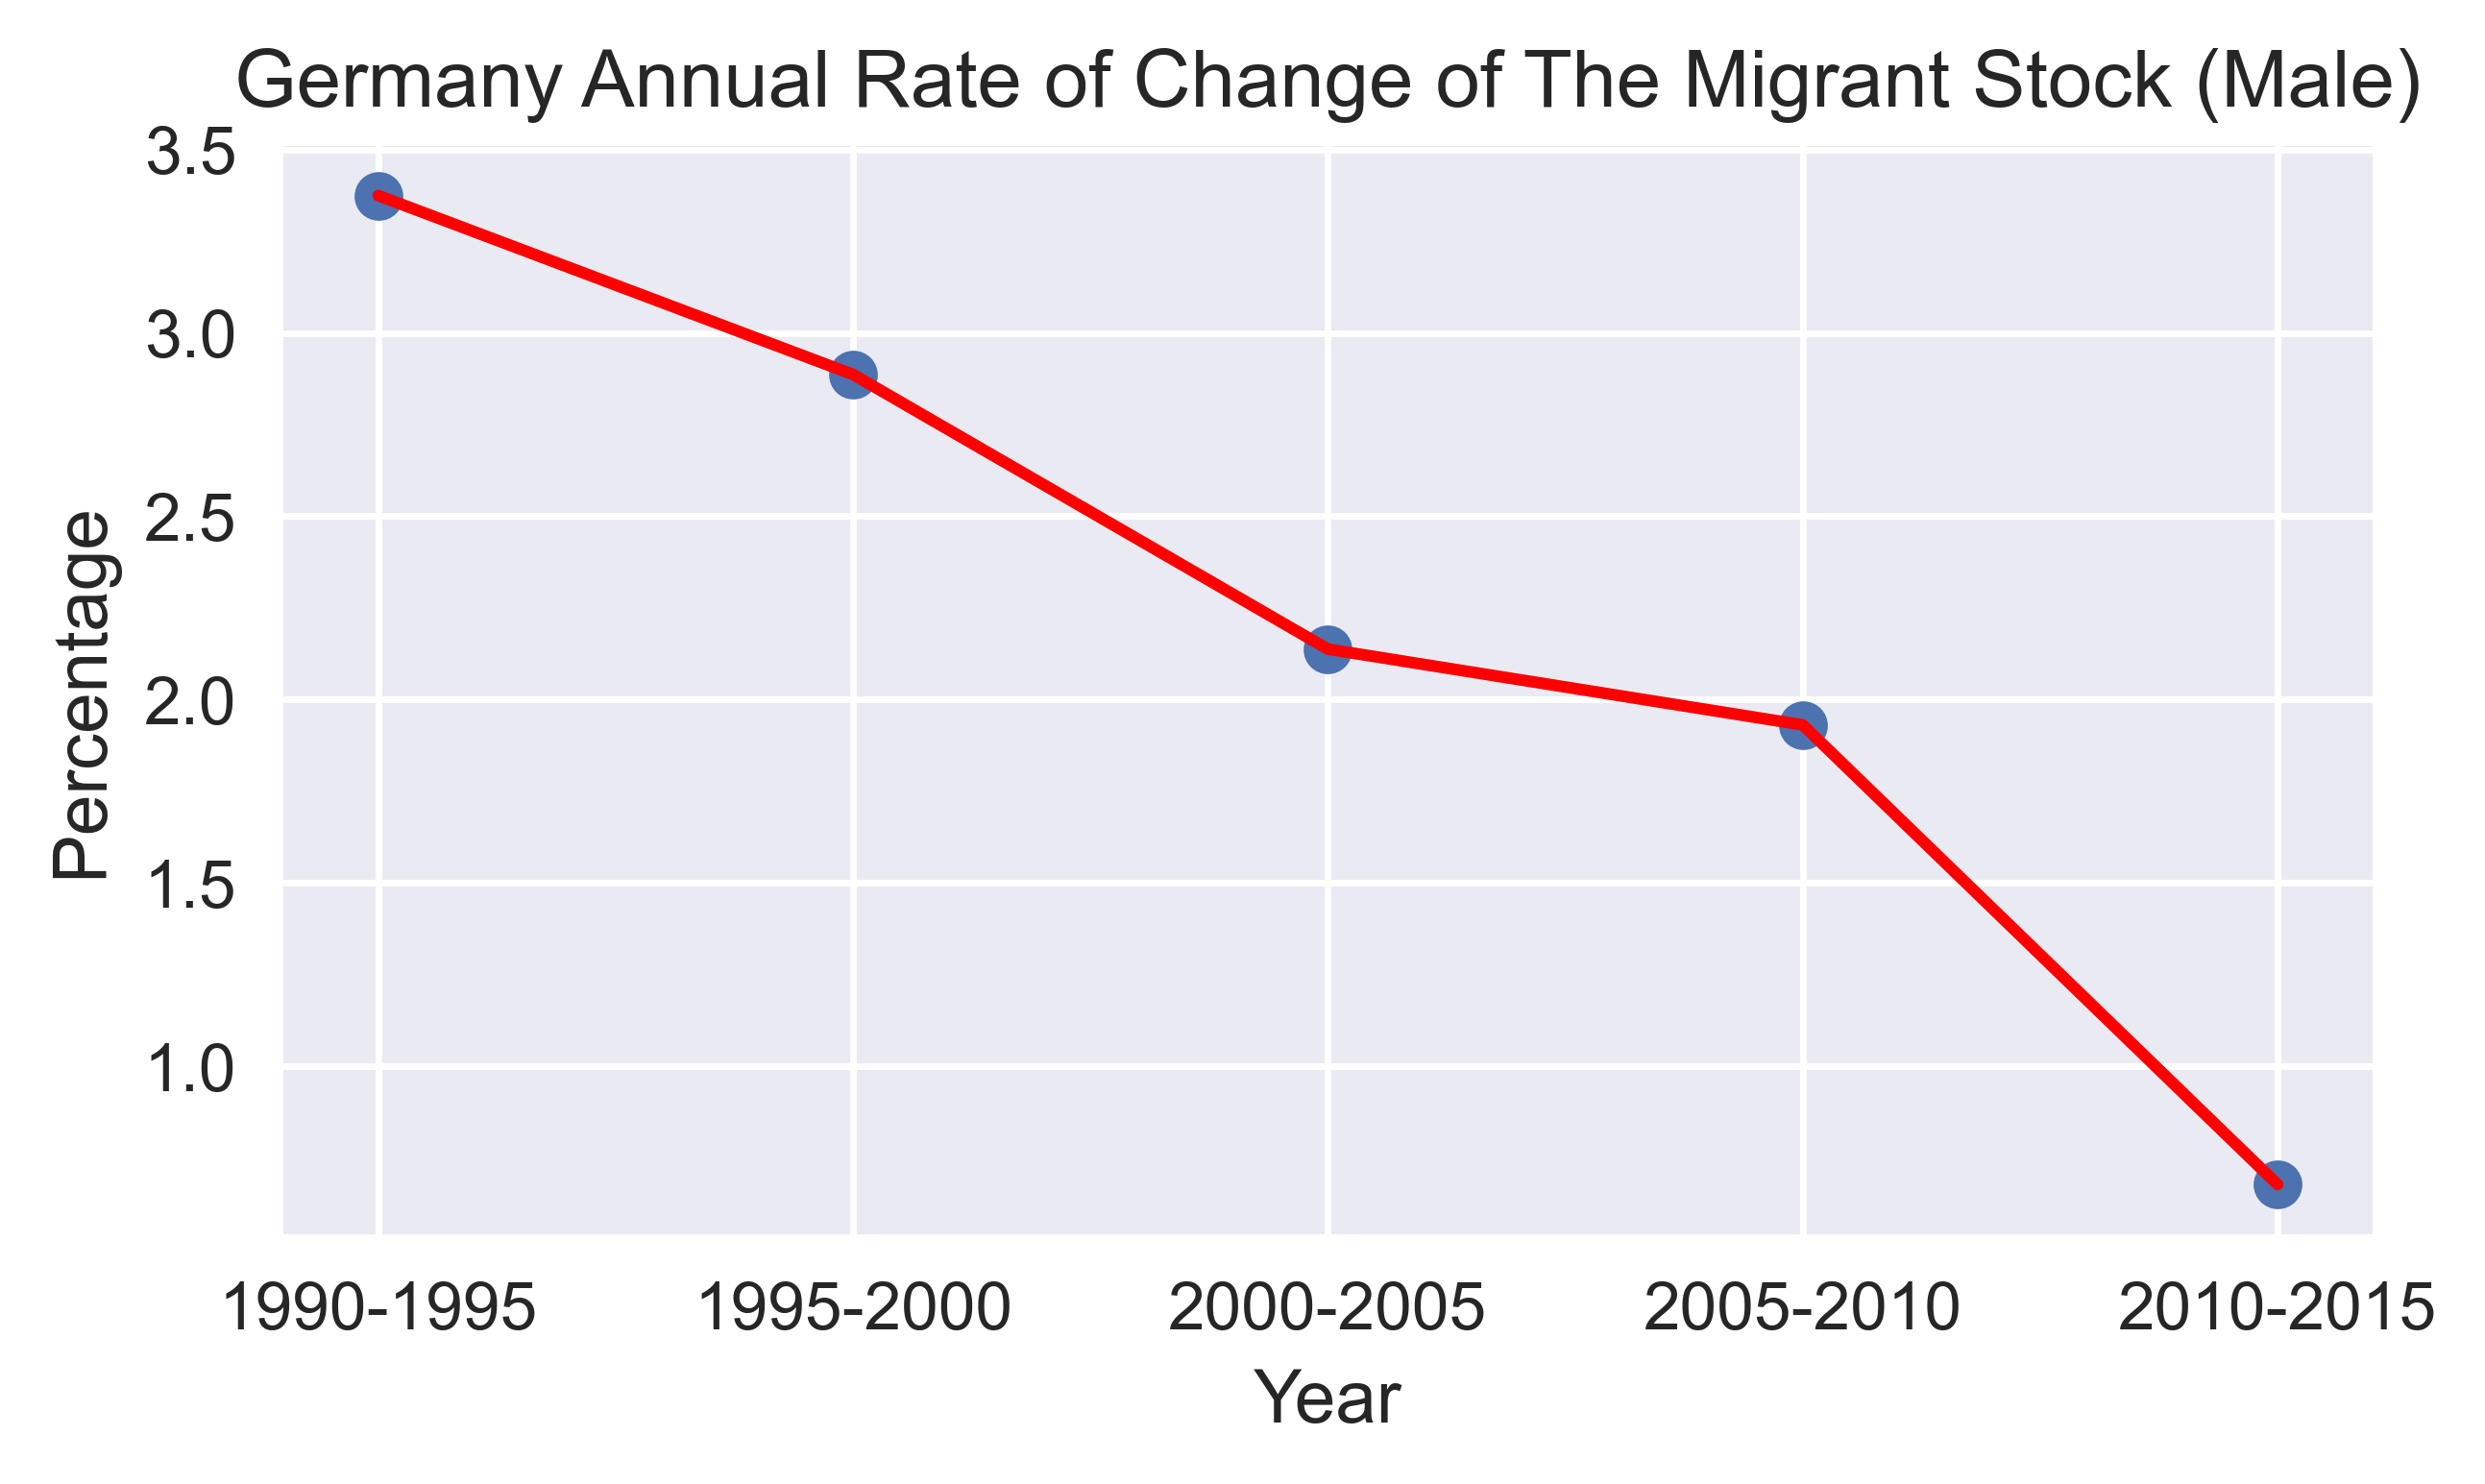

In [185]:
aro_migrant_ger_male_year= aro_migrant_ger_male["year"]
aro_migrant_ger_male_per = aro_migrant_ger_male["Annual rate of change of the migrant stock"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)

plt.xlabel("Year")
plt.ylabel("Percentage")


plt.plot(aro_migrant_ger_male_year,aro_migrant_ger_male_per, color = 'red' )
plt.scatter(aro_migrant_ger_male_year, aro_migrant_ger_male_per)
plt.title("Germany Annual Rate of Change of The Migrant Stock (Male)")

# 5.3 Annual Rate of Change Migrant Stock (Germany/Female)

In [186]:
aro_migrant_ger_female = aro_migrant_ger.loc [aro_migrant_ger["Sex"] == "Female"]
aro_migrant_ger_female.head(8)

major_area  country       year     Sex  \
2817     Europe  Germany  1990-1995  Female   
3082     Europe  Germany  1995-2000  Female   
3347     Europe  Germany  2000-2005  Female   
3612     Europe  Germany  2005-2010  Female   
3877     Europe  Germany  2010-2015  Female   

     Annual rate of change of the migrant stock  
2817                                   5.990247  
3082                                   4.603502  
3347                                   3.274384  
3612                                   2.812967  
3877                                   0.677704

Text(0.5, 1.0, 'Germany Annual Rate of Change of The Migrant Stock by Sex')

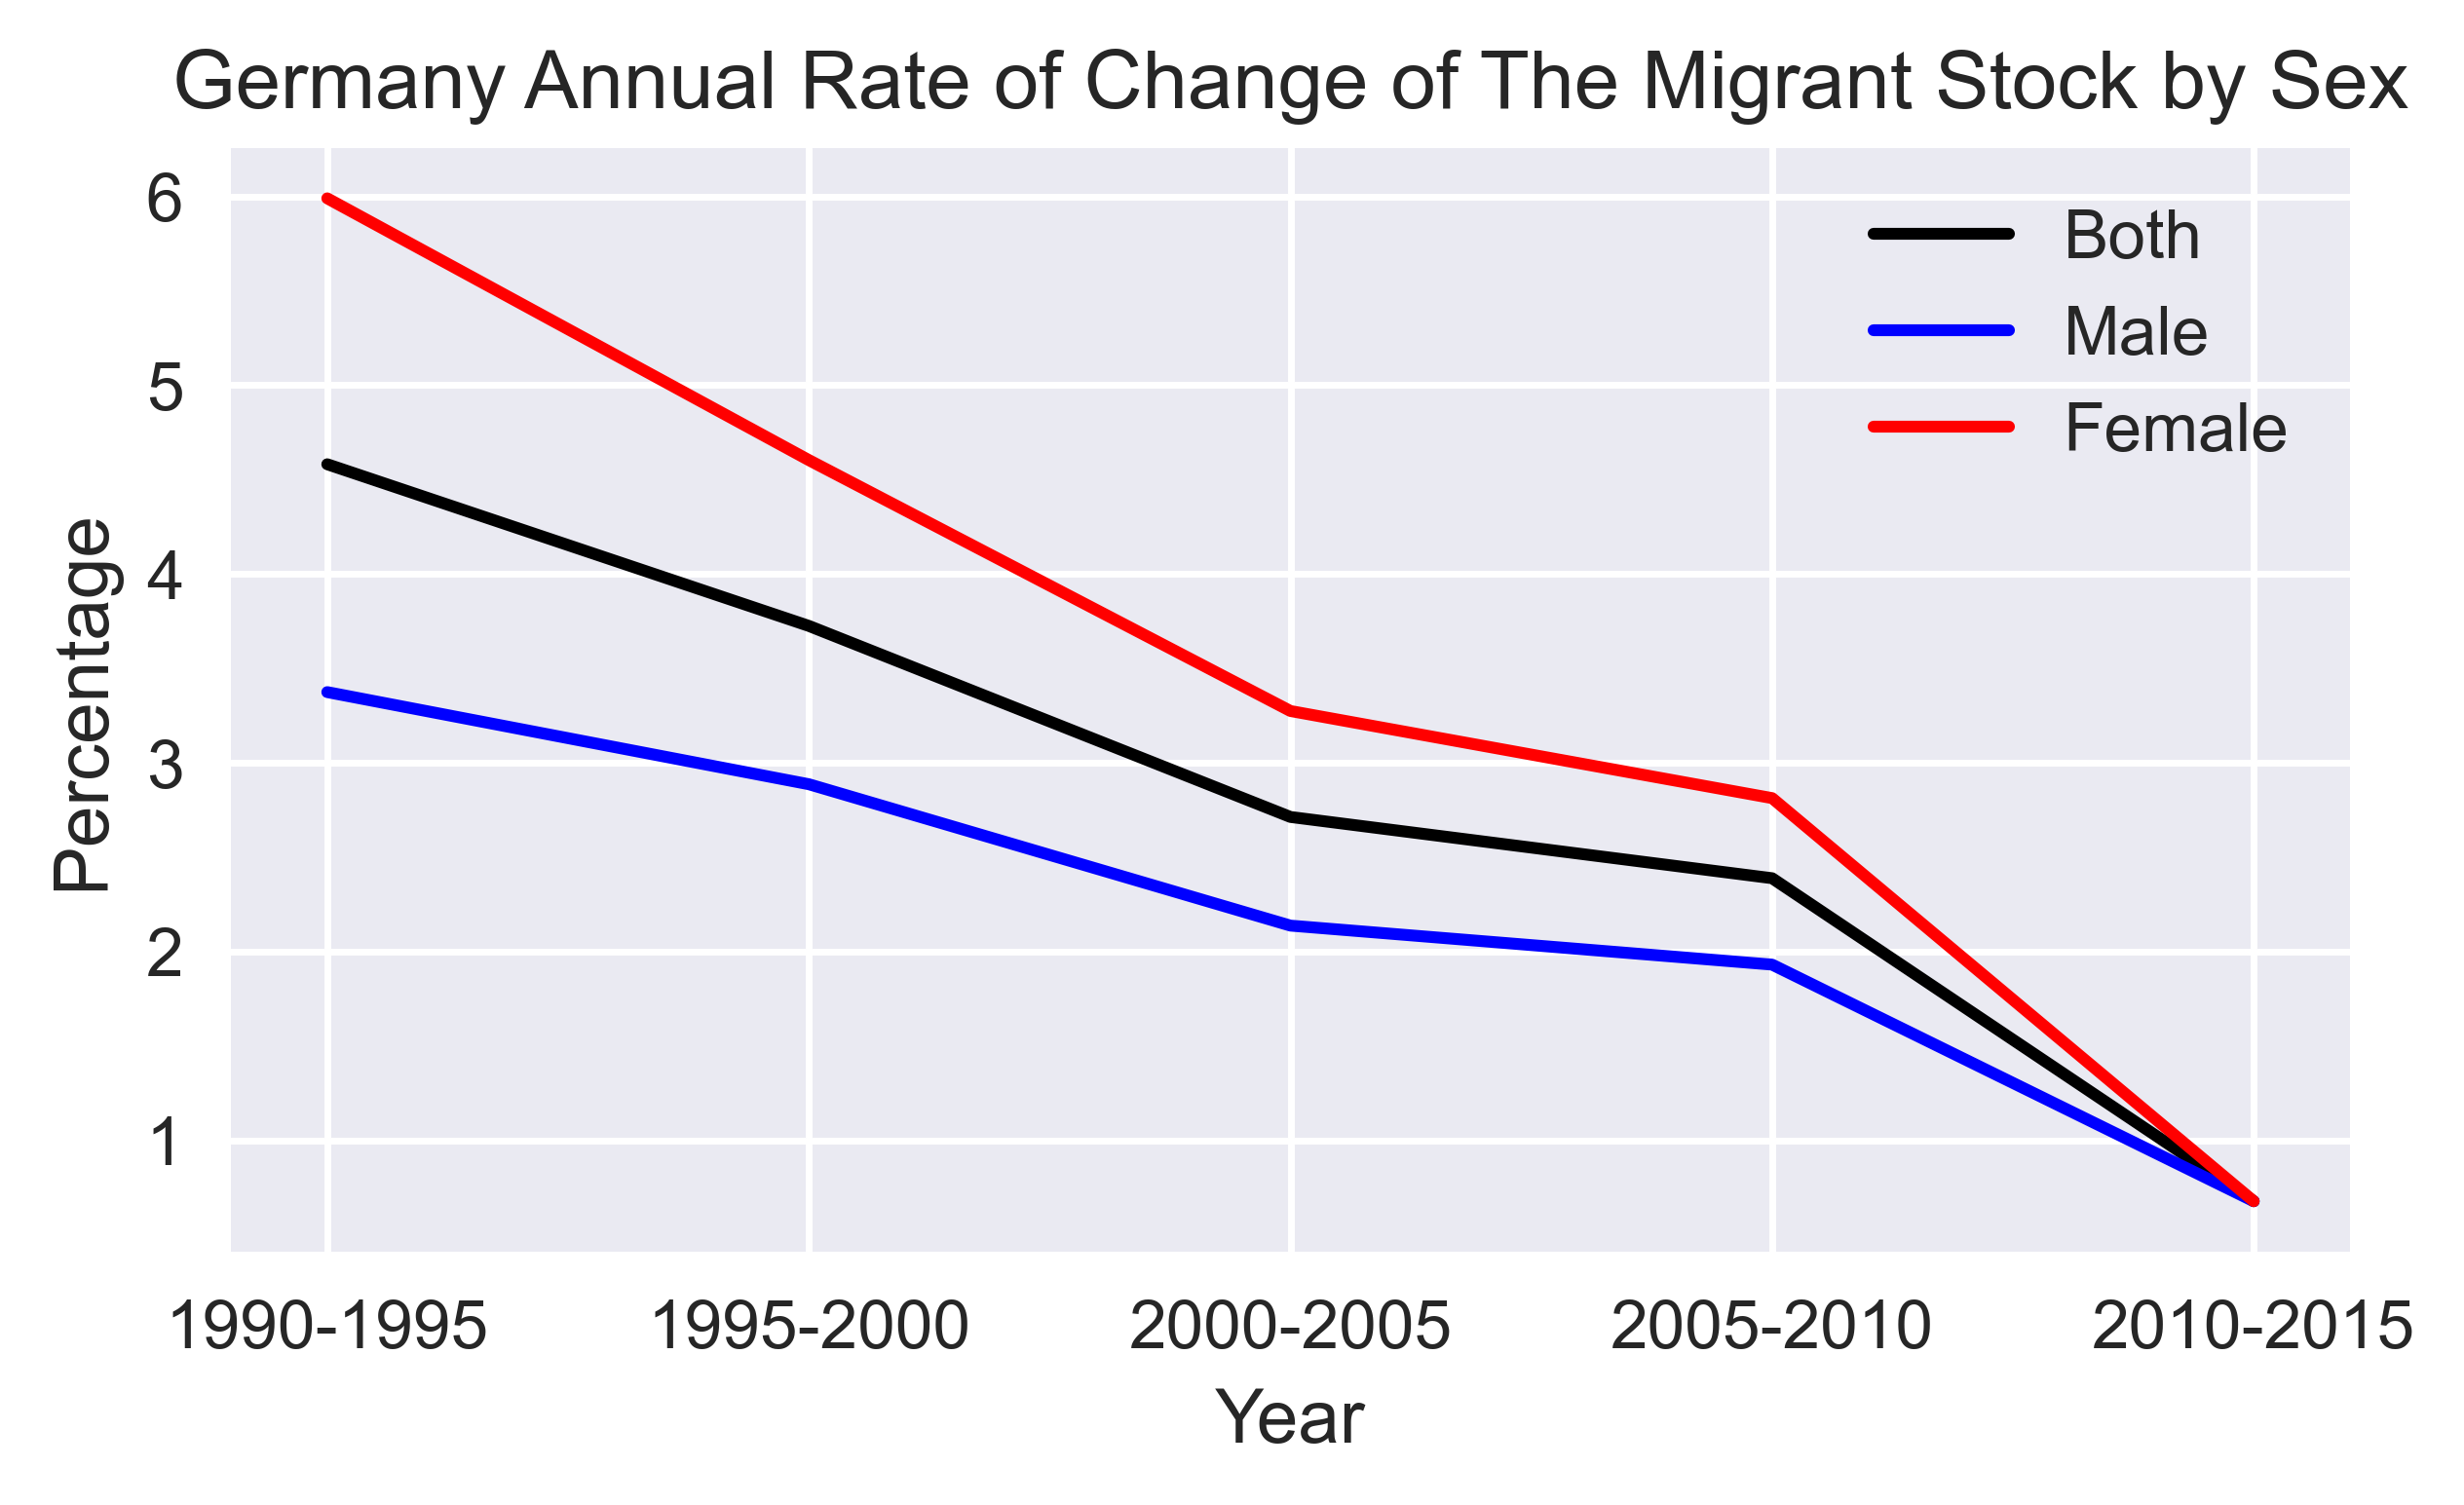

In [187]:
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)
# plt.figure(figsize= (5,3), dpi=500)
# plt.xlabel("Year")
# plt.ylabel("Percentage")
# plt.scatter(aro_migrant_ger_female_year, aro_migrant_ger_female_per)
# plt.title("Germany Annual Rate of Change of The Migrant Stock (Female)")


aro_migrant_ger_both_year= aro_migrant_ger_both["year"]
aro_migrant_ger_both_per = aro_migrant_ger_both["Annual rate of change of the migrant stock"]

aro_migrant_ger_female_year= aro_migrant_ger_female["year"]
aro_migrant_ger_female_per = aro_migrant_ger_female["Annual rate of change of the migrant stock"]

aro_migrant_ger_male_year= aro_migrant_ger_male["year"]
aro_migrant_ger_male_per = aro_migrant_ger_male["Annual rate of change of the migrant stock"]



plt.xlabel("Year")
plt.ylabel("Percentage")

plt.plot(aro_migrant_ger_both_year,aro_migrant_ger_both_per, color = 'Black' )
# plt.scatter(aro_migrant_ger_both_year, aro_migrant_ger_both_per)
plt.plot(aro_migrant_ger_male_year,aro_migrant_ger_male_per, color = 'blue', label = "blue" )
# plt.scatter(aro_migrant_ger_male_year, aro_migrant_ger_male_per, color = 'black')
plt.plot(aro_migrant_ger_female_year,aro_migrant_ger_female_per, color = 'red', label = "red"  )
# plt.scatter(aro_migrant_ger_female_year, aro_migrant_ger_female_per, color = 'yellow')


plt.legend(["Both","Male", "Female"])


plt.title("Germany Annual Rate of Change of The Migrant Stock by Sex")

# 6.1 Europe Total Refugee Stock (Both Sexes)

In [188]:
Table6_refugee1.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

   year   Sex Developed region Least developed country Sub-Saharan Africa  \
0  1990  Both              NaN                     NaN                NaN   
1  1990  Both              NaN                     NaN                NaN   
2  1990  Both               No                     Yes                Yes   
3  1990  Both               No                     Yes                Yes   
4  1990  Both               No                     Yes                Yes   

  Estimated refugee stock at mid-year  \
0                             5687352   
1                             3168001   
2                              267929   
3                                   0   
4                               54508   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

In [189]:
total_ref = Table6_refugee1[['major_area','country', "year", 'Sex', 'Estimated refugee stock at mid-year' ]]
euorpe_ref= total_ref.loc [(total_ref["major_area"] == "Europe")]
euorpe_ref_2015 = euorpe_ref.loc [euorpe_ref["year"] == "2015"]

euorpe_ref_2015_2= euorpe_ref_2015[~euorpe_ref_2015["country"].isin
                                                   (["Europe","Eastern Europe","Northern Europe", "Southern Europe","Western Europe"])]
euorpe_ref_2015_2_Aes = euorpe_ref_2015_2.sort_values(by = "Estimated refugee stock at mid-year", ascending = True)
euorpe_ref_2015_2_Aes.head(10)

major_area          country  year   Sex  \
1478     Europe         Holy See  2015  Both   
1476     Europe        Gibraltar  2015  Both   
1461     Europe   Faeroe Islands  2015  Both   
1458     Europe  Channel Islands  2015  Both   
1465     Europe      Isle of Man  2015  Both   
1483     Europe       San Marino  2015  Both   
1473     Europe          Andorra  2015  Both   
1495     Europe           Monaco  2015  Both   
1463     Europe          Iceland  2015  Both   
1460     Europe          Estonia  2015  Both   

     Estimated refugee stock at mid-year  
1478                                 0.0  
1476                                 0.0  
1461                                 0.0  
1458                                 0.0  
1465                                 0.0  
1483                                 0.0  
1473                                 0.0  
1495                                34.0  
1463                                79.0  
1460                                81.0

In [190]:
europe_refugee2015bar = px.bar(data_frame = euorpe_ref_2015_2_Aes
                           ,x = 'Estimated refugee stock at mid-year', y = 'country',
                           labels={
                           "country": "Country",
                           'Estimated refugee stock at mid-year': "Estimated Refugee Stock",
                             }
                          , text_auto='.4s'
                          , title= "2015 Europe Estimated Refugee Stock (Both Sexes)"
                                ,height=1600, width= 1500
                               ,orientation='h'
                      
                      )

europe_refugee2015bar.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False )

europe_refugee2015bar.show()

# 6.2 Germany Refugee Stock (Both Sexes)

In [191]:
ger_ref_stock = euorpe_ref.loc[euorpe_ref["country"] == "Germany"]
ger_ref_stock.head()


major_area  country  year   Sex Estimated refugee stock at mid-year
167      Europe  Germany  1990  Both                              722250
432      Europe  Germany  1995  Both                             1267900
697      Europe  Germany  2000  Both                              906000
962      Europe  Germany  2005  Both                              700016
1227     Europe  Germany  2010  Both                            594269.0

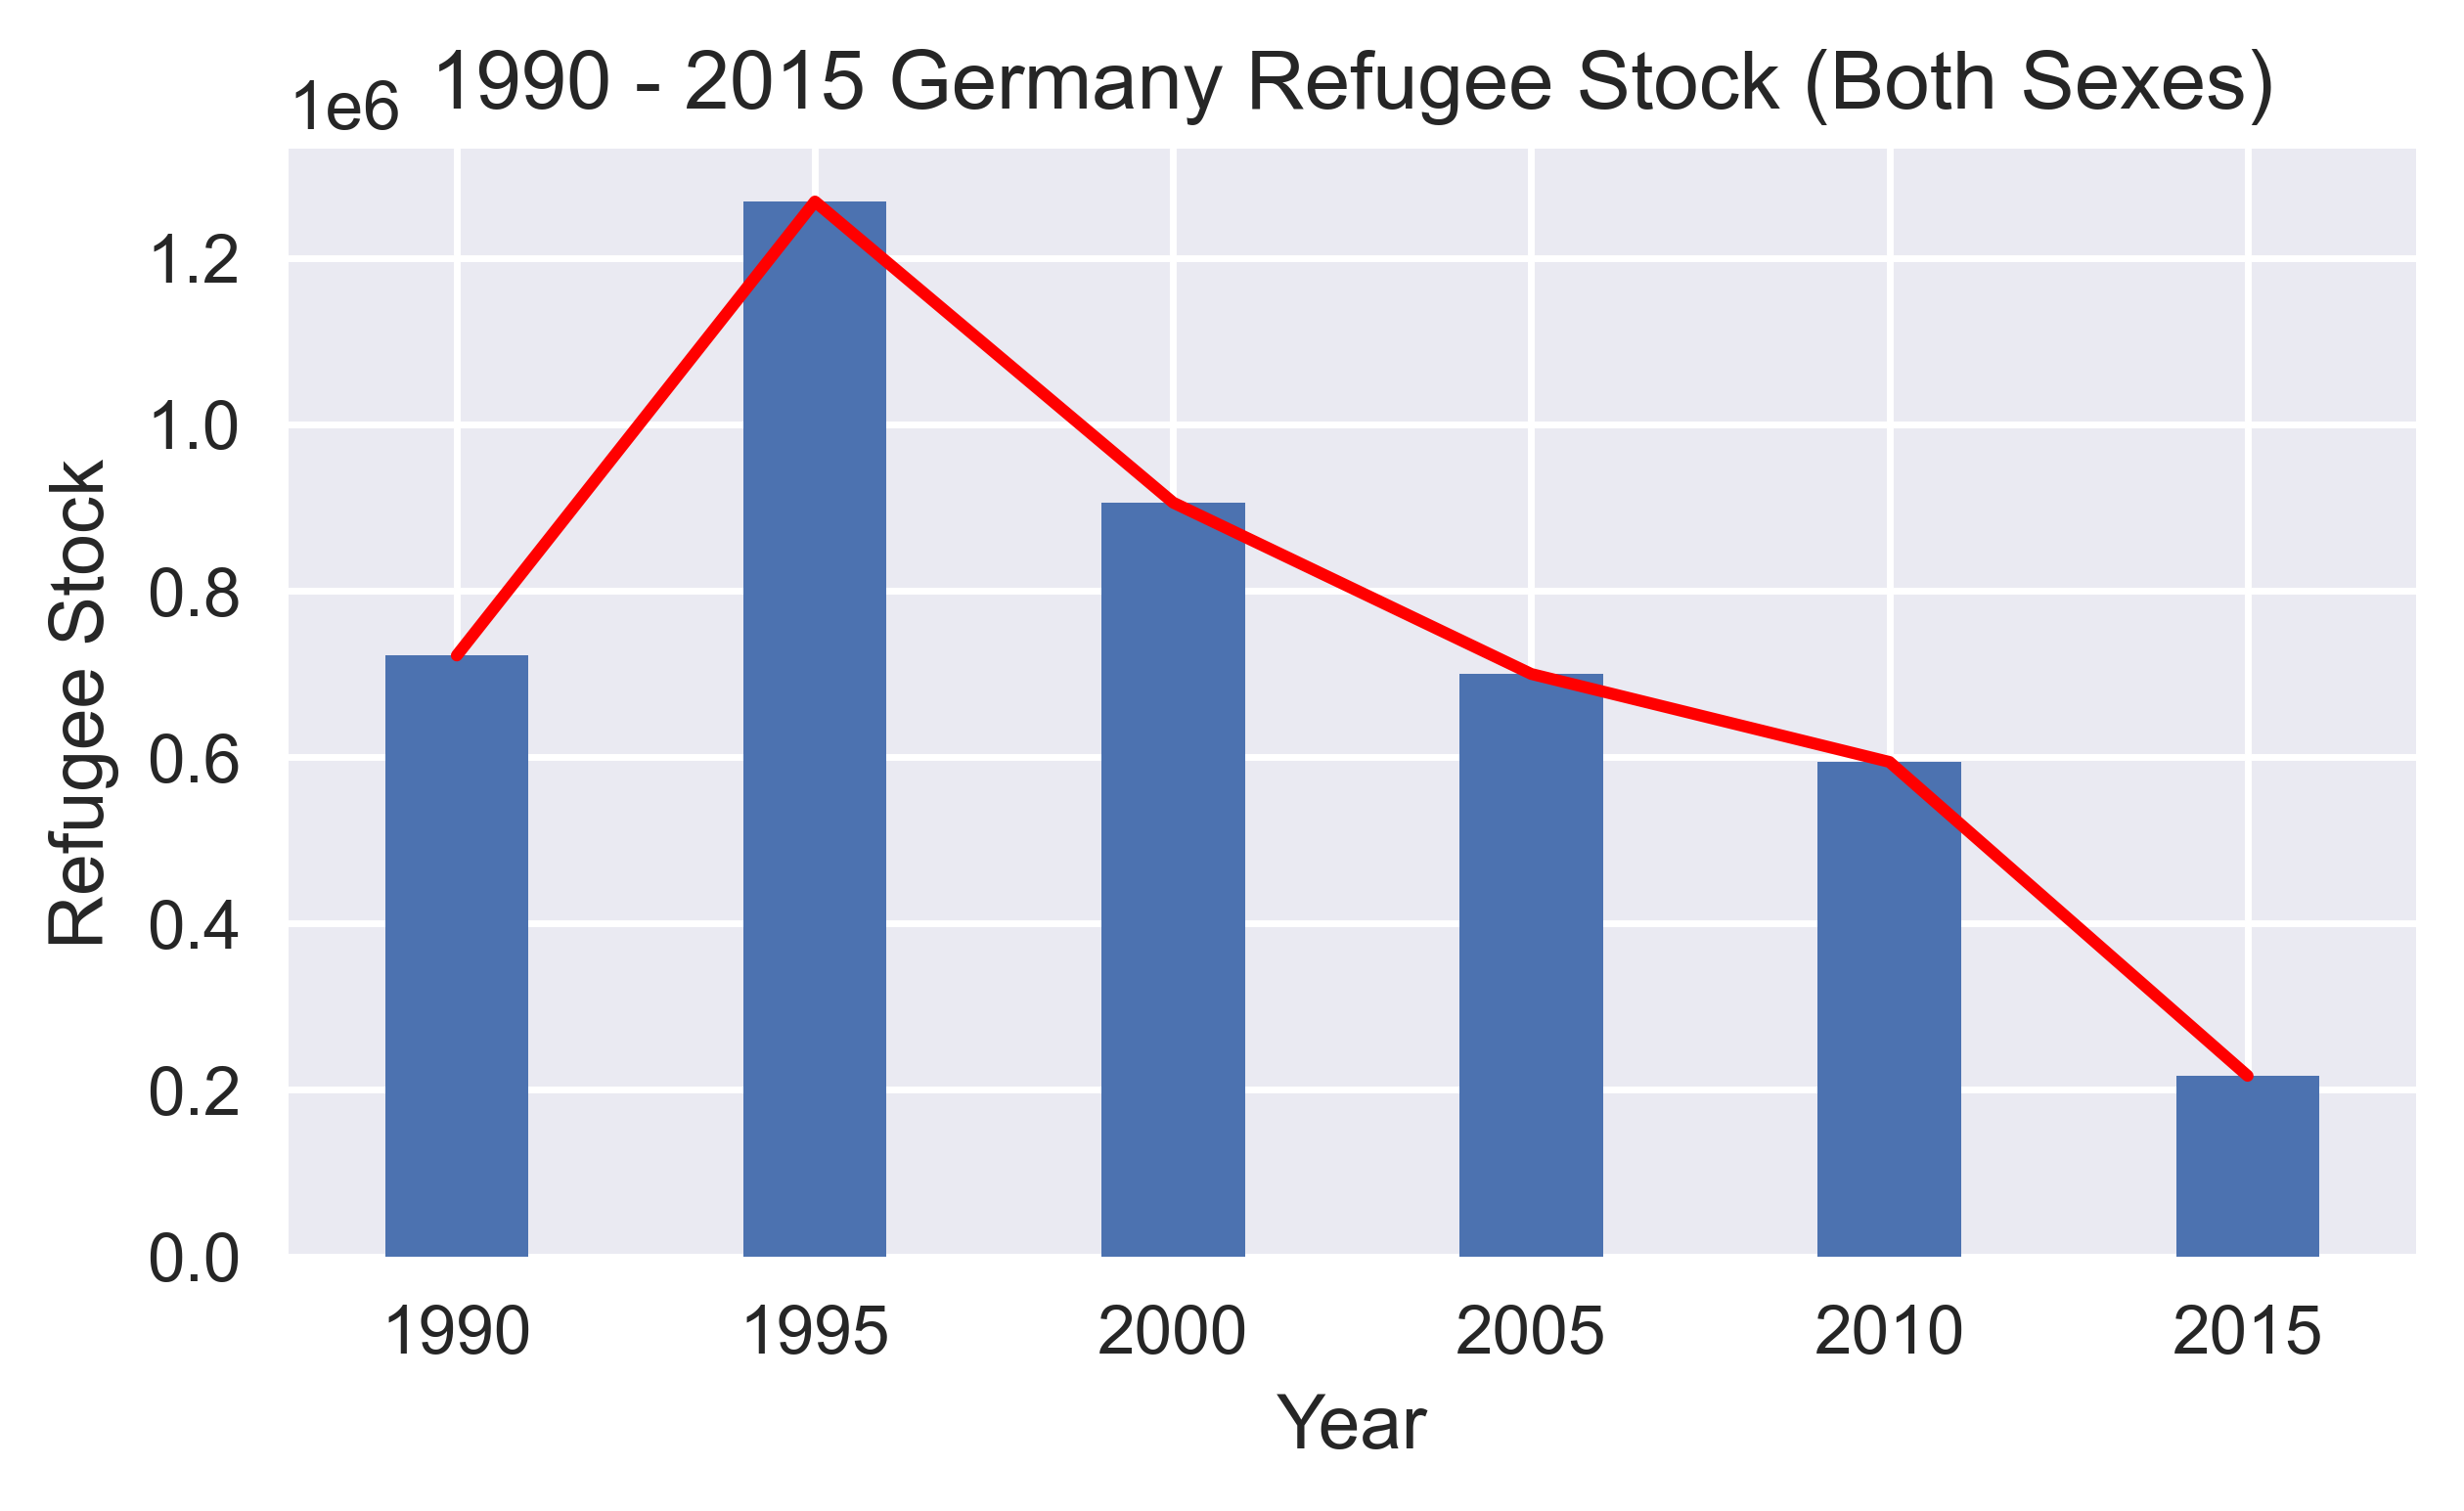

In [192]:
ger_ref_stock_year= ger_ref_stock["year"]
ger_ref_stock_stock = ger_ref_stock["Estimated refugee stock at mid-year"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)
plt.xlabel("Year")
plt.ylabel("Refugee Stock")
plt.title("1990 - 2015 Germany Refugee Stock (Both Sexes)")

plt.bar(ger_ref_stock_year,ger_ref_stock_stock, width = 0.4)
plt.plot(ger_ref_stock_year,ger_ref_stock_stock, color = 'red' )
# plt.scatter(ger_ref_stock_year, ger_ref_stock_stock, color = 'yellow')




# 6.3 Germany Refugee Percentage/Migrant Stock over the year (Both Sexes)

In [193]:
total_ref_per = Table6_refugee1[['major_area','country', "year", 'Sex', 'Refugees as a percentage of the international migrant stock_' ]]
total_ref_per.head()

major_area         country  year   Sex  \
0     Africa          Africa  1990  Both   
1     Africa  Eastern Africa  1990  Both   
2     Africa         Burundi  1990  Both   
3     Africa         Comoros  1990  Both   
4     Africa        Djibouti  1990  Both   

  Refugees as a percentage of the international migrant stock_  
0                                          36.246821            
1                                          53.118453            
2                                           80.43259            
3                                                  0            
4                                          44.597901

In [194]:
ger_ref_per = total_ref_per.loc[total_ref_per["country"] == "Germany"]
ger_ref_per.head(8)

major_area  country  year   Sex  \
167      Europe  Germany  1990  Both   
432      Europe  Germany  1995  Both   
697      Europe  Germany  2000  Both   
962      Europe  Germany  2005  Both   
1227     Europe  Germany  2010  Both   
1492     Europe  Germany  2015  Both   

     Refugees as a percentage of the international migrant stock_  
167                                           12.166913            
432                                           16.985946            
697                                           10.074916            
962                                            6.796826            
1227                                           5.120497            
1492                                           1.807251

Text(0.5, 1.0, '1990 - 2015 Germany Refugee Percentage/Migrant Stock (Both Sexes)')

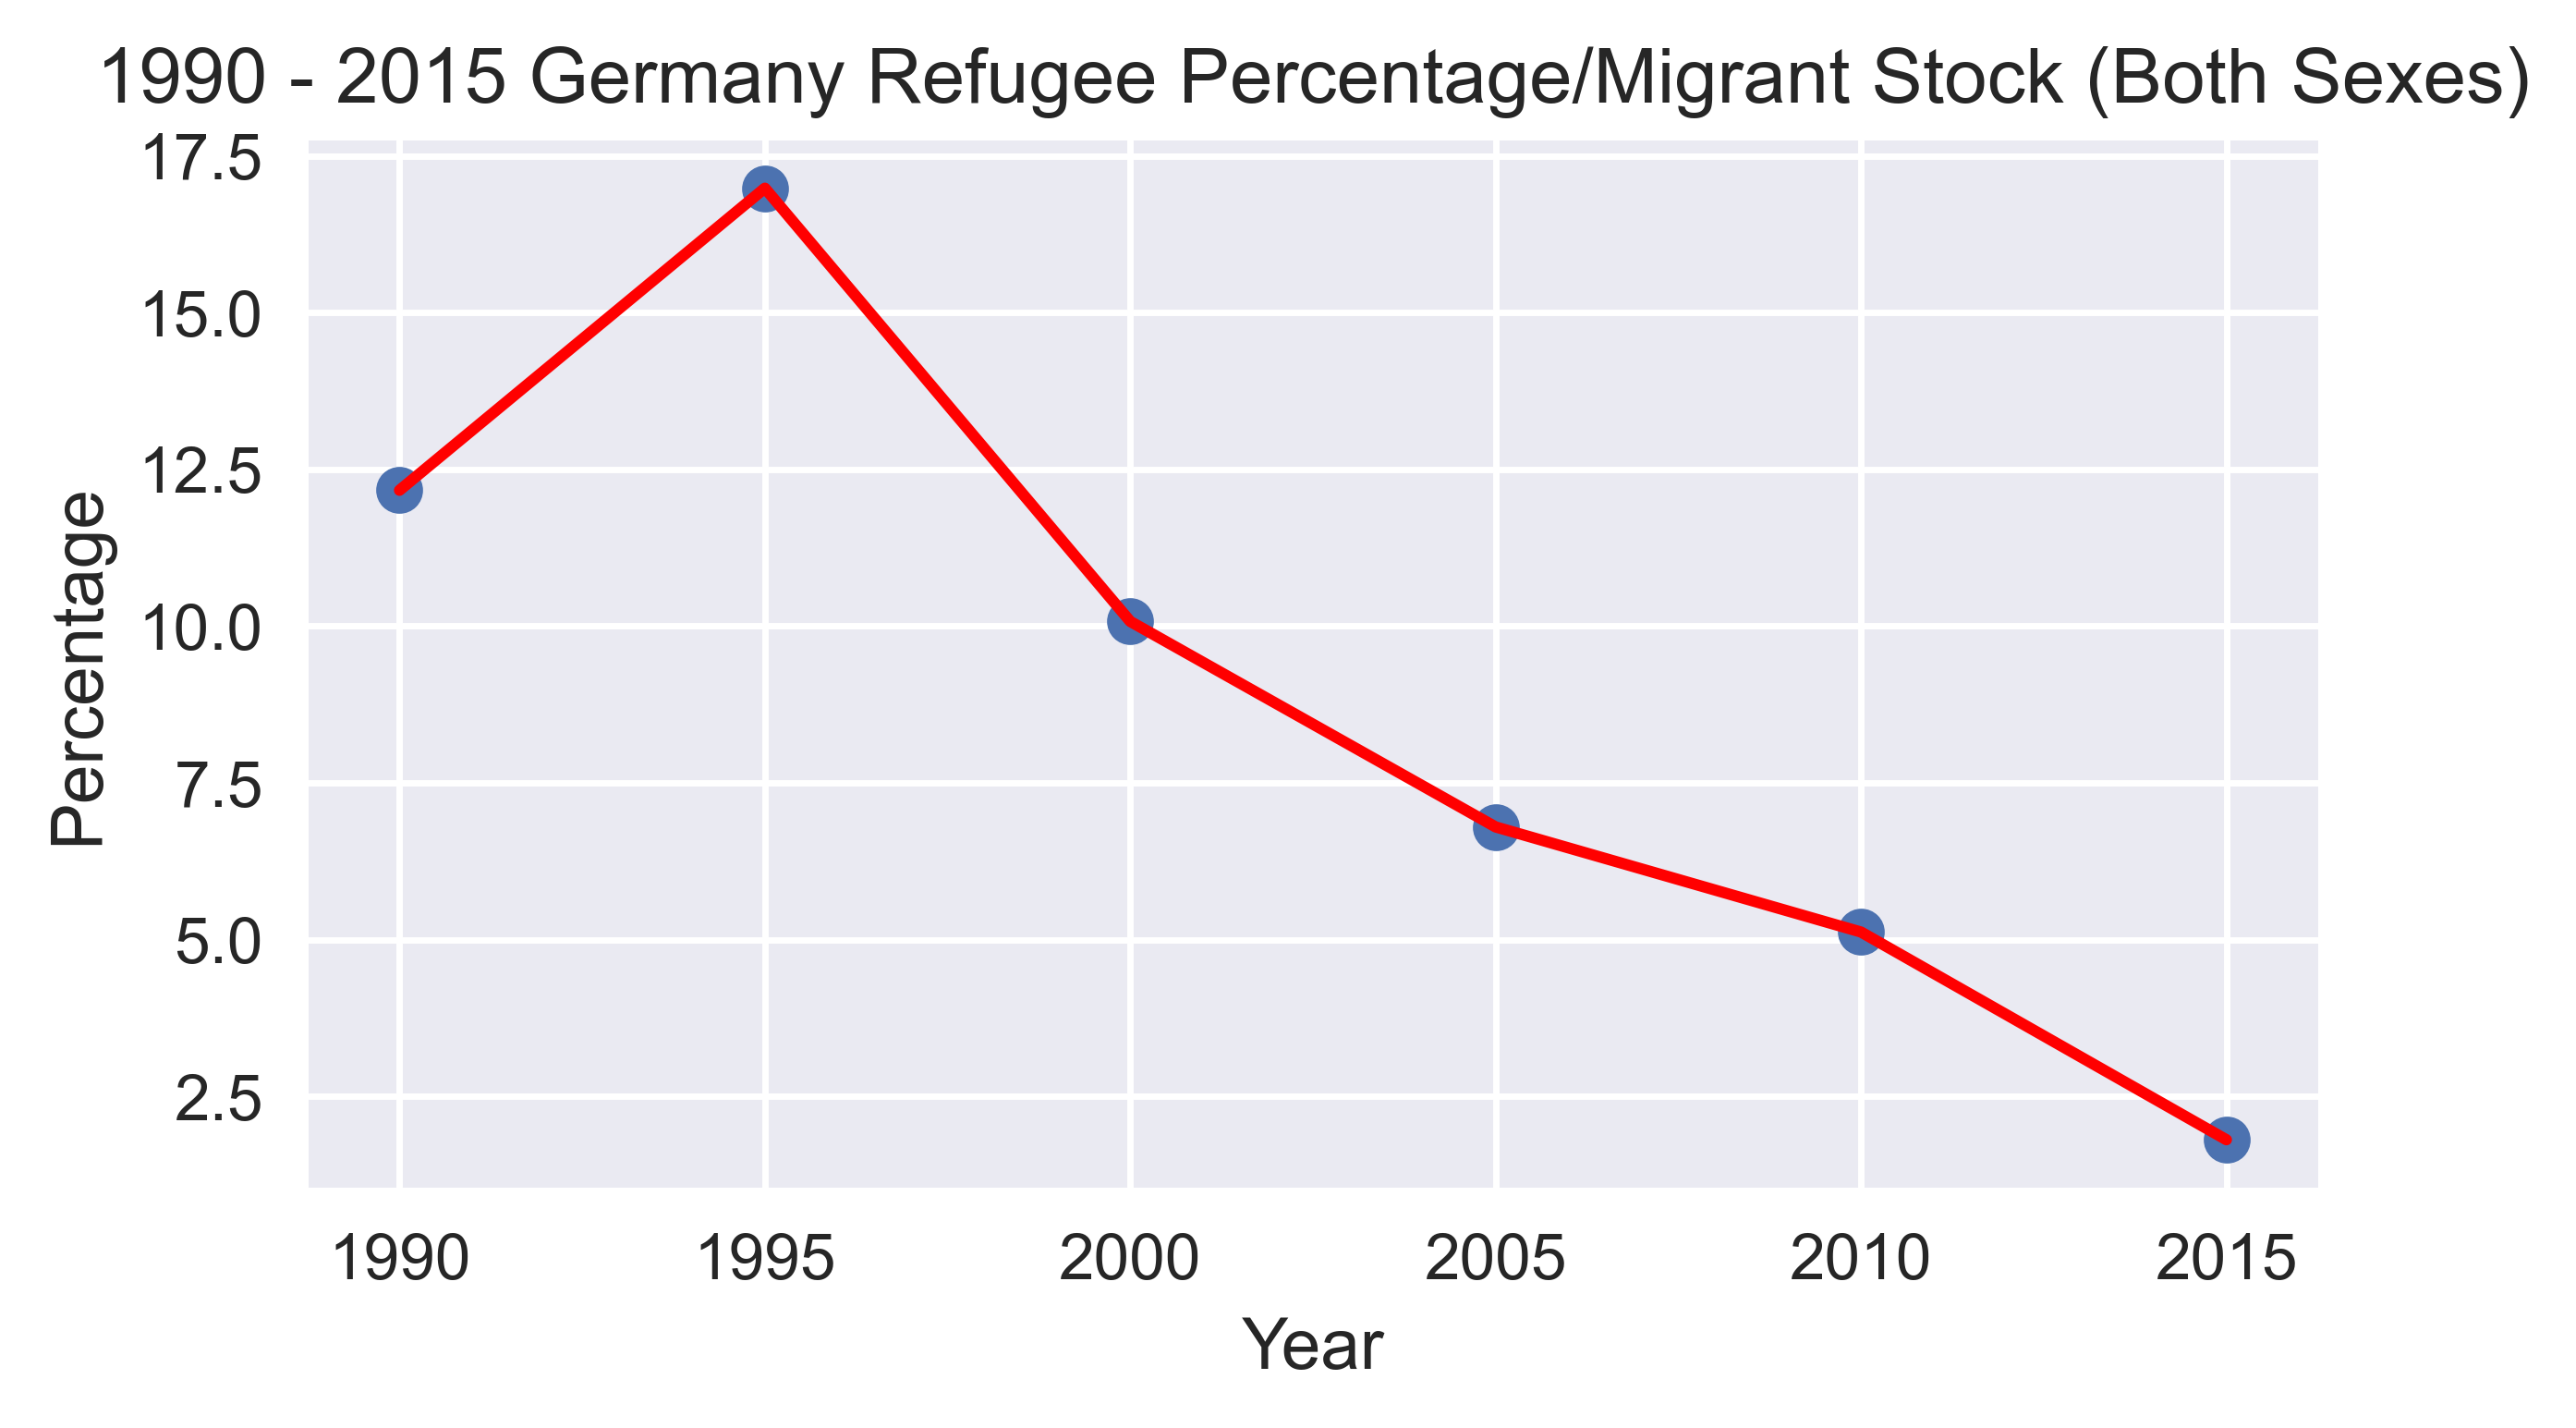

In [195]:
ger_ref_per_year= ger_ref_per["year"]
ger_ref_per = ger_ref_per["Refugees as a percentage of the international migrant stock_"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)
plt.xlabel("Year")
plt.ylabel("Percentage")


plt.plot(ger_ref_per_year,ger_ref_per, color = 'red')
plt.scatter(ger_ref_per_year, ger_ref_per)
plt.title("1990 - 2015 Germany Refugee Percentage/Migrant Stock (Both Sexes)")

# 6.4 Germany Refugee Annual Rate of Change (Both Sexes)

In [196]:
Table6_refugee2.head()

Sort_order major_area          region         country Notes  Country_code  \
0           7     Africa          Africa          Africa   NaN           903   
1           8     Africa  Eastern Africa  Eastern Africa   NaN           910   
2           9     Africa  Eastern Africa         Burundi   NaN           108   
3          10     Africa  Eastern Africa         Comoros   NaN           174   
4          11     Africa  Eastern Africa        Djibouti   NaN           262   

        year   Sex Developed region Least developed country  \
0  1990-1995  Both              NaN                     NaN   
1  1990-1995  Both              NaN                     NaN   
2  1990-1995  Both               No                     Yes   
3  1990-1995  Both               No                     Yes   
4  1990-1995  Both               No                     Yes   

  Sub-Saharan Africa Annual rate of change of the refugee stock_  
0                NaN                                    0.076037  
1                NaN                                    -5.30801  
2                Yes                                   -3.390926  
3                Yes                                          ..  
4                Yes                                   -9.763426

In [197]:
arc_ref = Table6_refugee2[['major_area','country', "year", 'Sex', 'Annual rate of change of the refugee stock_' ]]
arc_ref.head()

major_area         country       year   Sex  \
0     Africa          Africa  1990-1995  Both   
1     Africa  Eastern Africa  1990-1995  Both   
2     Africa         Burundi  1990-1995  Both   
3     Africa         Comoros  1990-1995  Both   
4     Africa        Djibouti  1990-1995  Both   

  Annual rate of change of the refugee stock_  
0                                    0.076037  
1                                    -5.30801  
2                                   -3.390926  
3                                          ..  
4                                   -9.763426

In [198]:
ger_arc_ref = arc_ref.loc[arc_ref["country"] == "Germany"]
ger_arc_ref.head()

major_area  country       year   Sex  \
167      Europe  Germany  1990-1995  Both   
432      Europe  Germany  1995-2000  Both   
697      Europe  Germany  2000-2005  Both   
962      Europe  Germany  2005-2010  Both   
1227     Europe  Germany  2010-2015  Both   

     Annual rate of change of the refugee stock_  
167                                     6.673321  
432                                   -10.446751  
697                                     -7.87186  
962                                    -5.664085  
1227                                  -20.828887

Text(0.5, 1.0, 'Germany Refugee Annual Rate of Change (Both Sexes)')

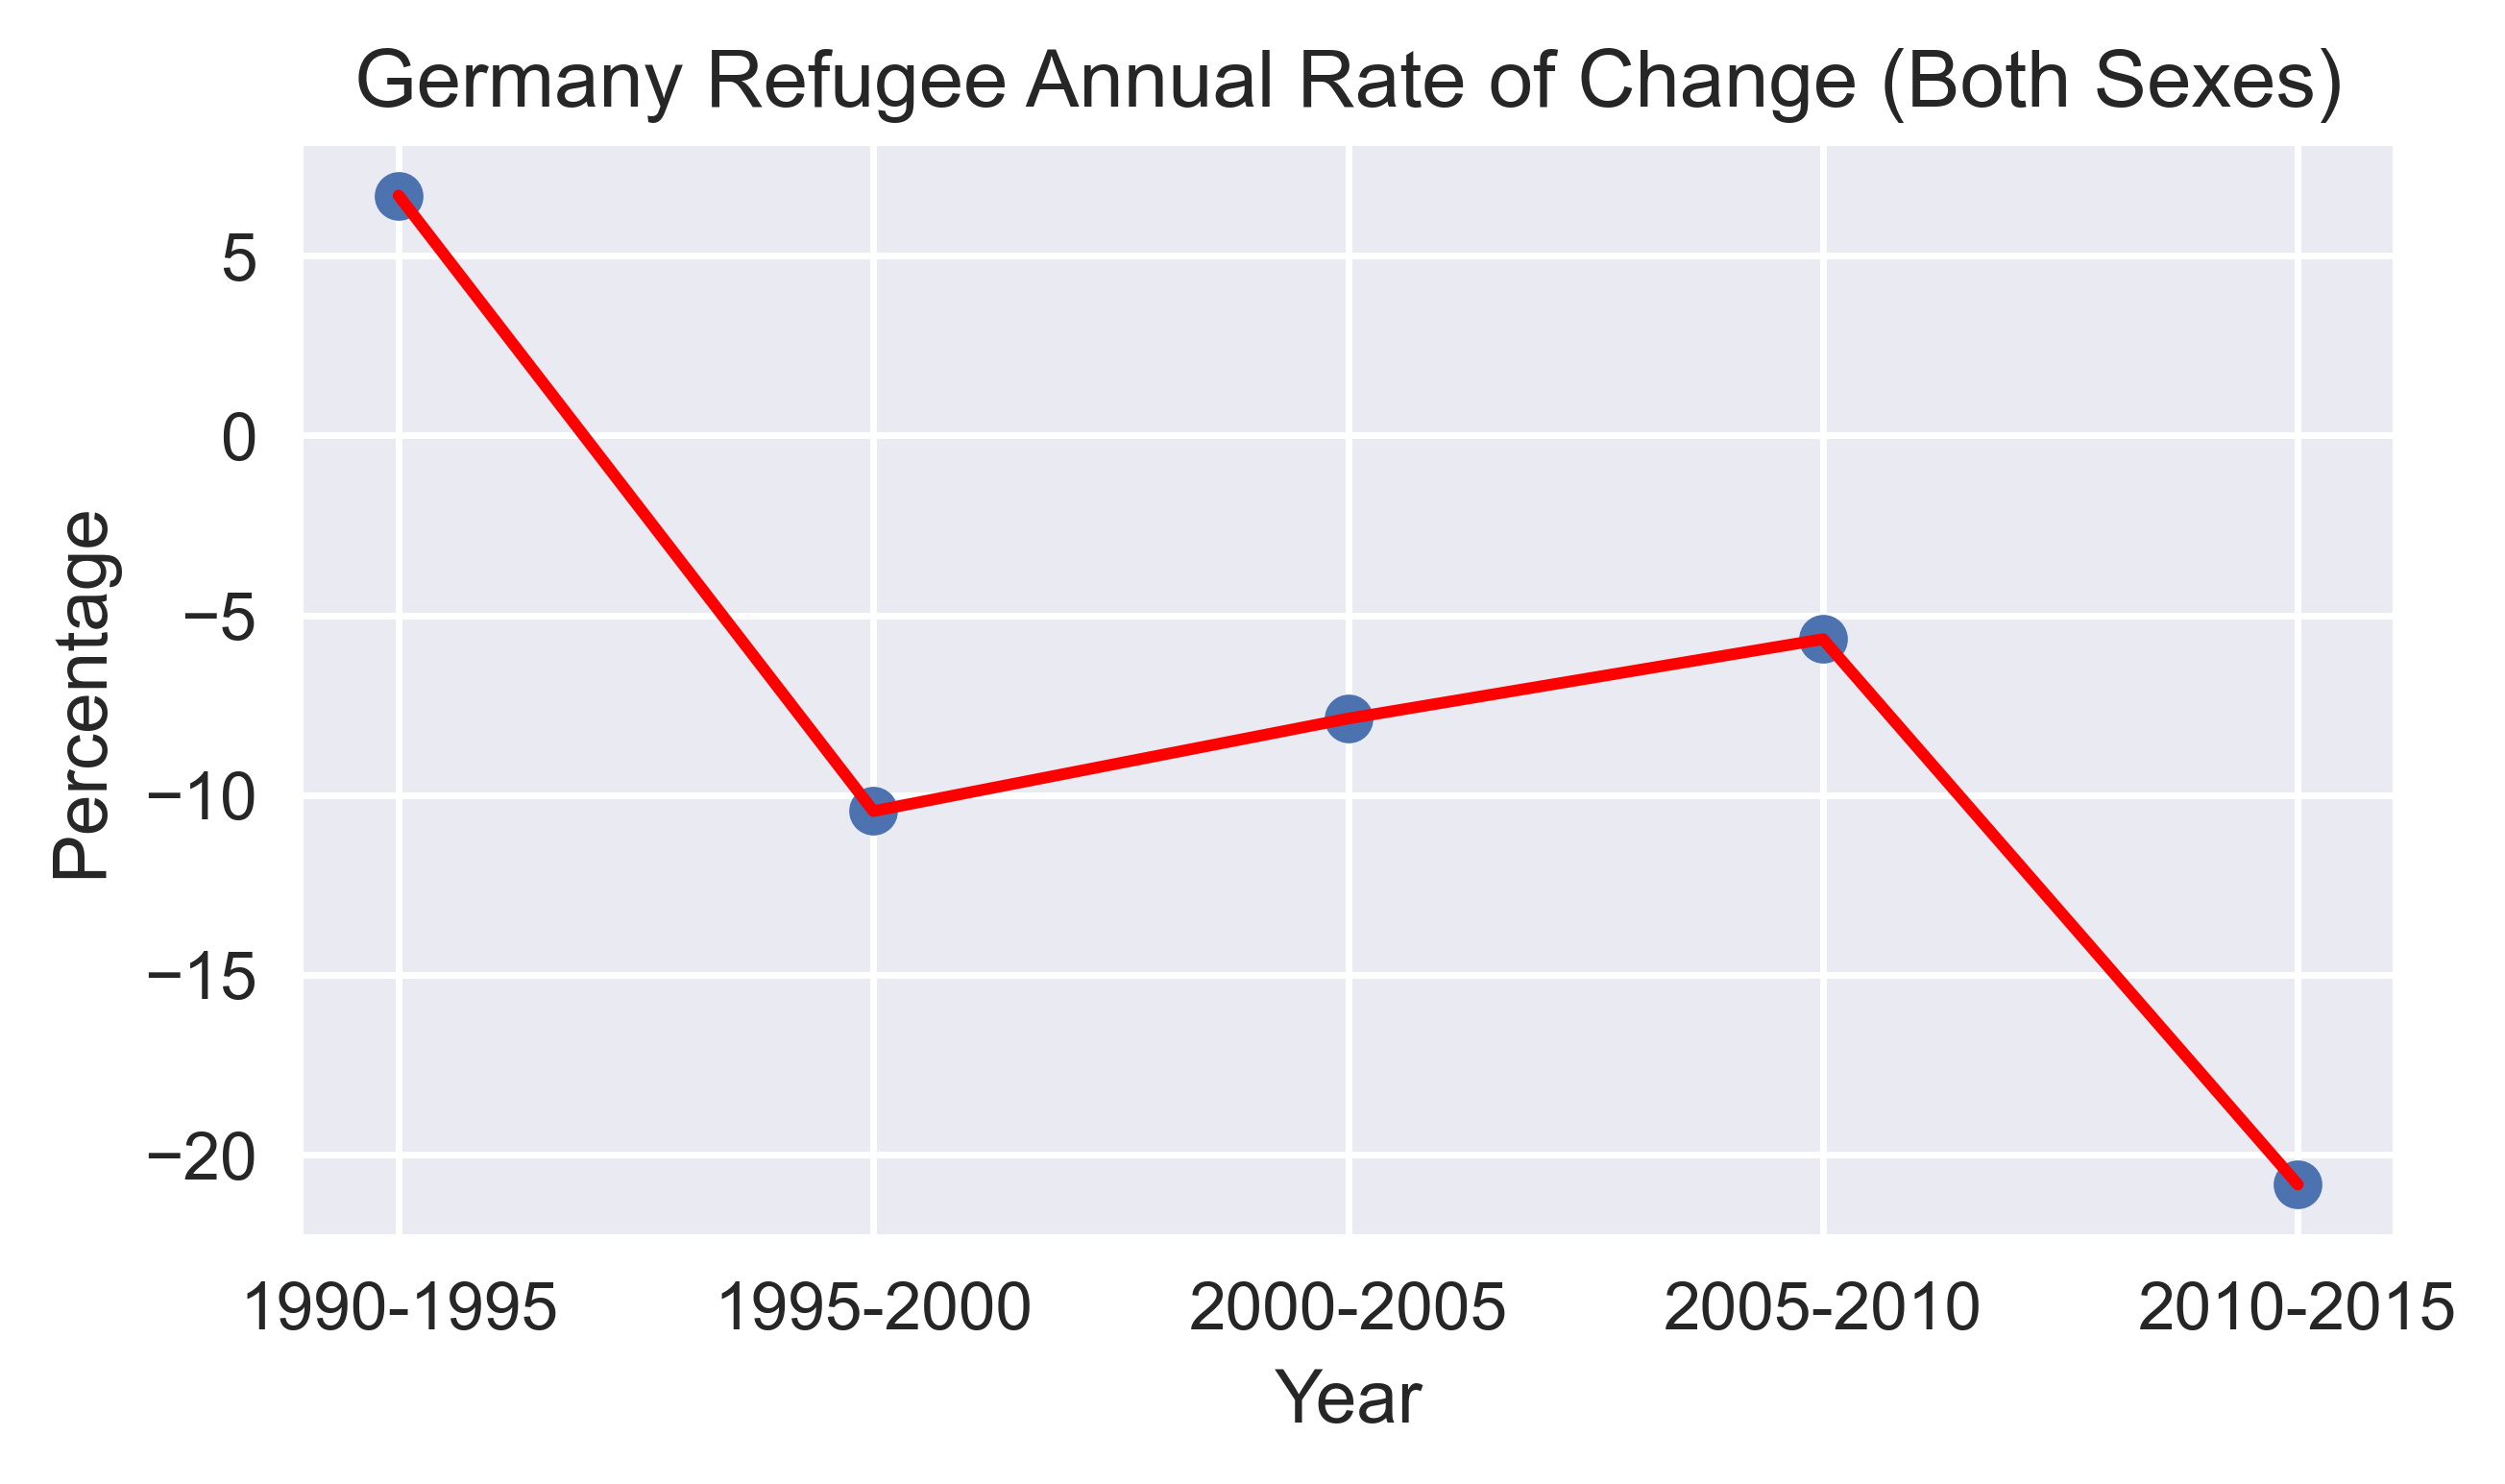

In [199]:
ger_arc_ref_year= ger_arc_ref["year"]
ger_arc_ref_per = ger_arc_ref["Annual rate of change of the refugee stock_"]
plt.style.use('seaborn')
plt.figure(figsize= (5,3), dpi=500)
plt.xlabel("Year")
plt.ylabel("Percentage")


plt.plot(ger_arc_ref_year,ger_arc_ref_per, color = 'red' )
plt.scatter(ger_arc_ref_year, ger_arc_ref_per)
plt.title("Germany Refugee Annual Rate of Change (Both Sexes)")